In [44]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt
import os

In [123]:
v=list(os.walk('./train'))

f=[0]*200
g=[0]*200
dead=[0]*200
gender=[0]*200
j=0
for i in range(0, len(v)):
    for x in (v[i][2]):
        try:
            print(x)
            f[j], g[j]=scipy.io.wavfile.read(v[i][0]+'/'+x)
            gender[j]=x[-5]
        except:
            dead[j]=1
        j+=1
def decorate(i):
    print()
    print('#'*30+'   '+str(i)+'   '+'#'*30)
    print()

059_K.wav
083_K.wav
010_M.wav
020_M.wav
011_M.wav
081_K.wav
085_K.wav
078_M.wav
017_M.wav
012_K.wav
006_K.wav
025_K.wav
044_K.wav
022_K.wav
024_M.wav
021_M.wav
005_M.wav
075_M.wav
028_K.wav
004_M.wav
009_K.wav
086_K.wav
049_M.wav
001_K.wav
071_M.wav
082_M.wav
047_K.wav
016_K.wav
007_M.wav
014_K.wav
050_K.wav
026_M.wav
056_M.wav
066_K.wav
039_M.wav
002_M.wav
073_K.wav
065_M.wav
090_M.wav
087_M.wav
037_K.wav
032_M.wav
035_M.wav
057_K.wav
089_M.wav
003_K.wav
038_M.wav
036_K.wav
060_K.wav
077_K.wav
041_K.wav
043_M.wav
063_M.wav
088_K.wav
042_M.wav
023_M.wav
074_K.wav
053_M.wav
070_M.wav
084_M.wav
033_M.wav
029_K.wav
034_K.wav
045_M.wav
018_K.wav
068_K.wav
061_M.wav
080_M.wav
076_M.wav
067_K.wav
013_M.wav
064_M.wav
046_K.wav
091_M.wav
030_M.wav
040_K.wav
054_K.wav
058_M.wav
079_K.wav
069_K.wav
052_M.wav
015_K.wav
019_M.wav
048_K.wav
031_K.wav
055_K.wav
027_M.wav
051_K.wav
072_K.wav
008_K.wav
062_K.wav


/home/sebastian/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)



##############################   0   ##############################



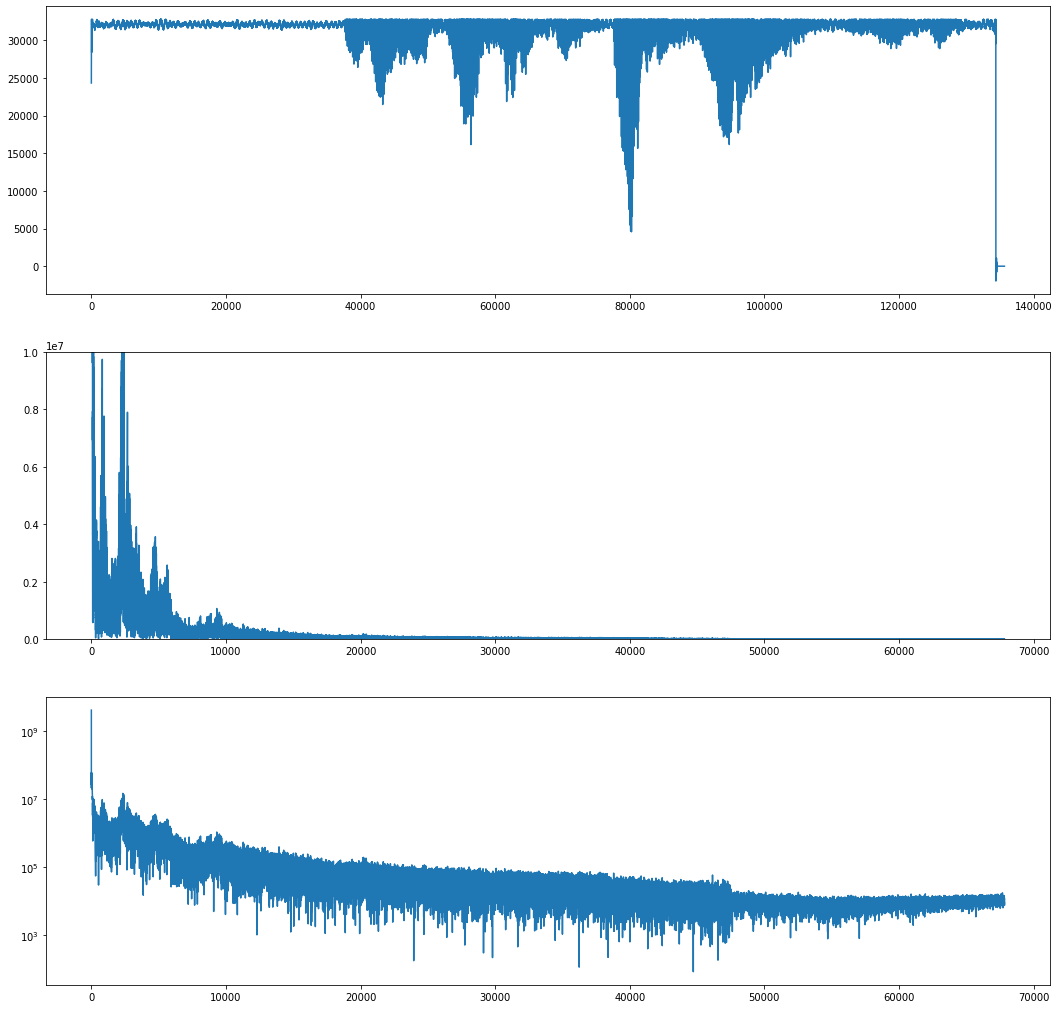


##############################   1   ##############################



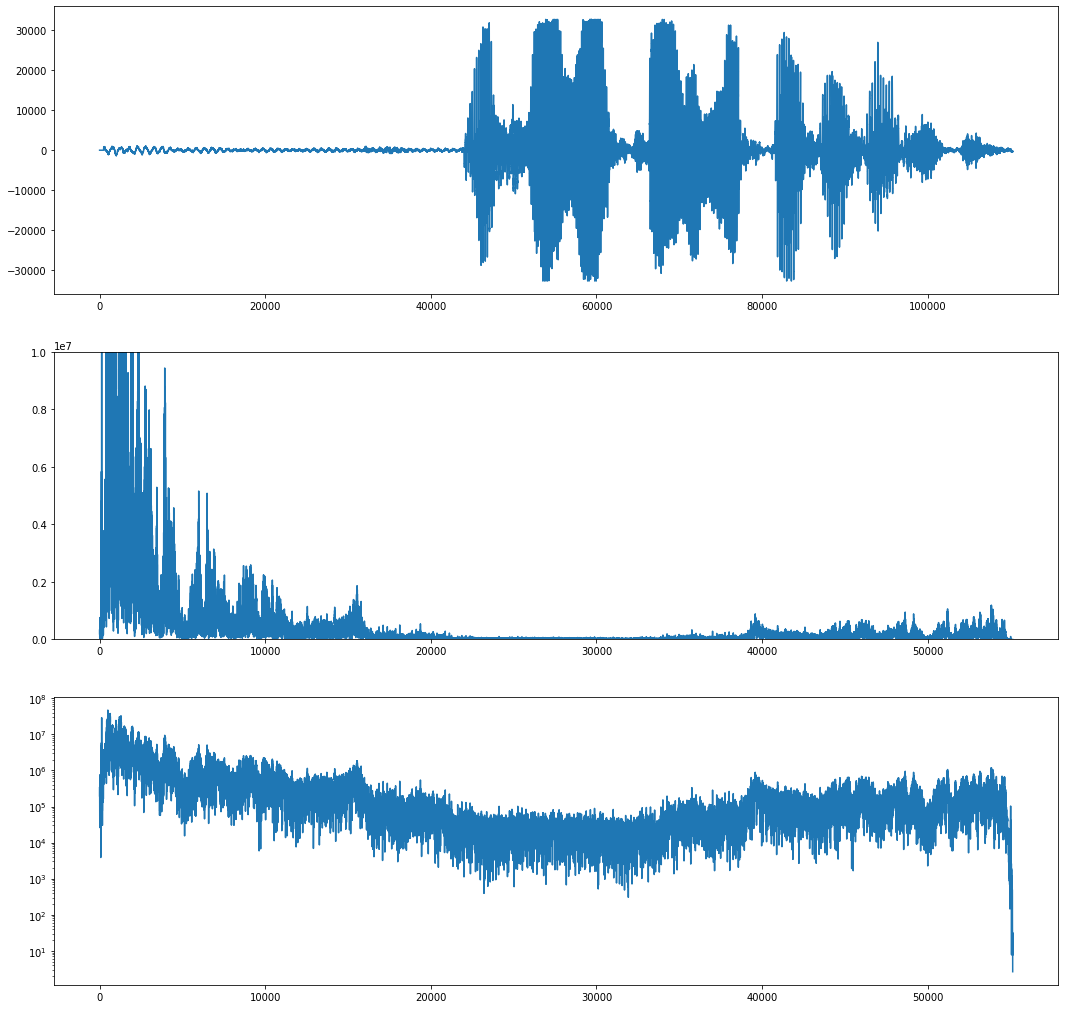


##############################   2   ##############################



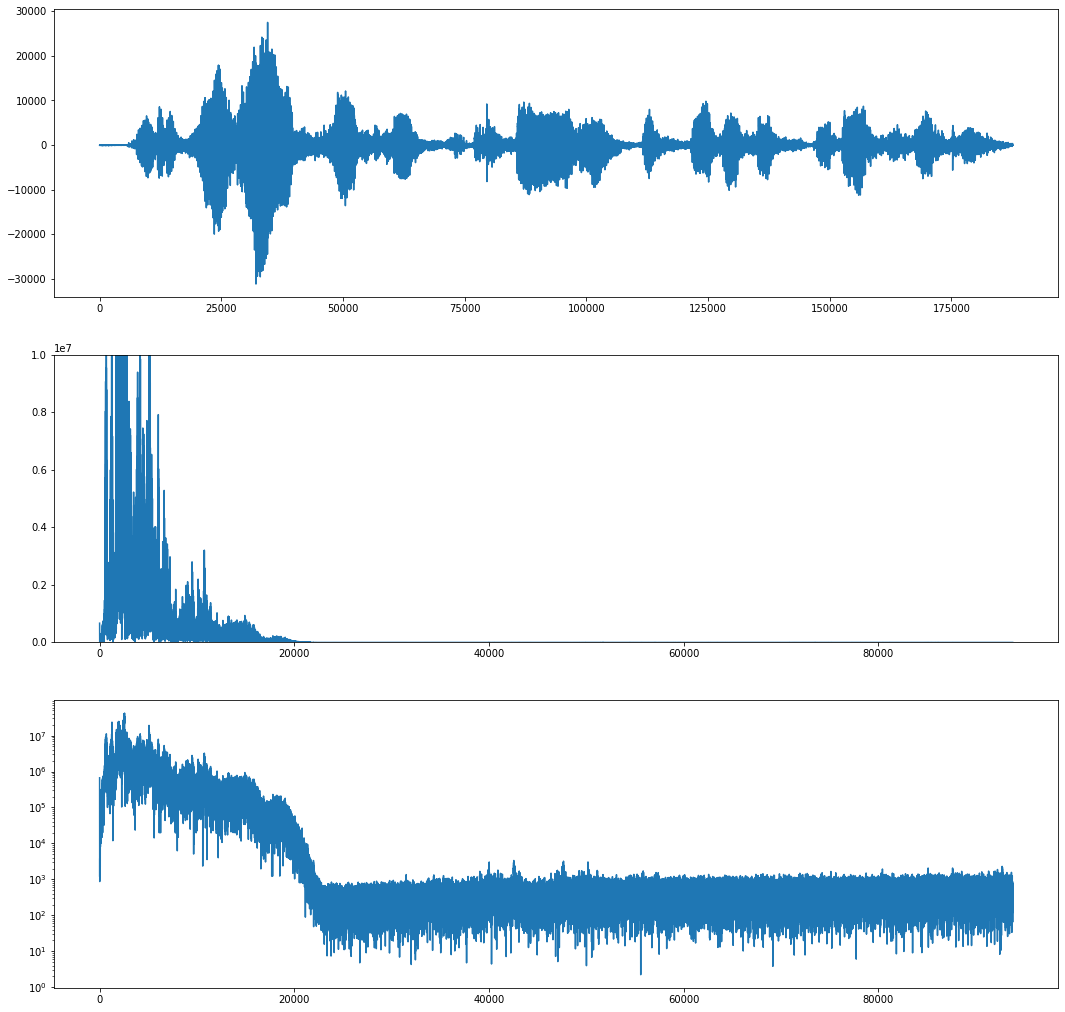


##############################   3   ##############################



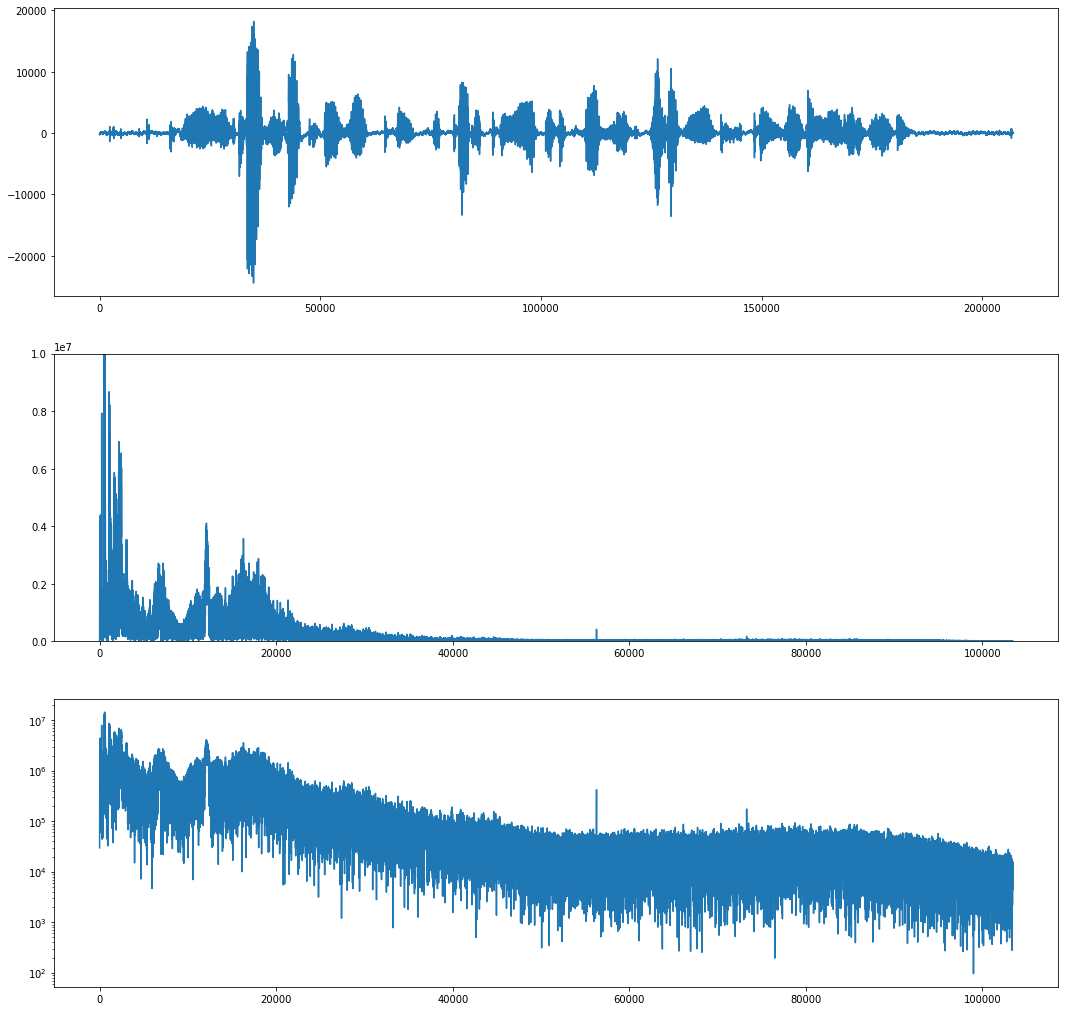


##############################   4   ##############################



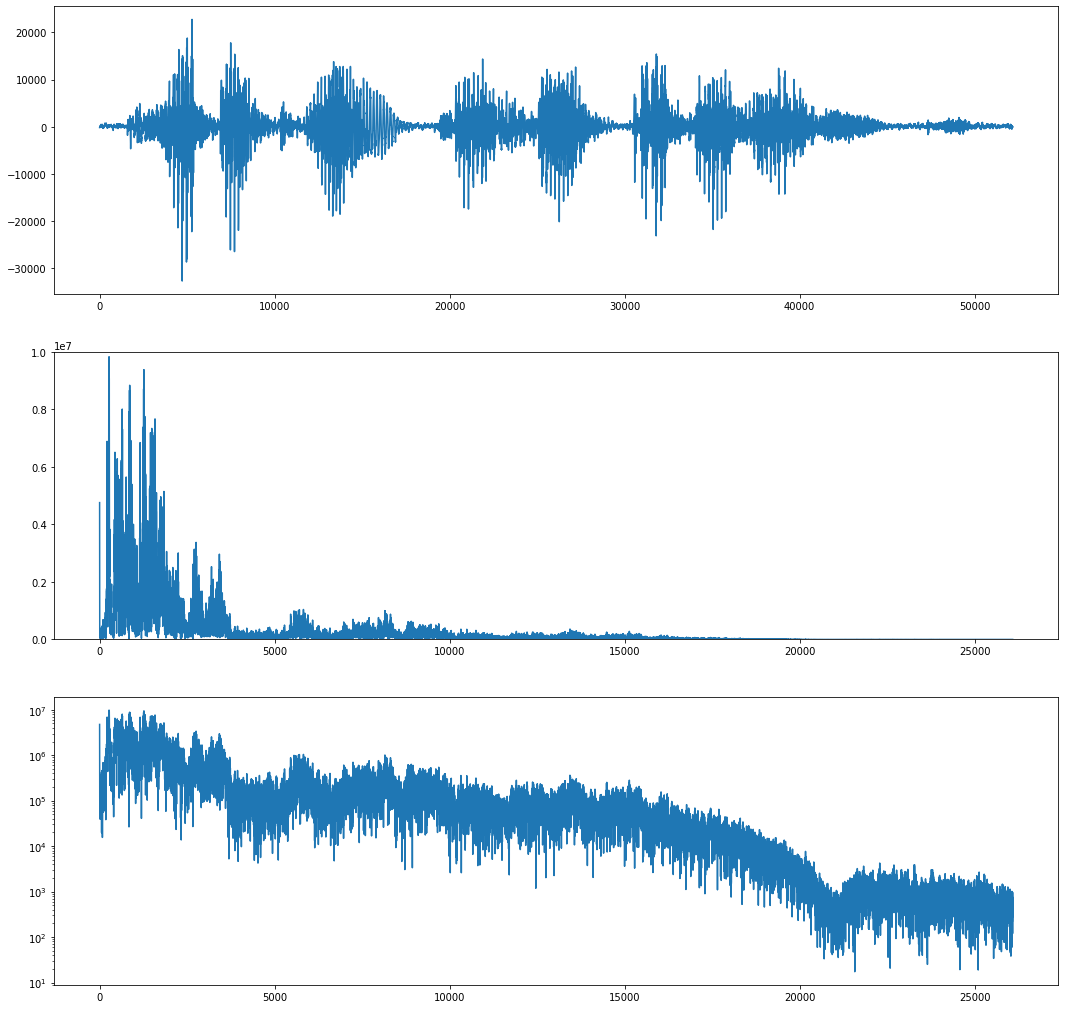


##############################   5   ##############################



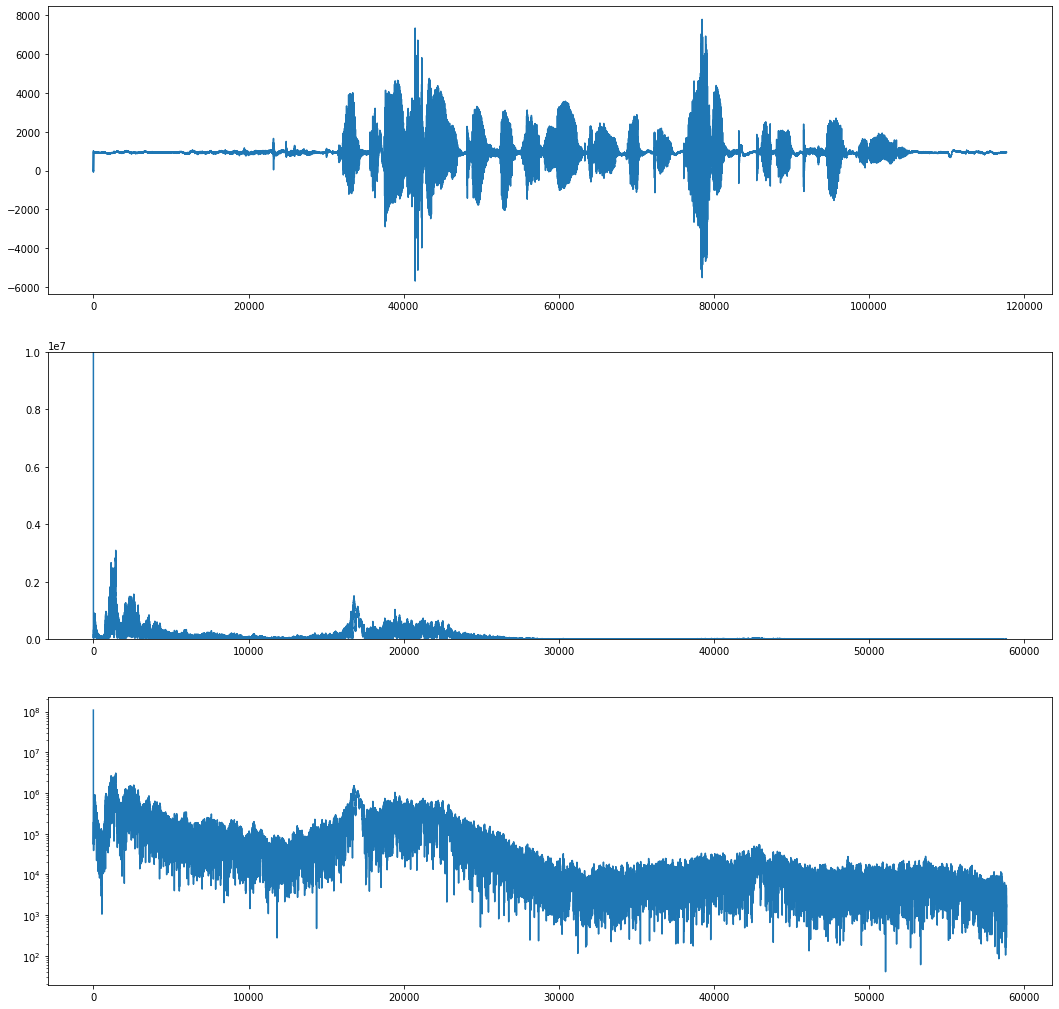


##############################   6   ##############################



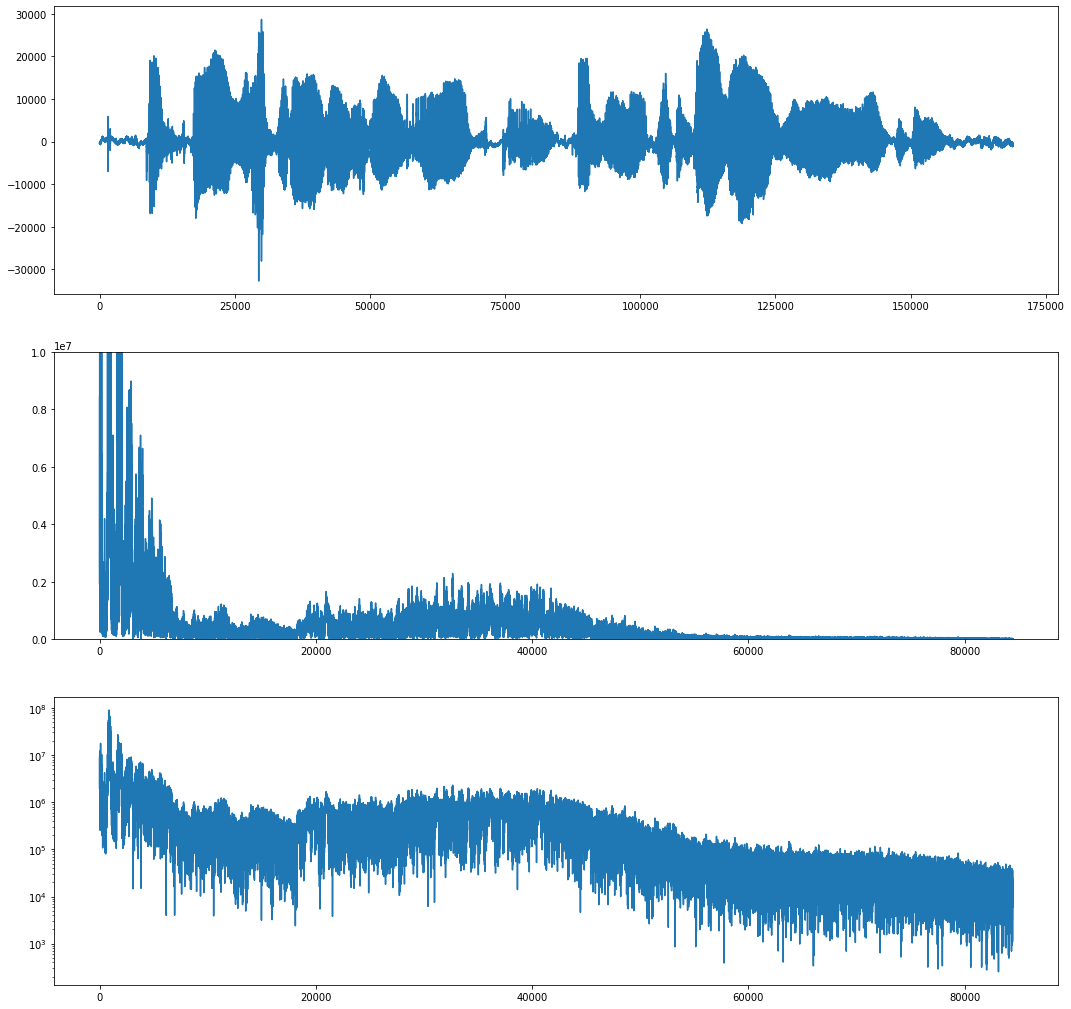


##############################   7   ##############################



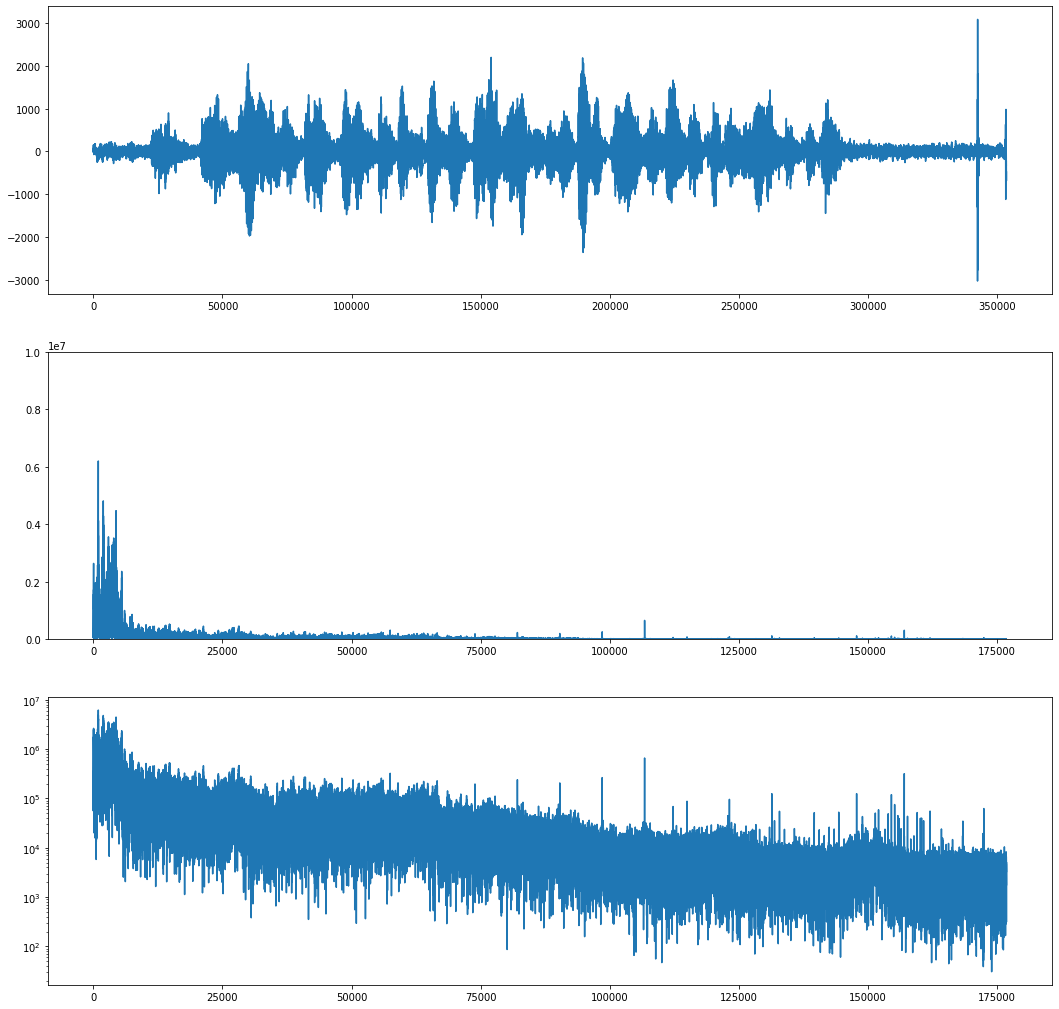


##############################   8   ##############################



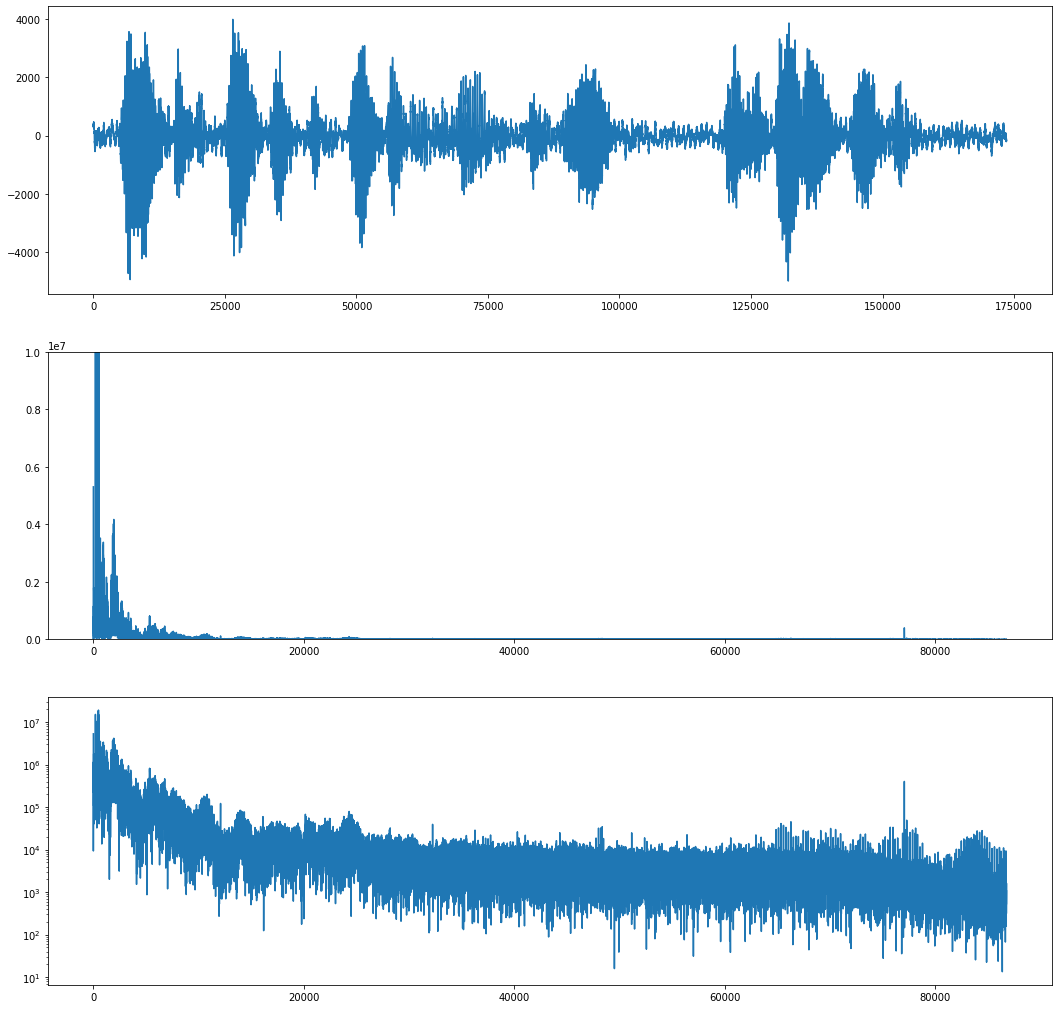


##############################   9   ##############################



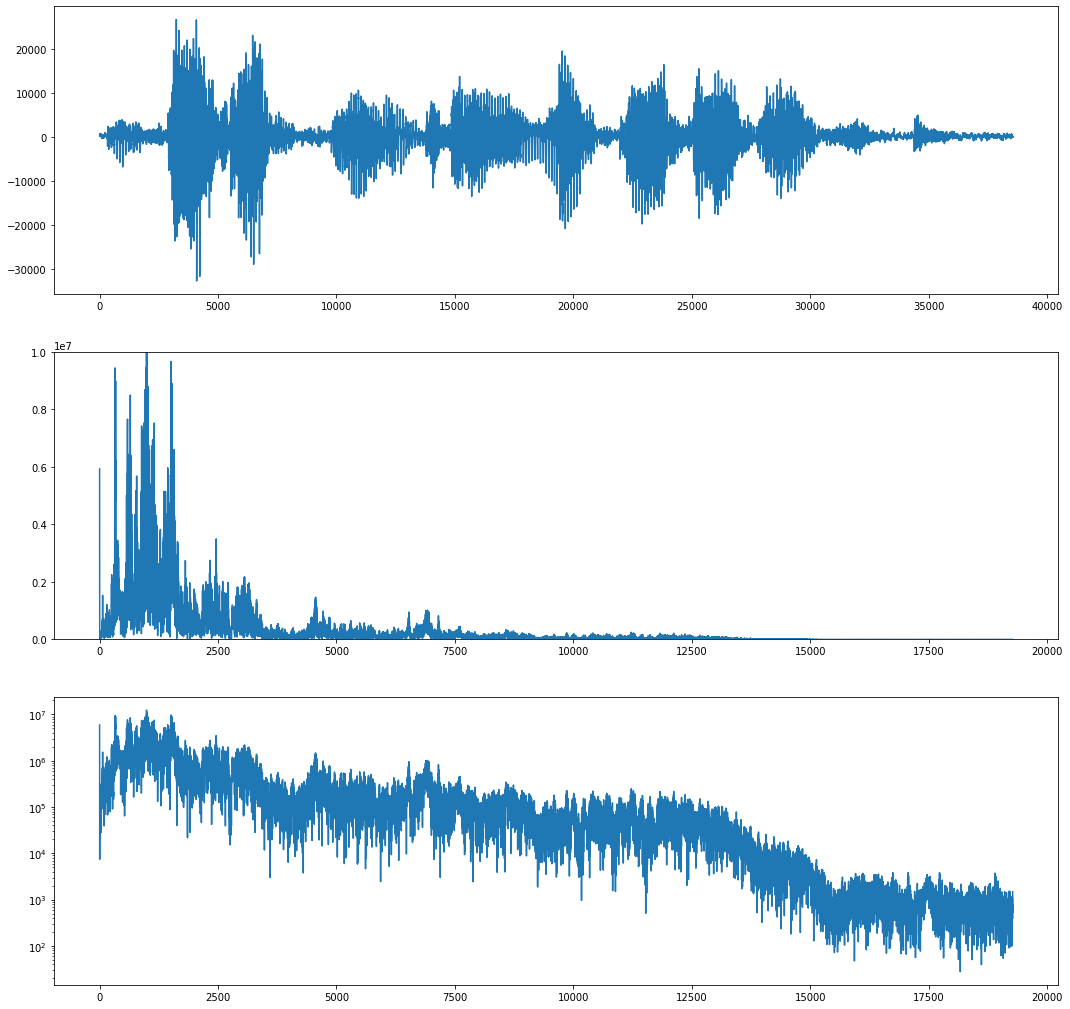


##############################   10   ##############################



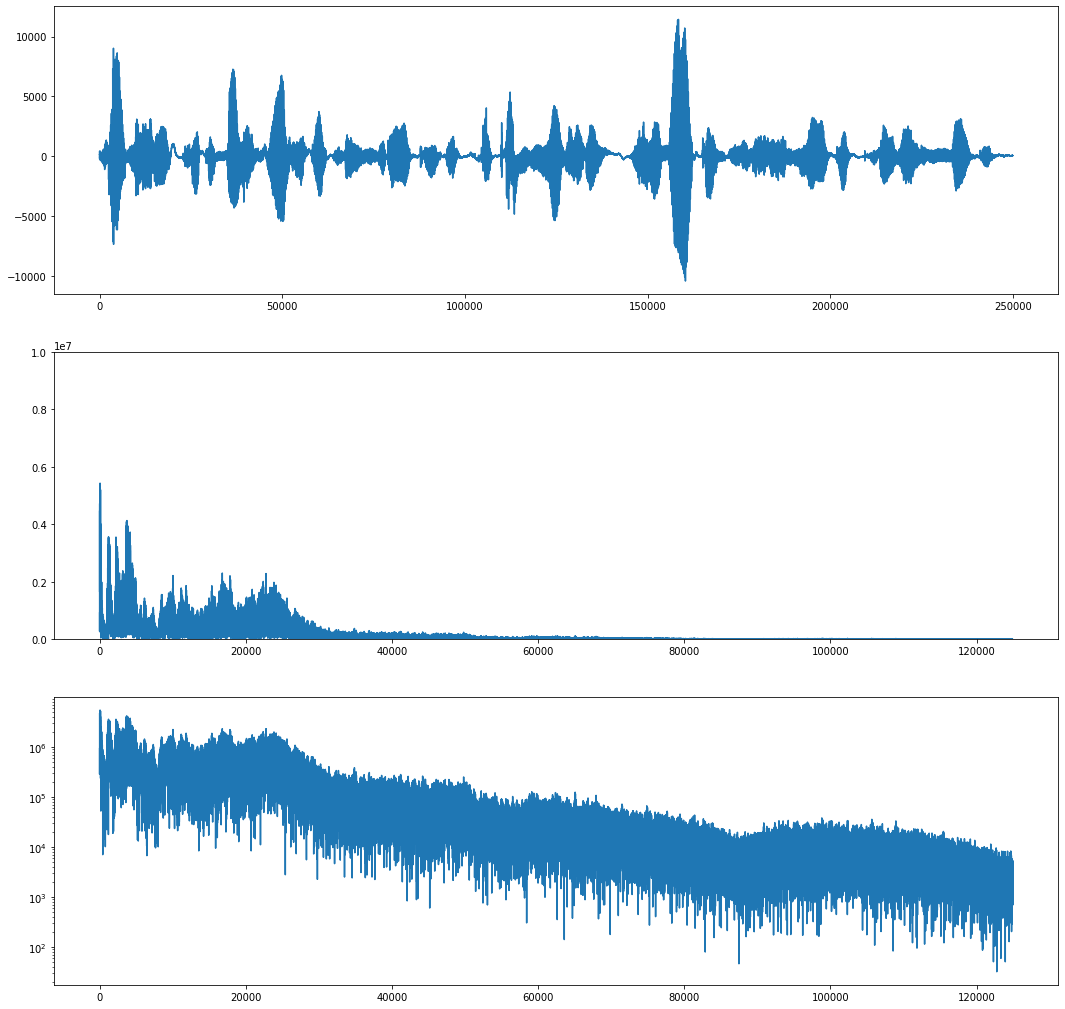


##############################   11   ##############################



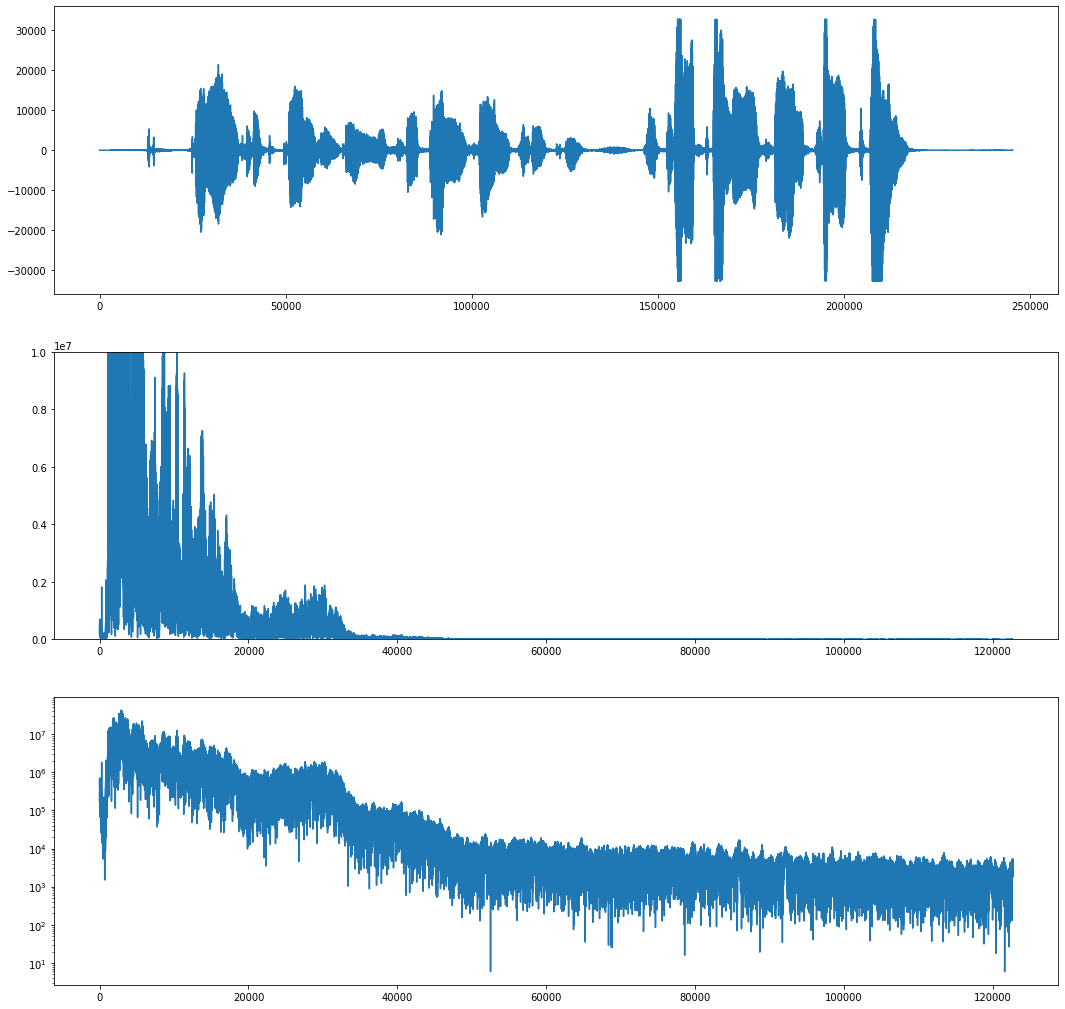


##############################   12   ##############################



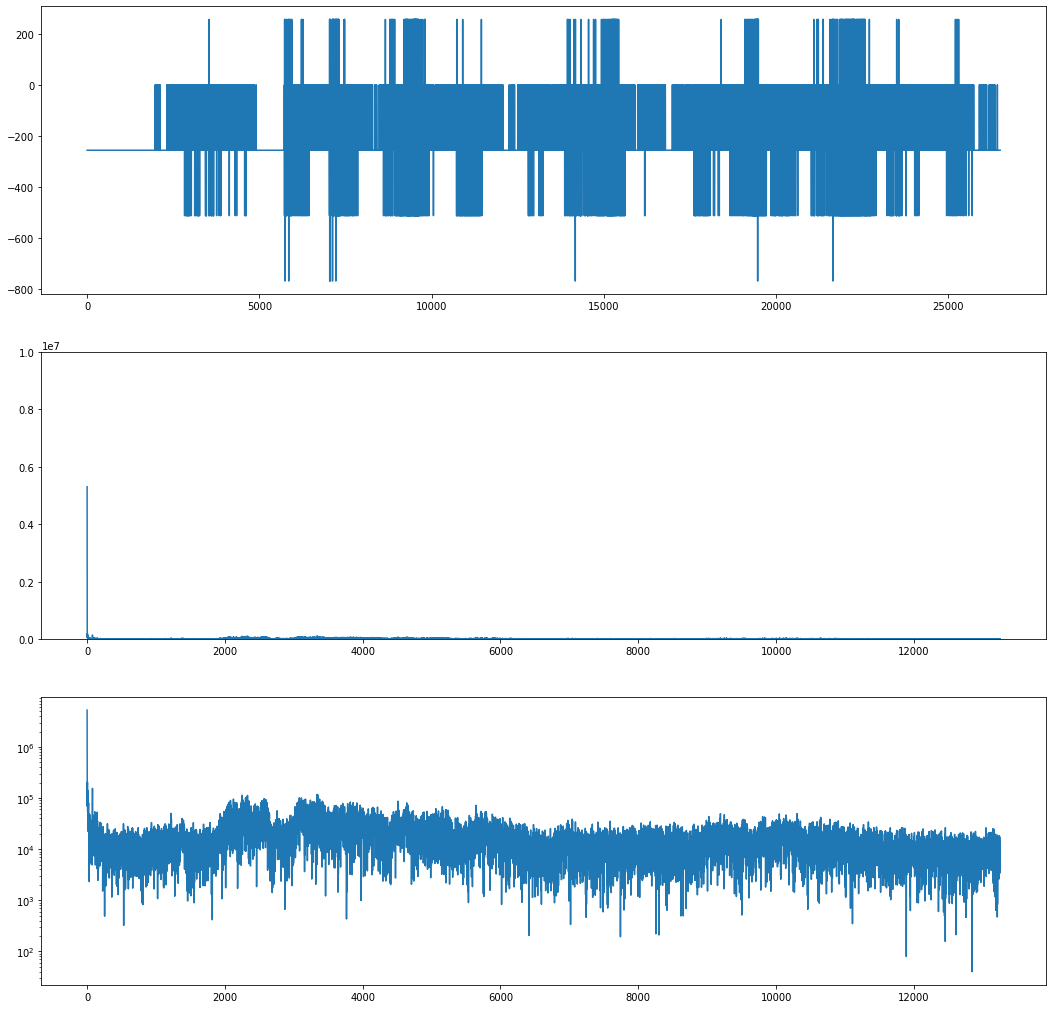


##############################   13   ##############################



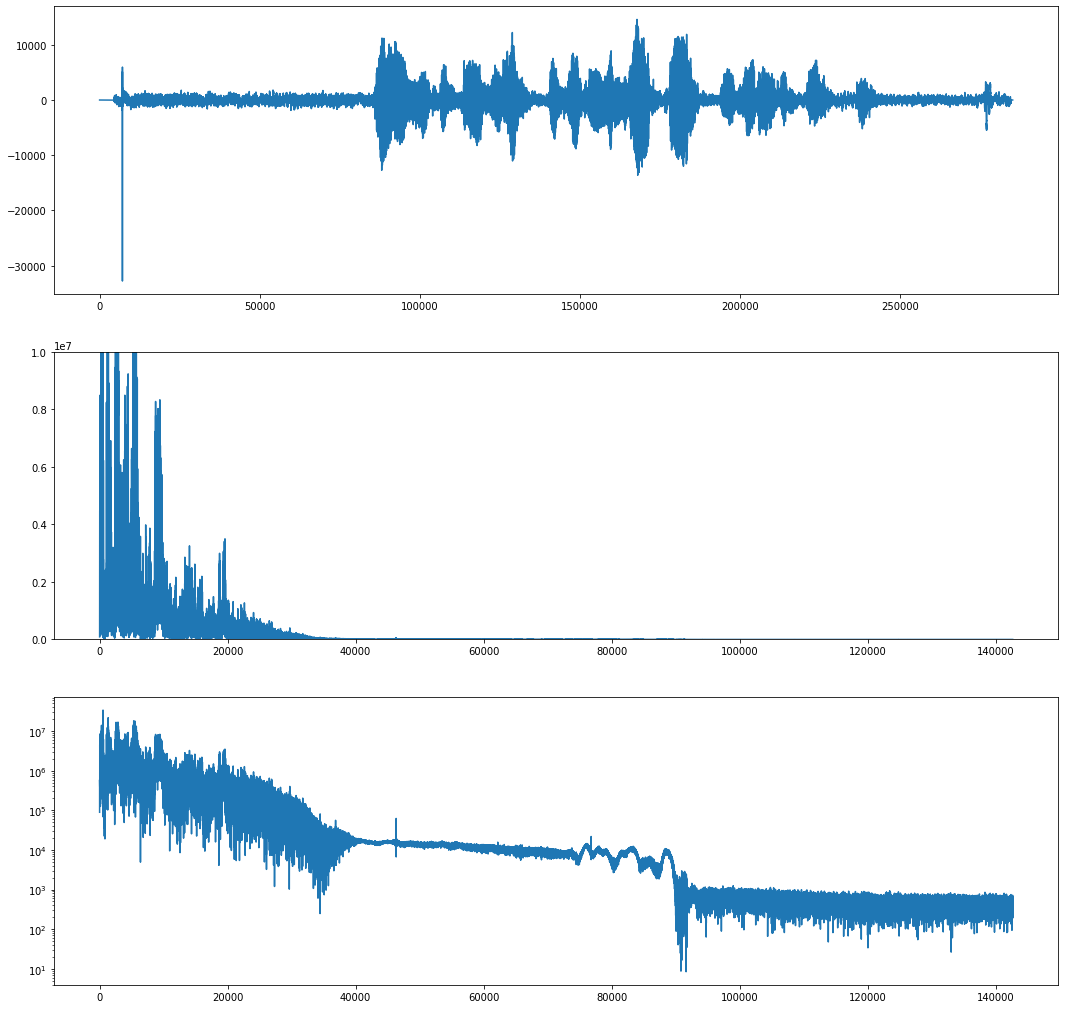


##############################   14   ##############################



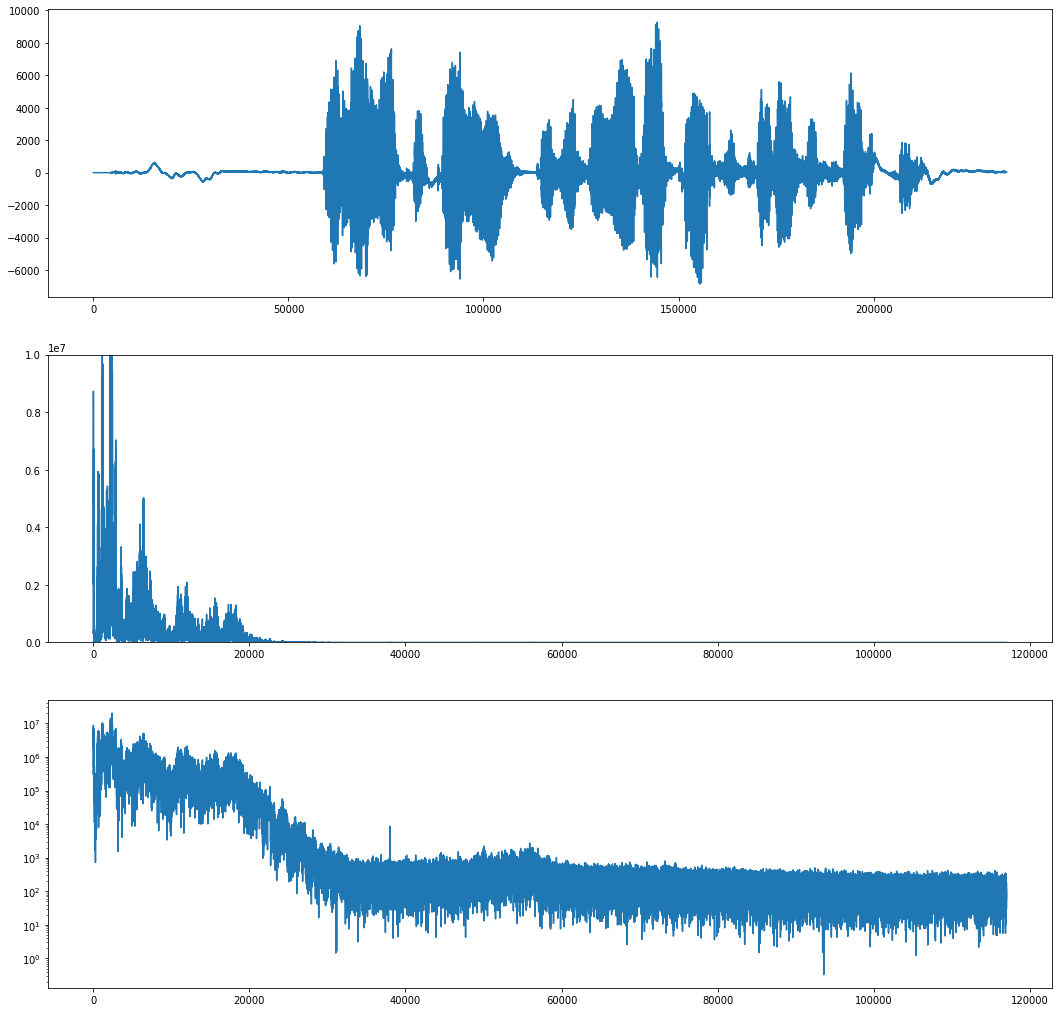


##############################   15   ##############################



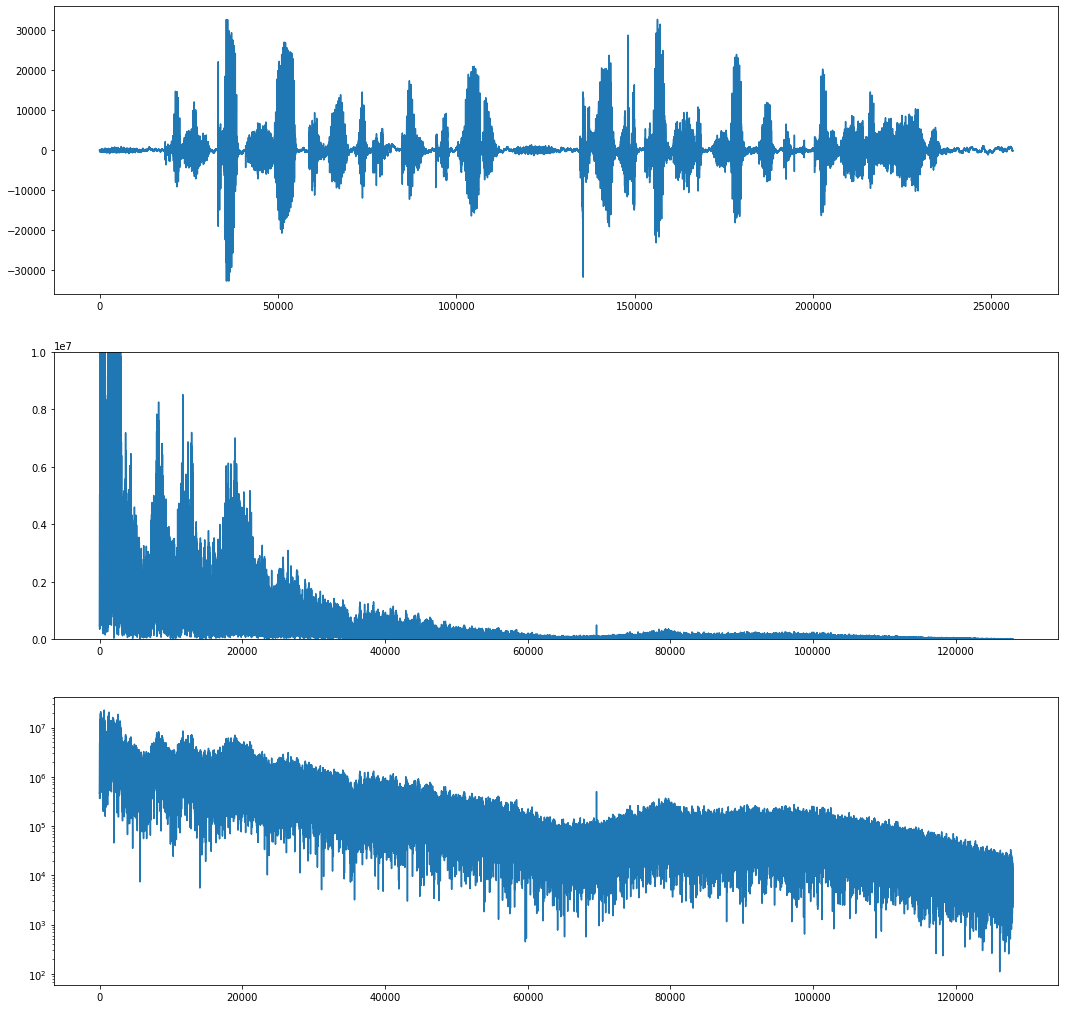


##############################   16   ##############################



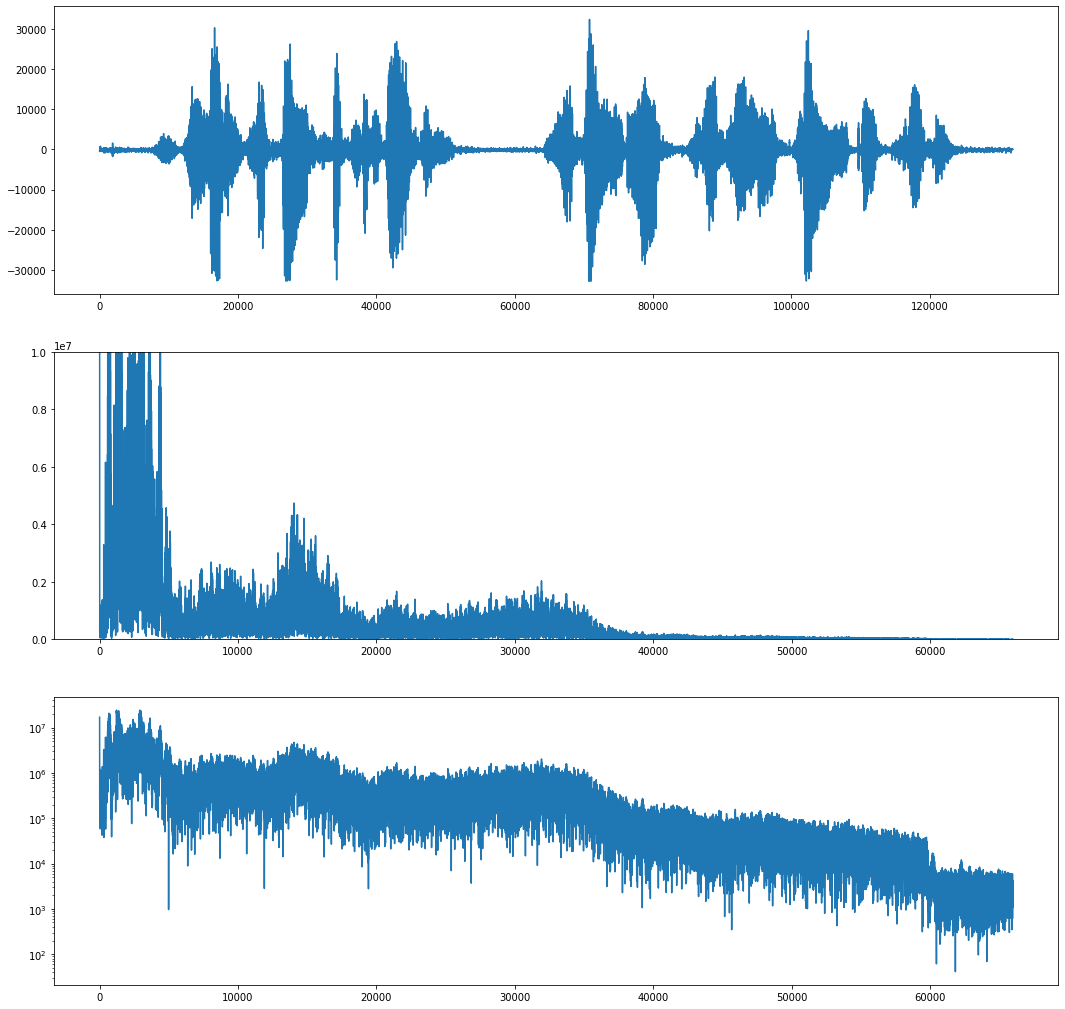


##############################   17   ##############################



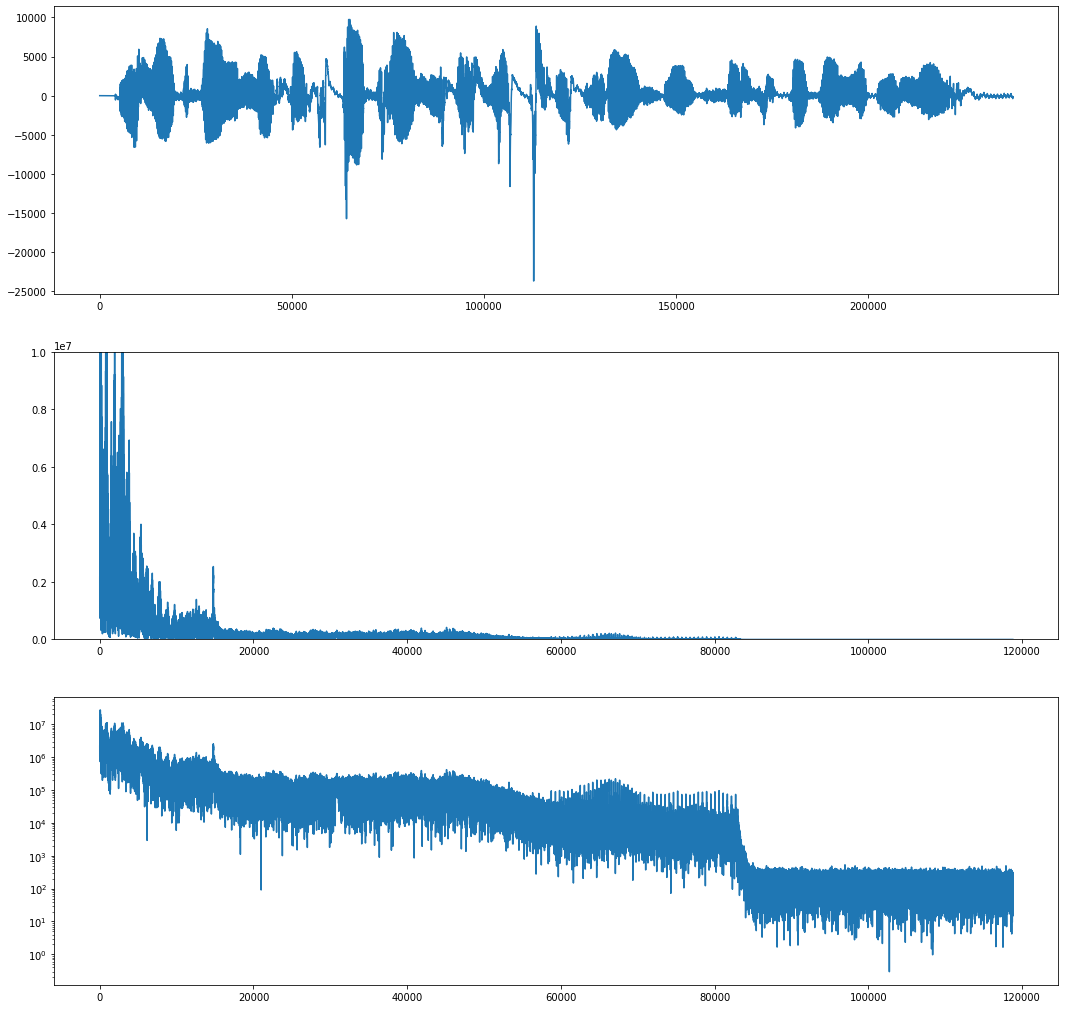


##############################   18   ##############################



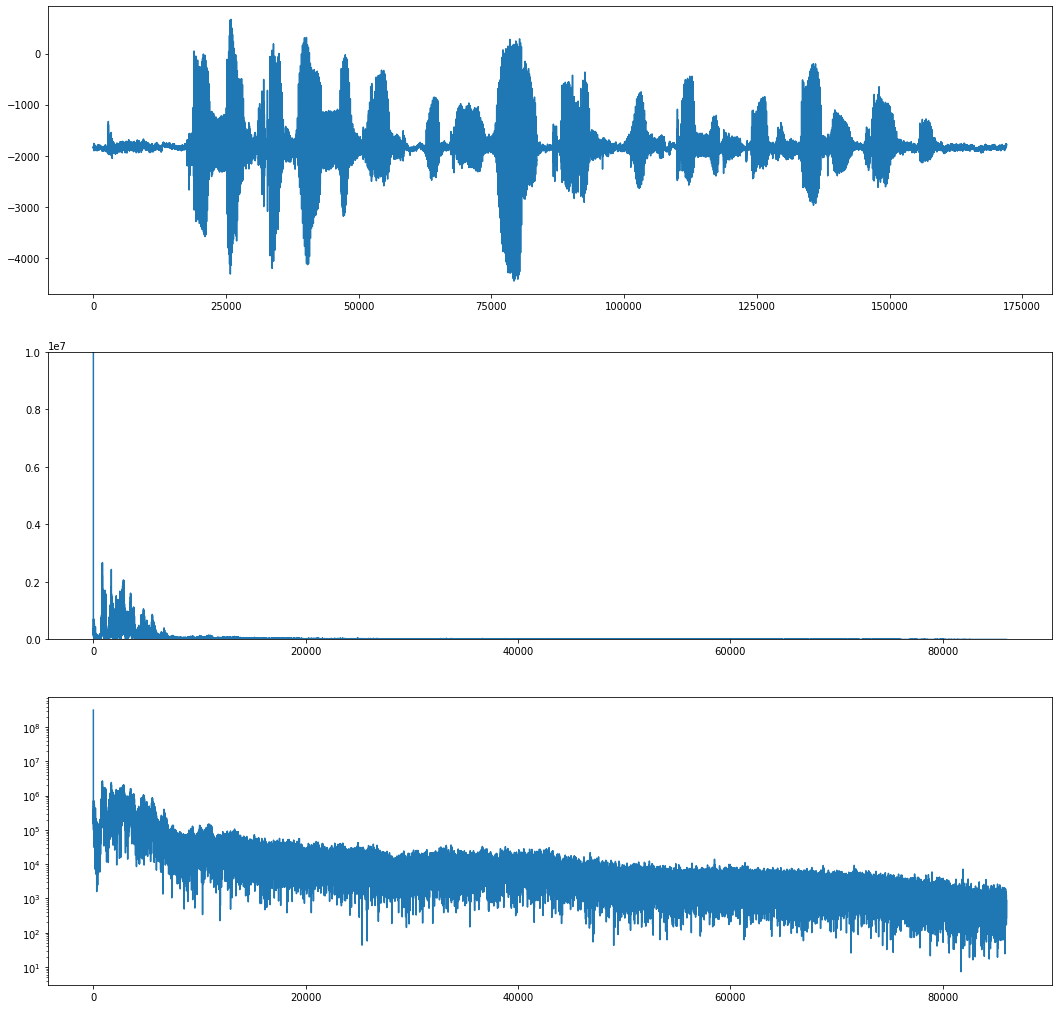


##############################   19   ##############################



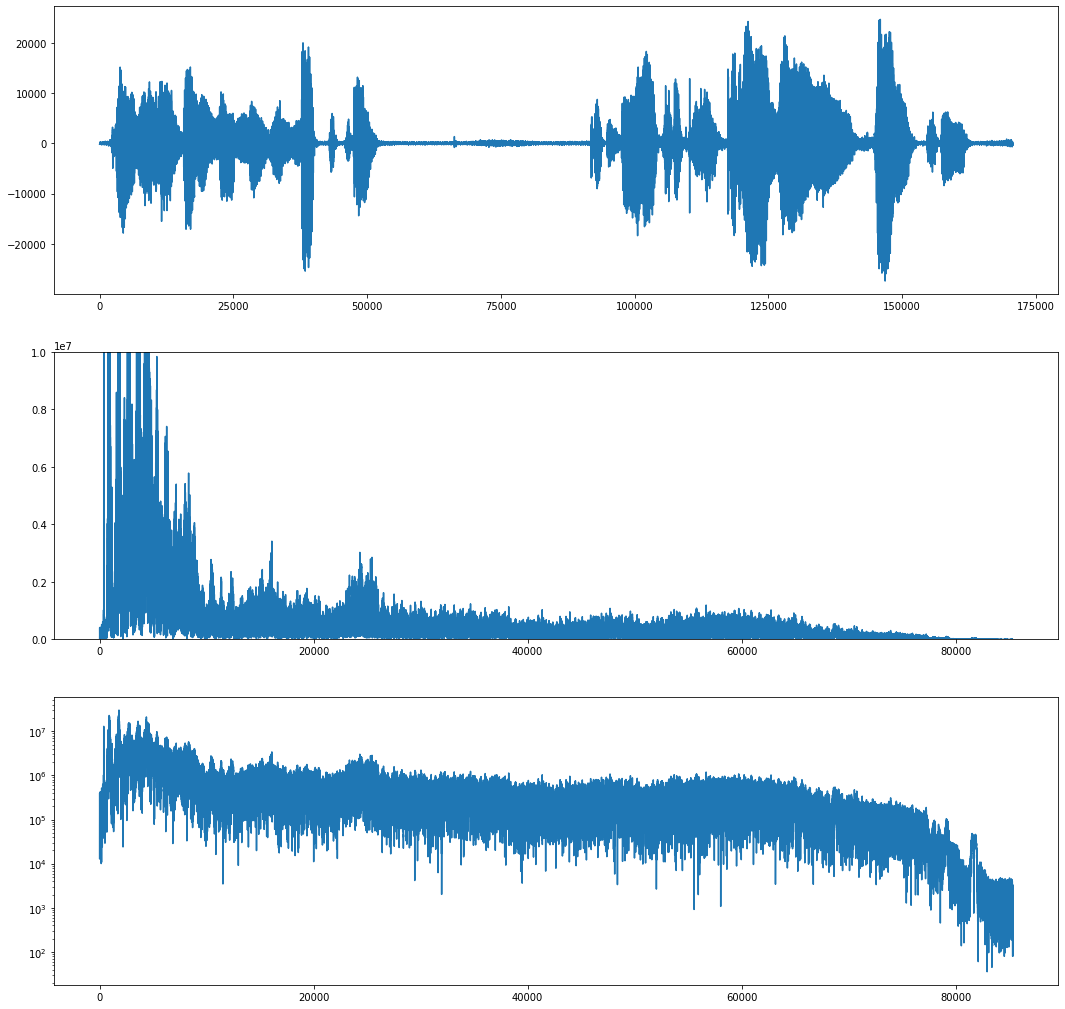


##############################   20   ##############################



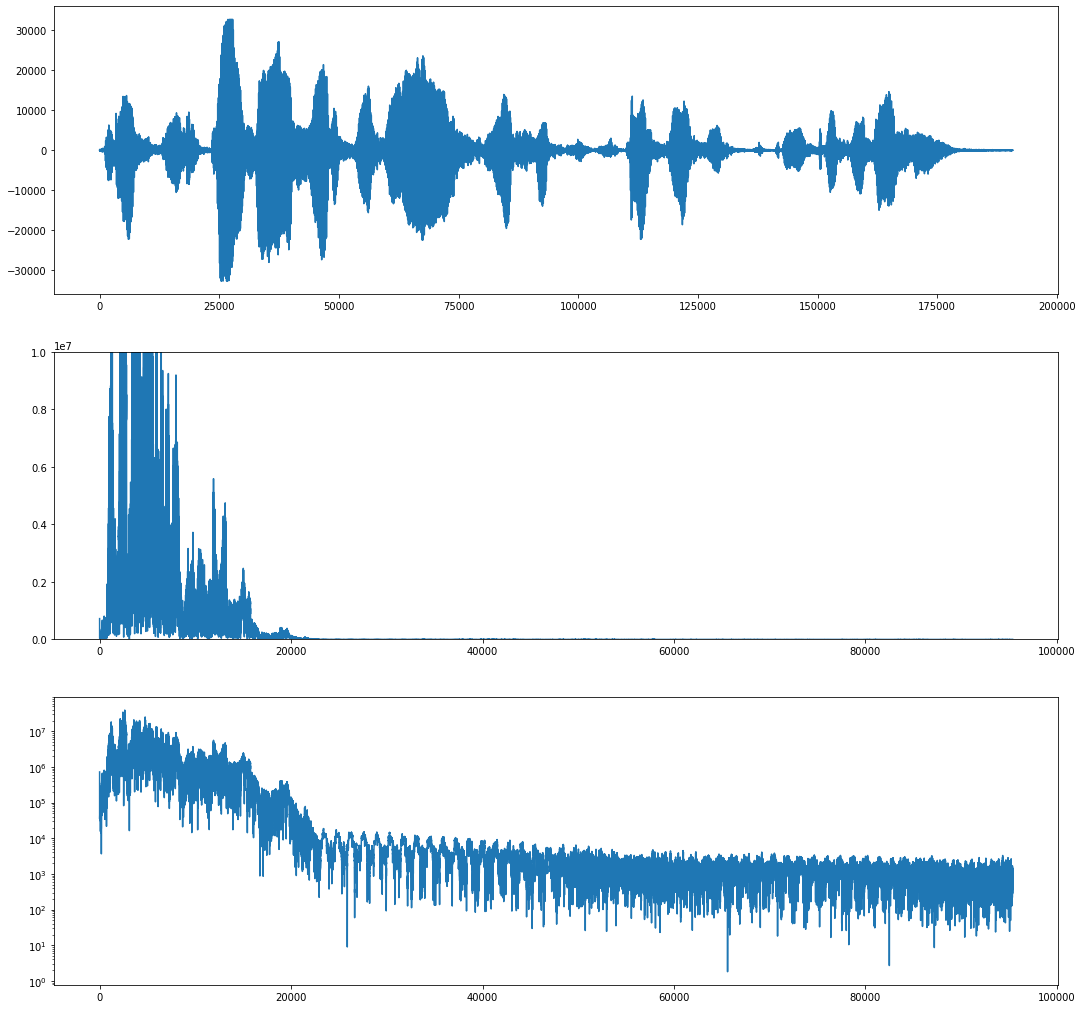


##############################   21   ##############################



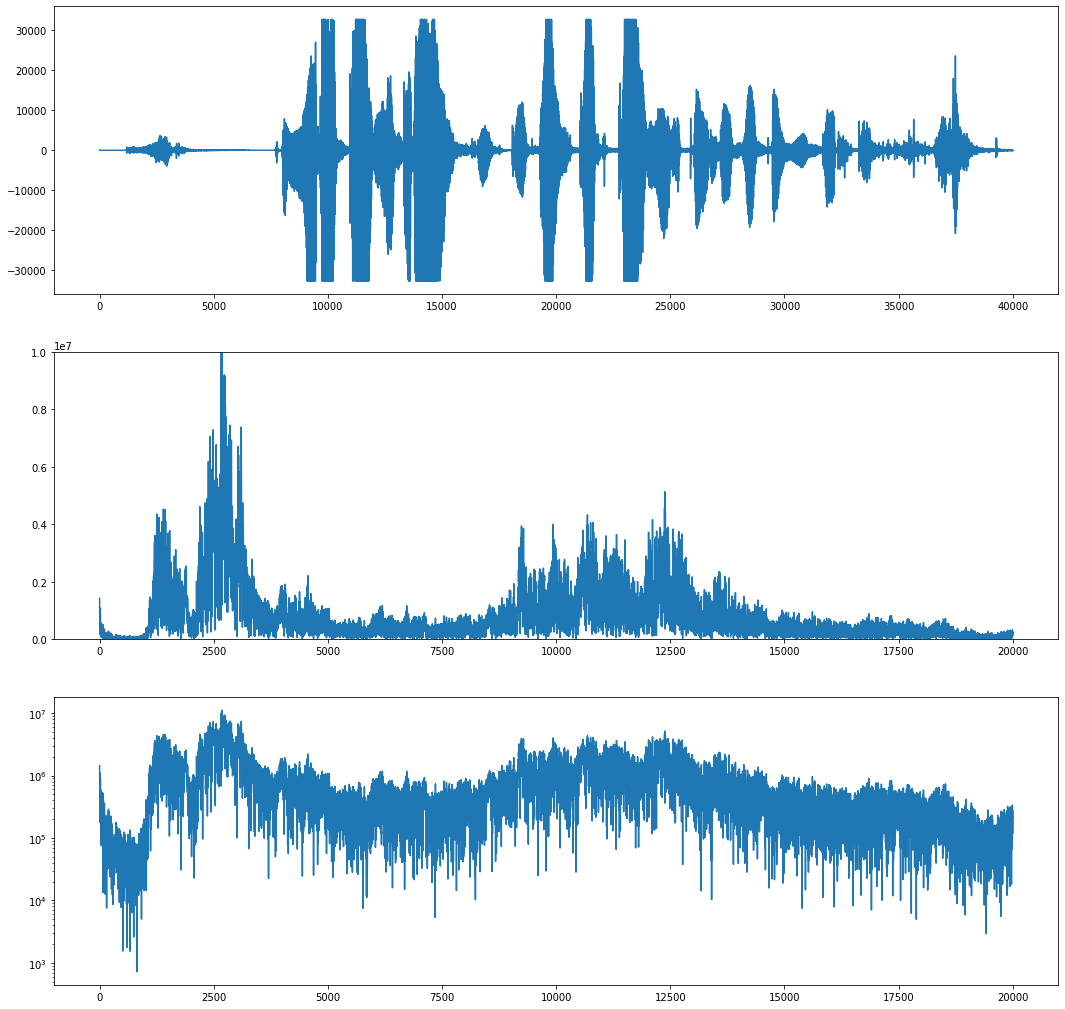


##############################   22   ##############################



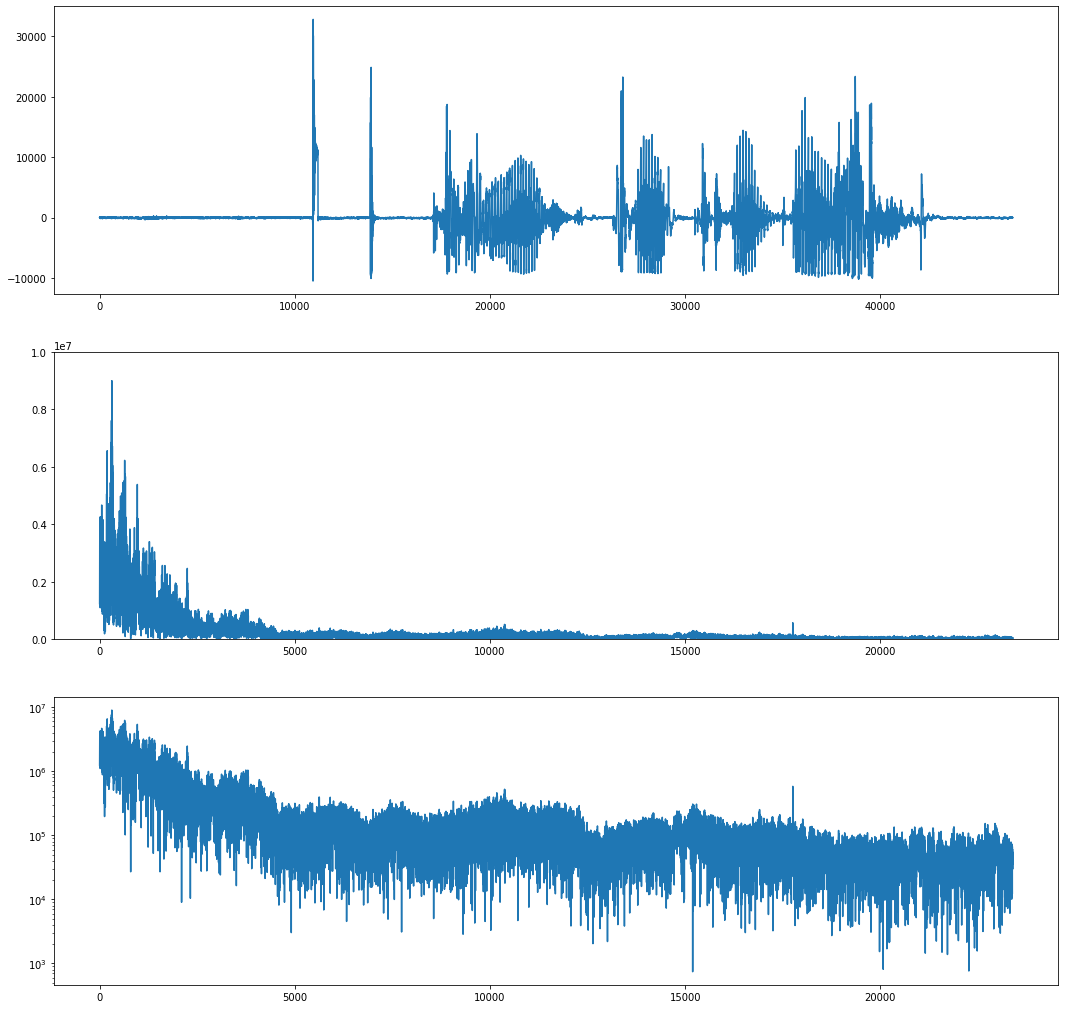


##############################   24   ##############################



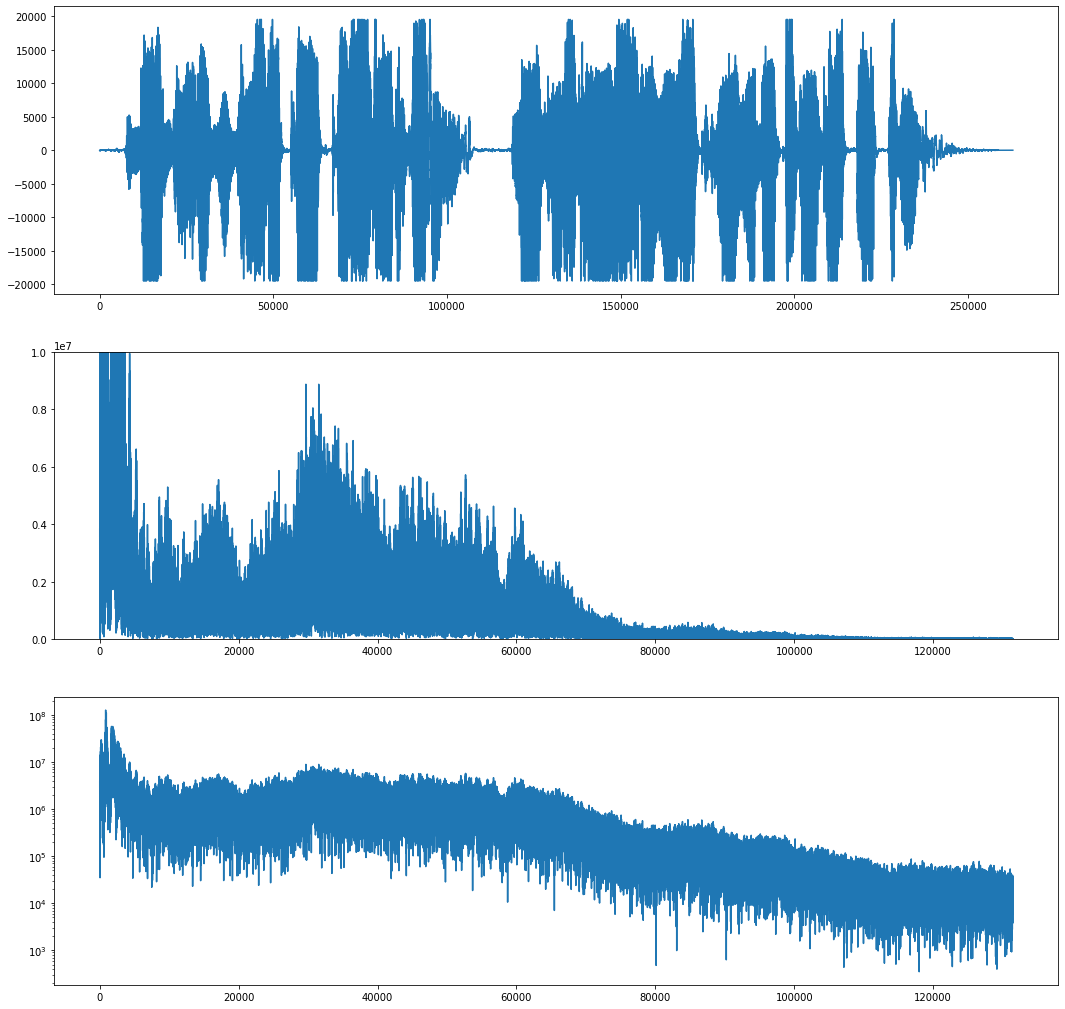


##############################   25   ##############################



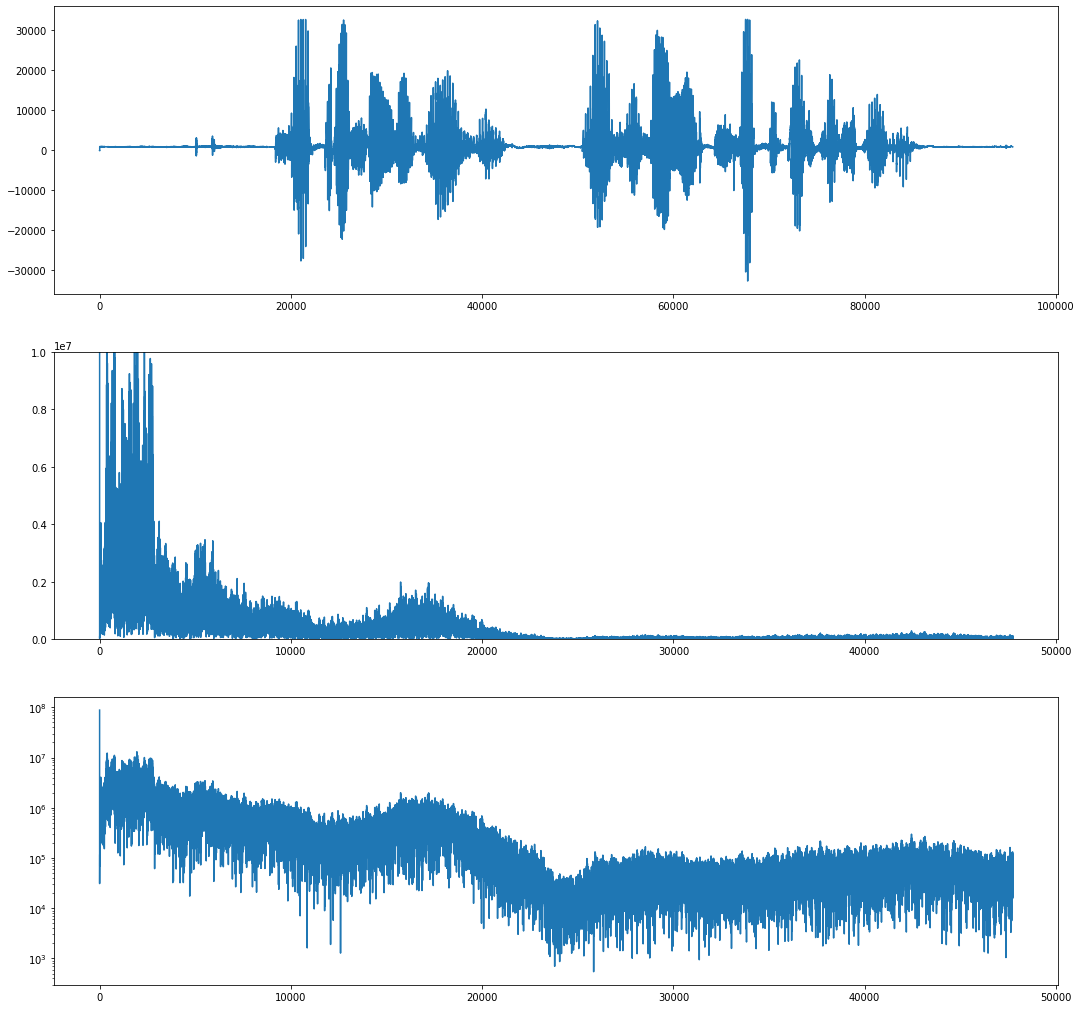


##############################   26   ##############################



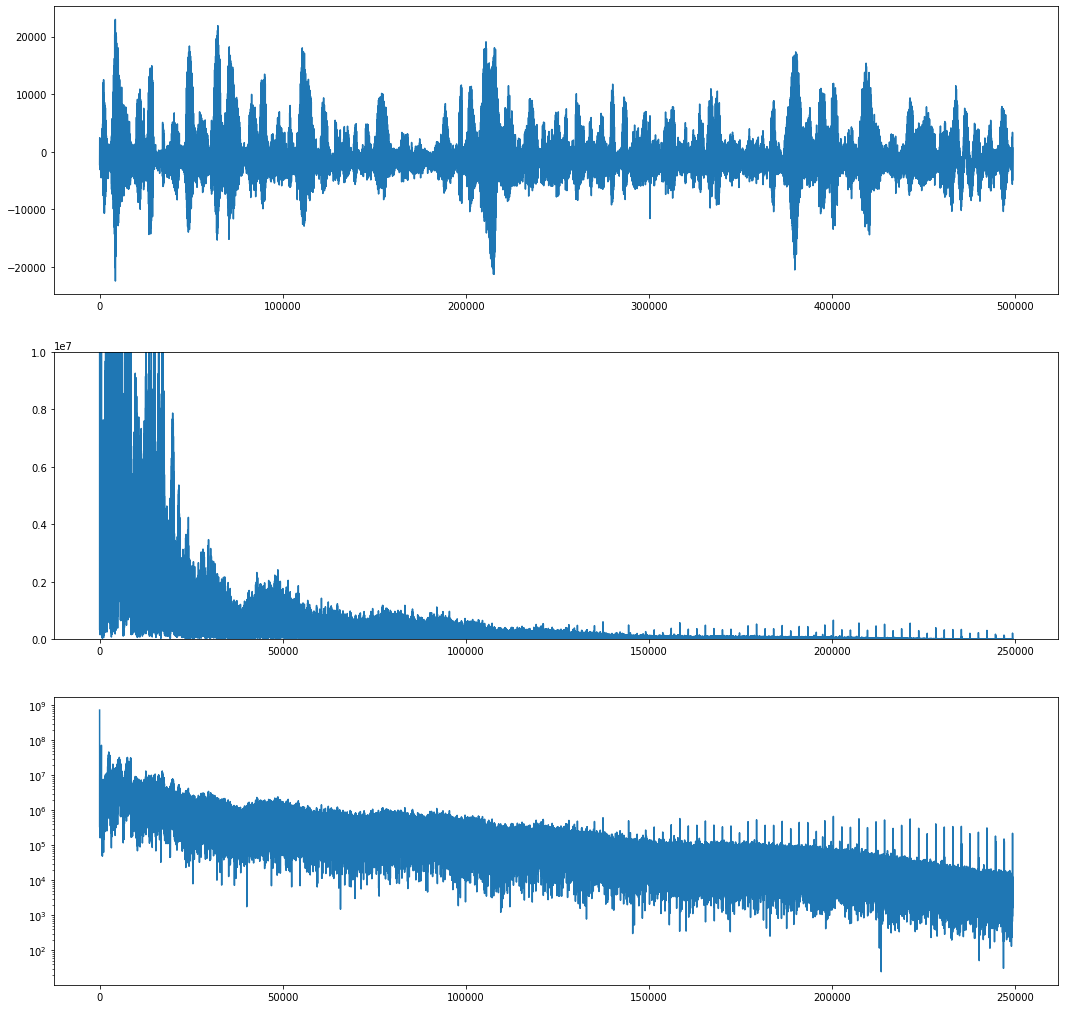


##############################   27   ##############################



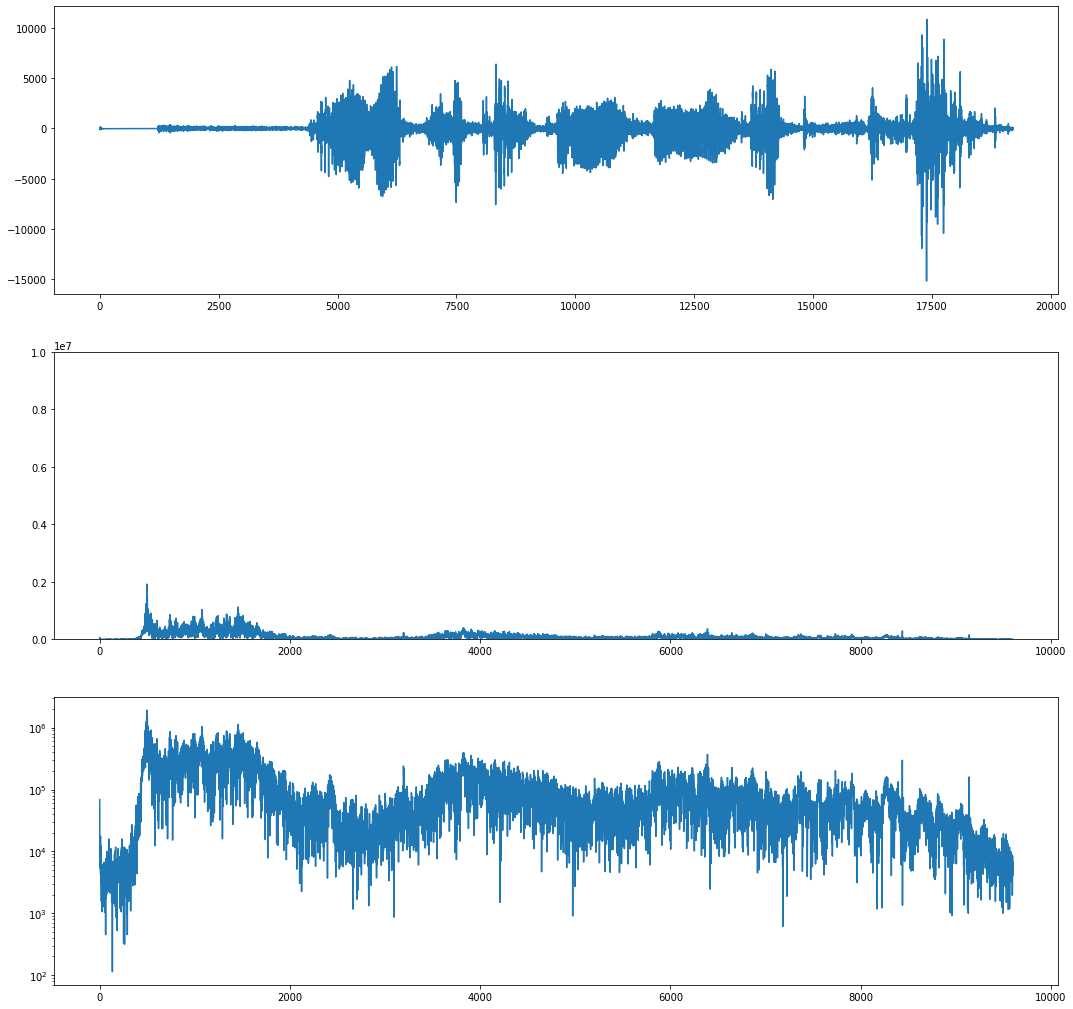


##############################   28   ##############################



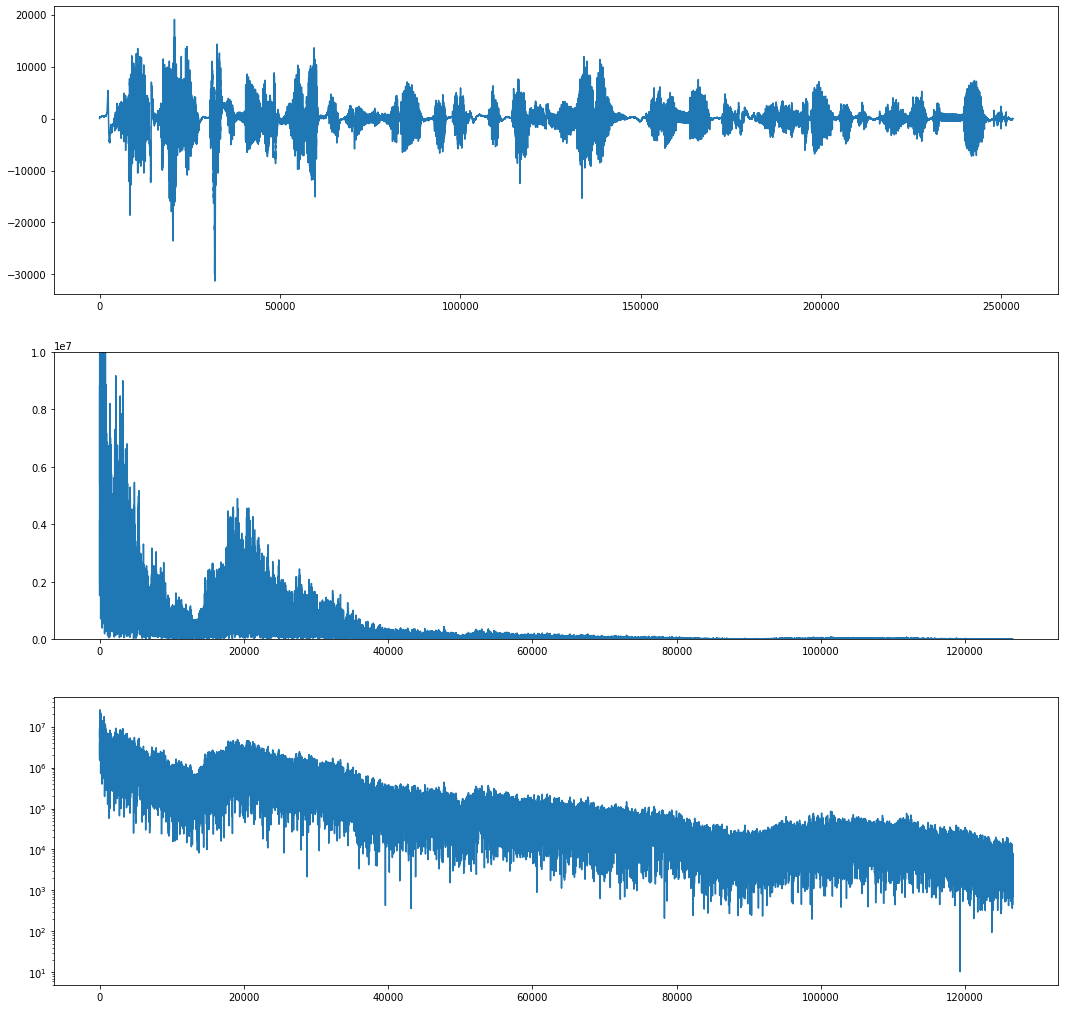


##############################   29   ##############################



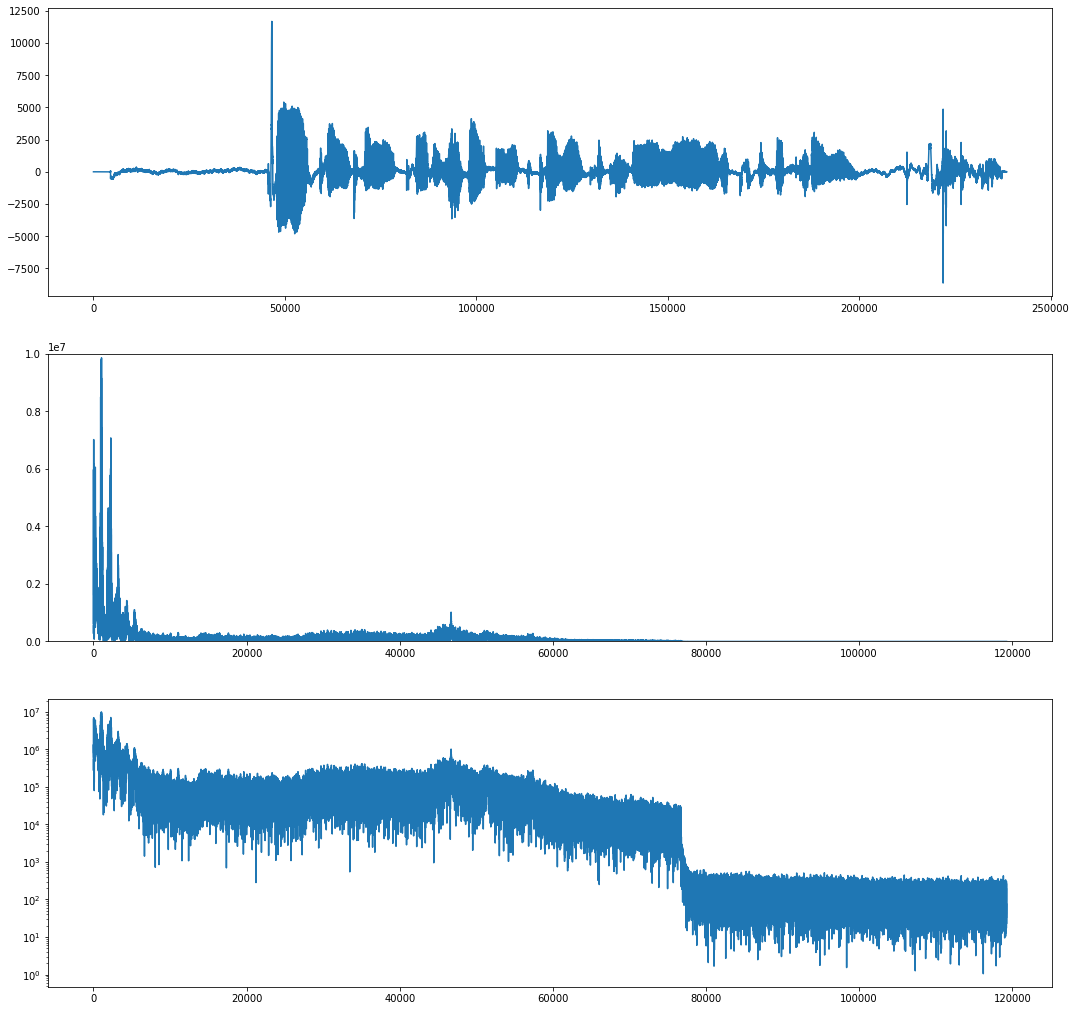


##############################   30   ##############################



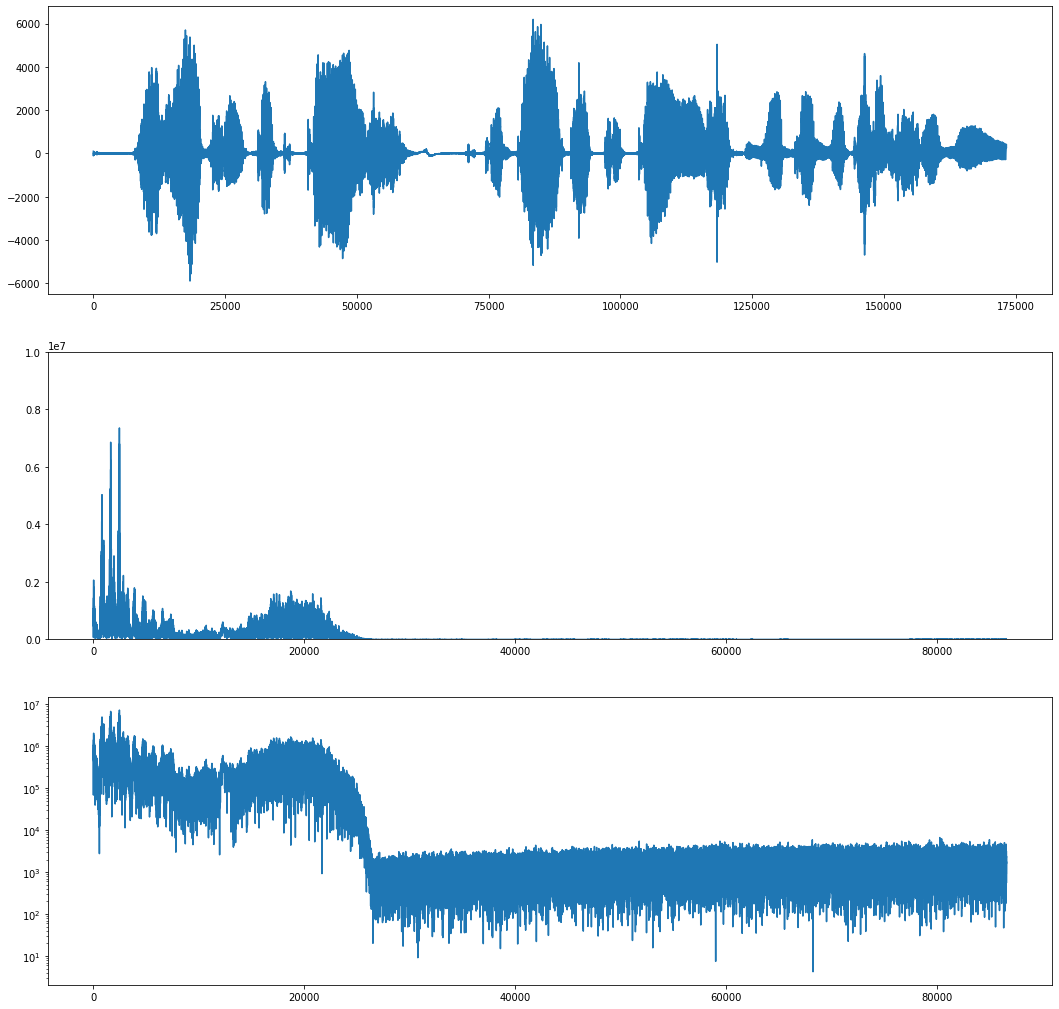


##############################   31   ##############################



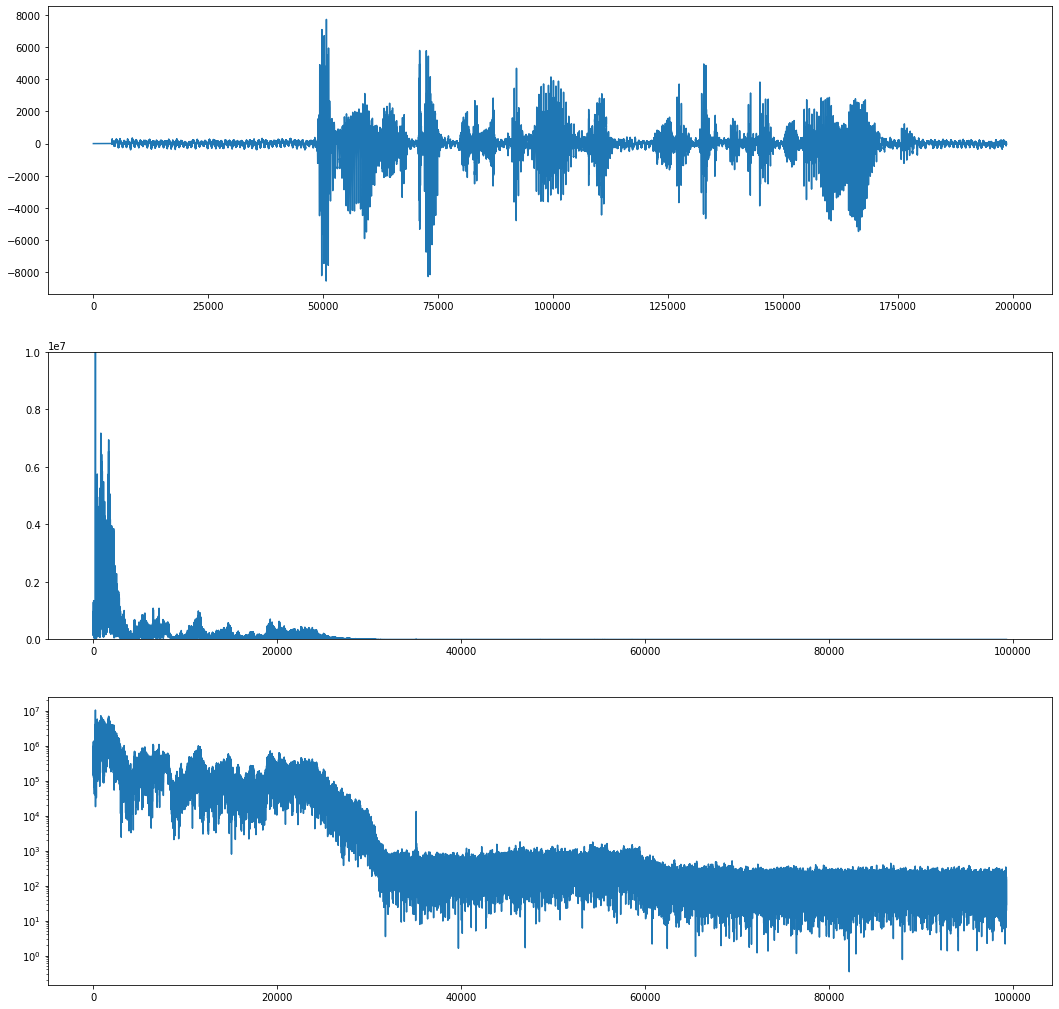


##############################   32   ##############################



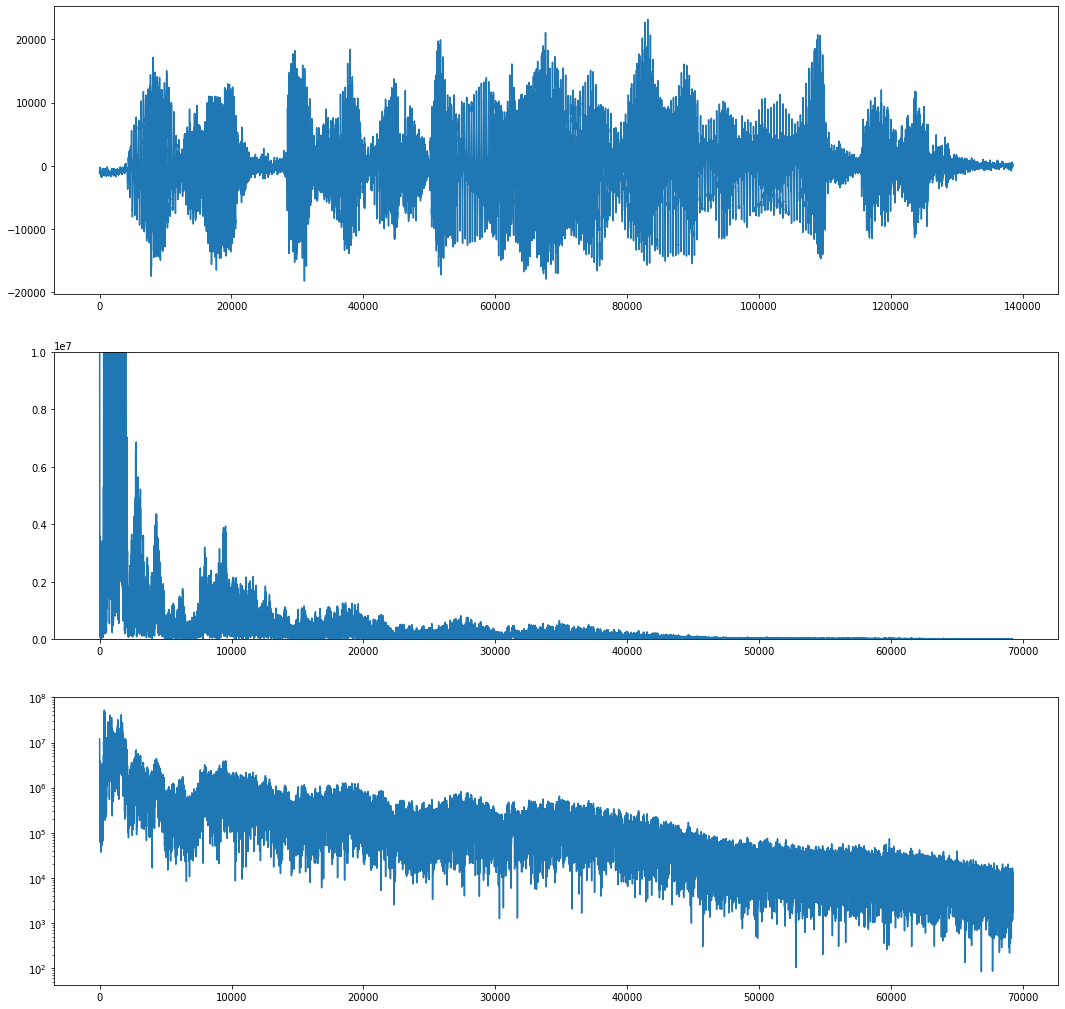


##############################   33   ##############################



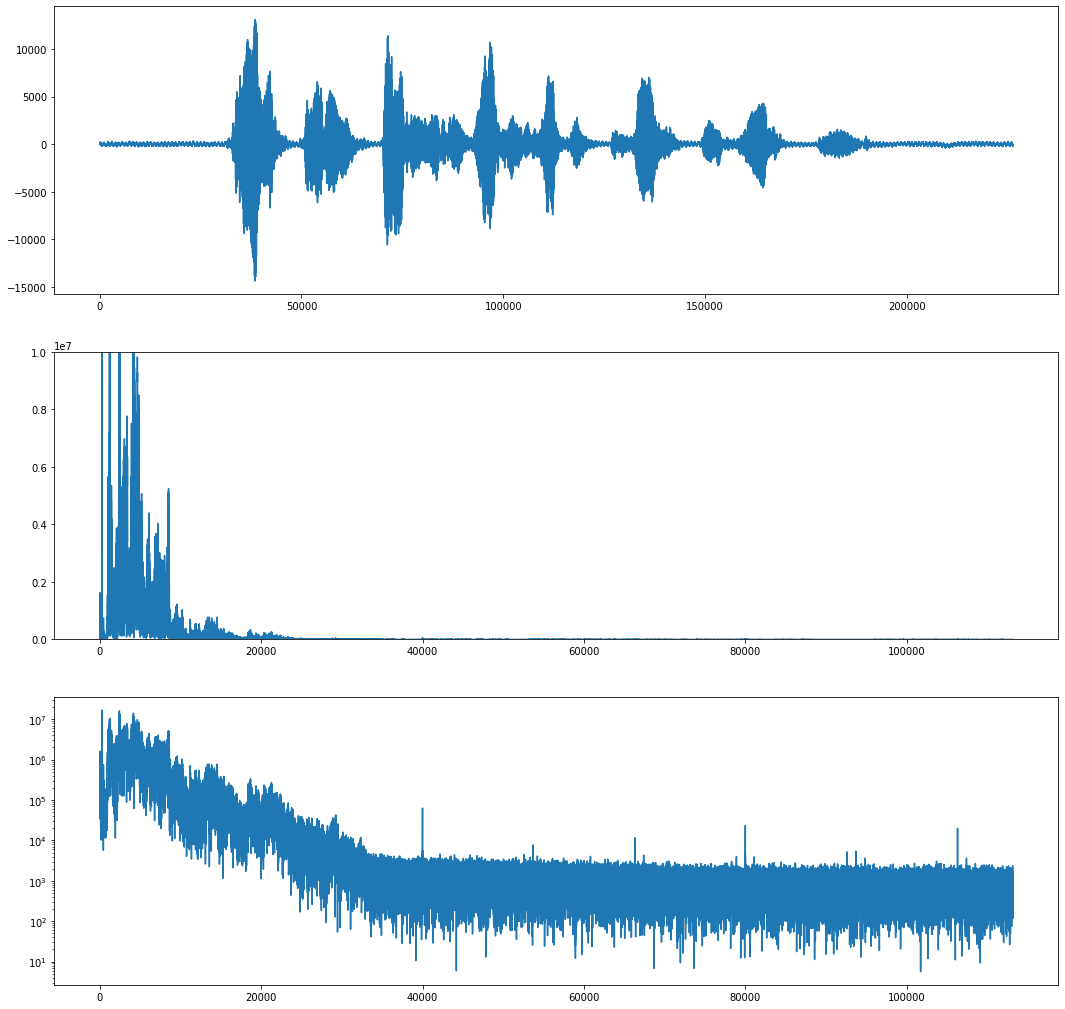


##############################   34   ##############################



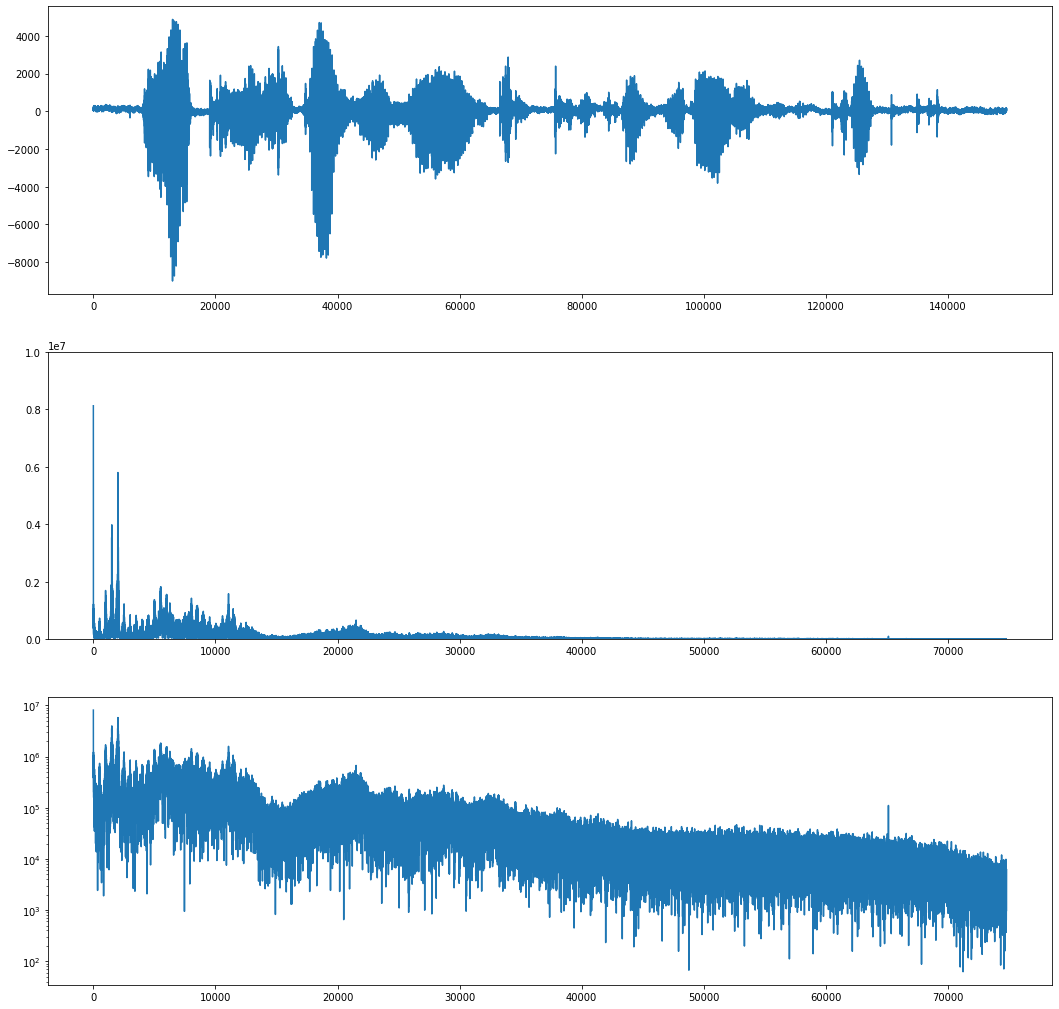


##############################   35   ##############################



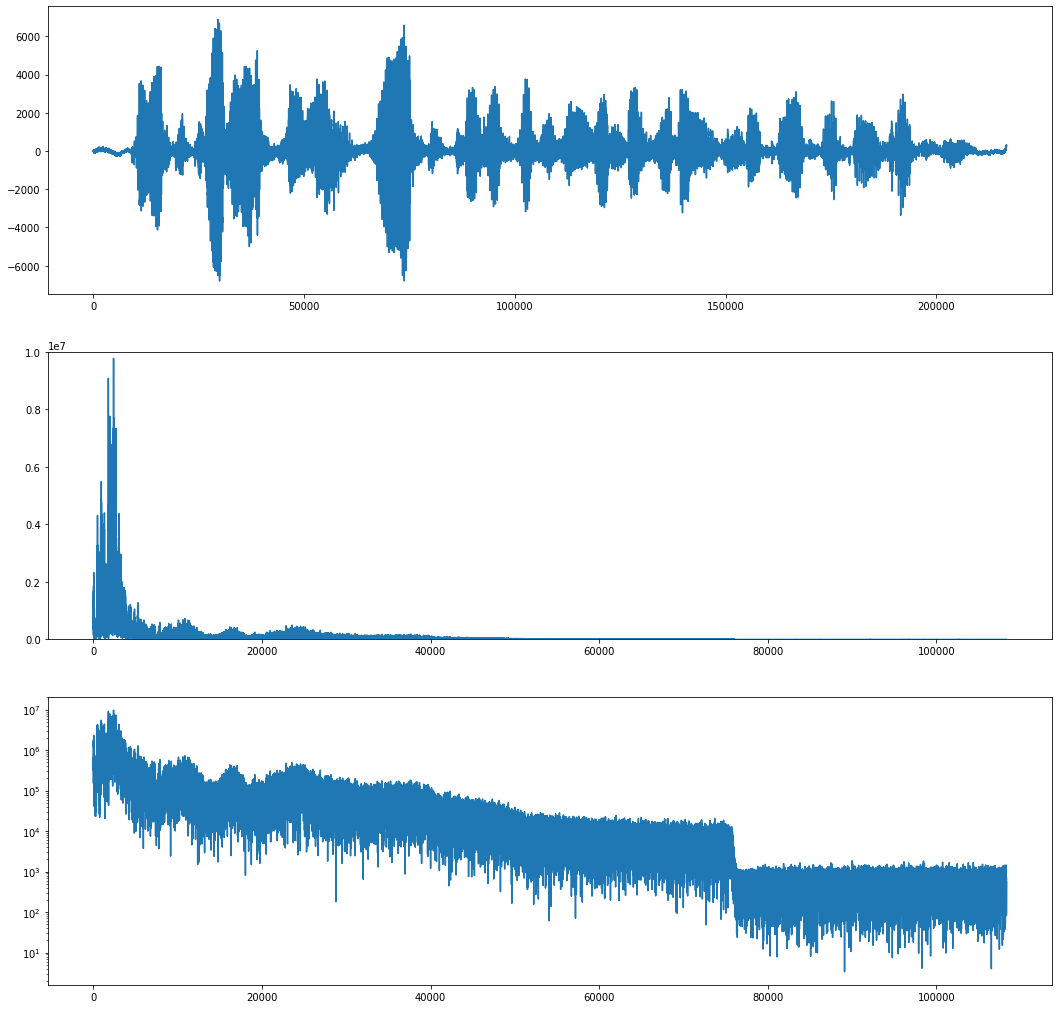


##############################   36   ##############################



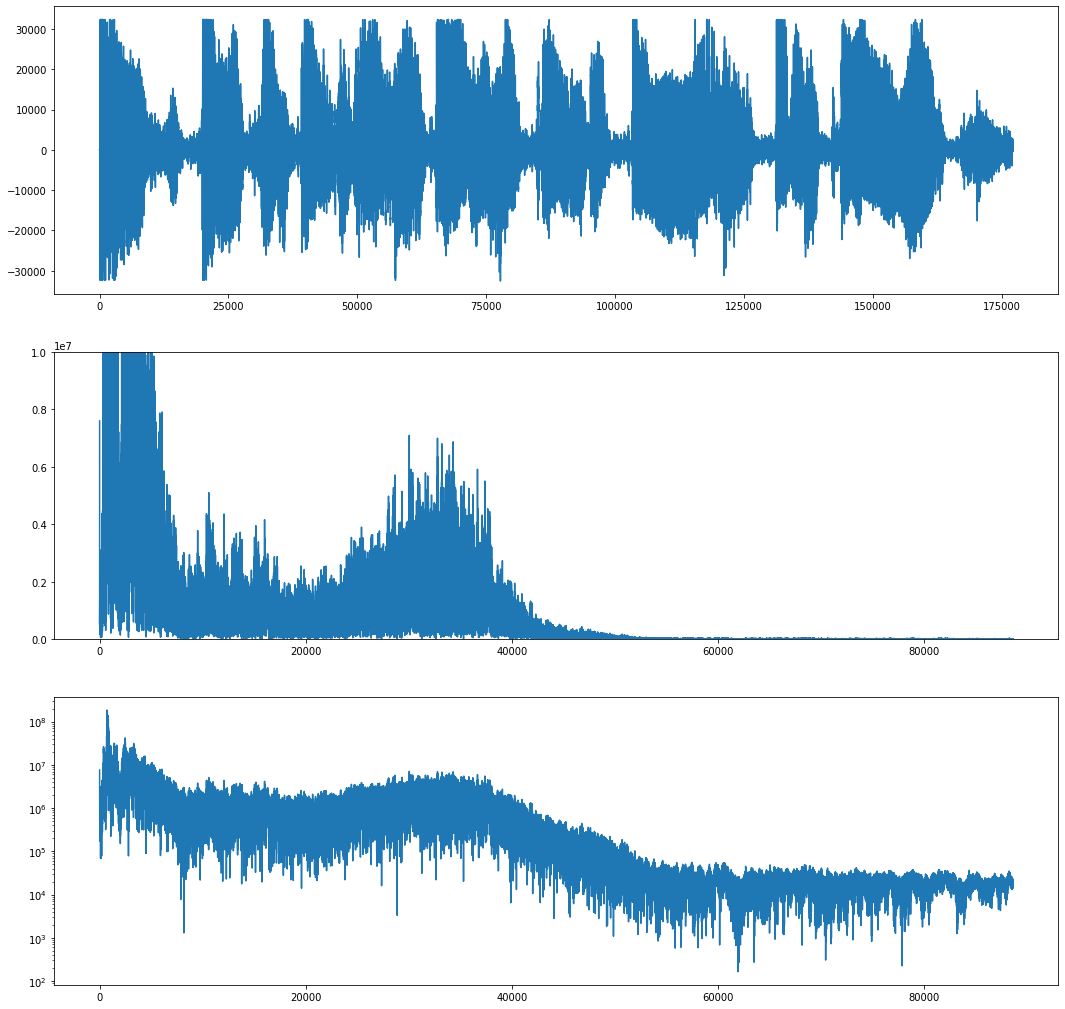


##############################   37   ##############################



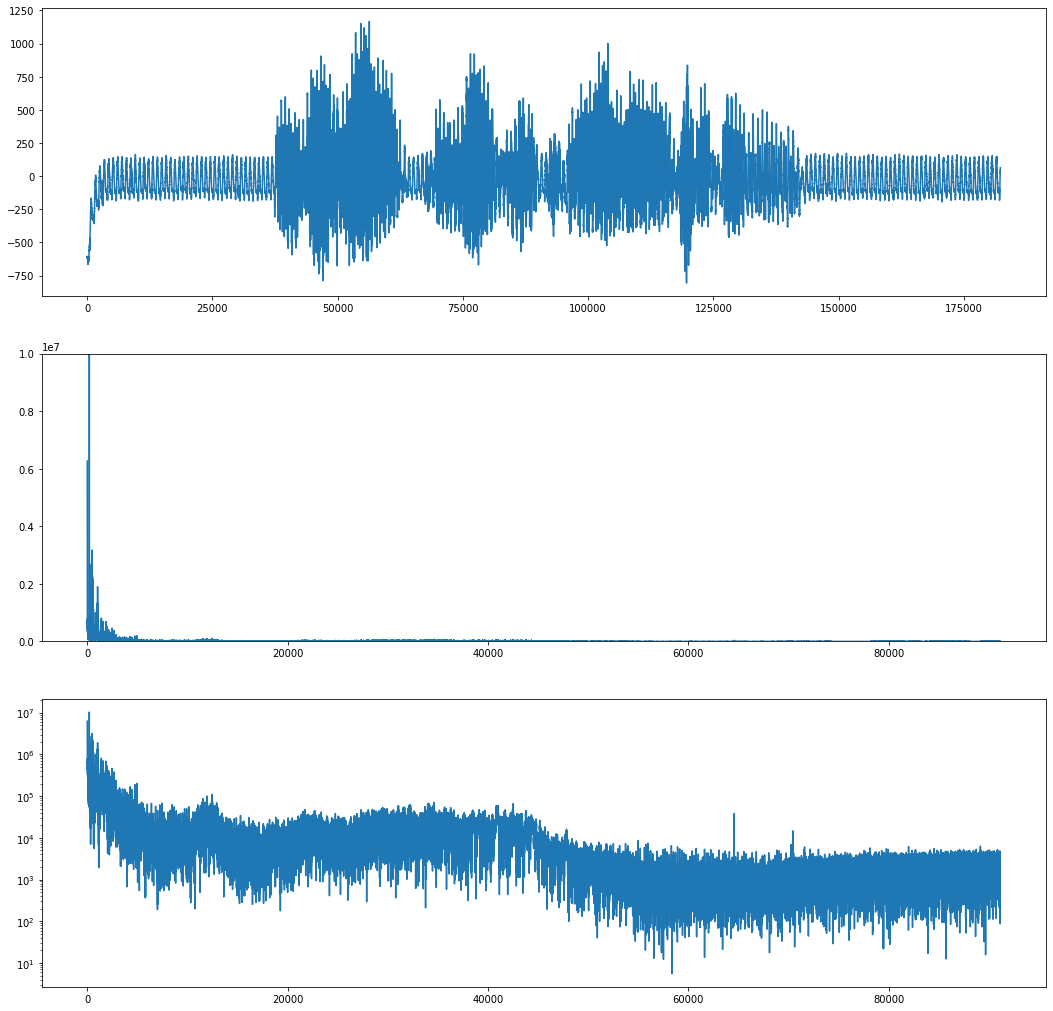


##############################   38   ##############################



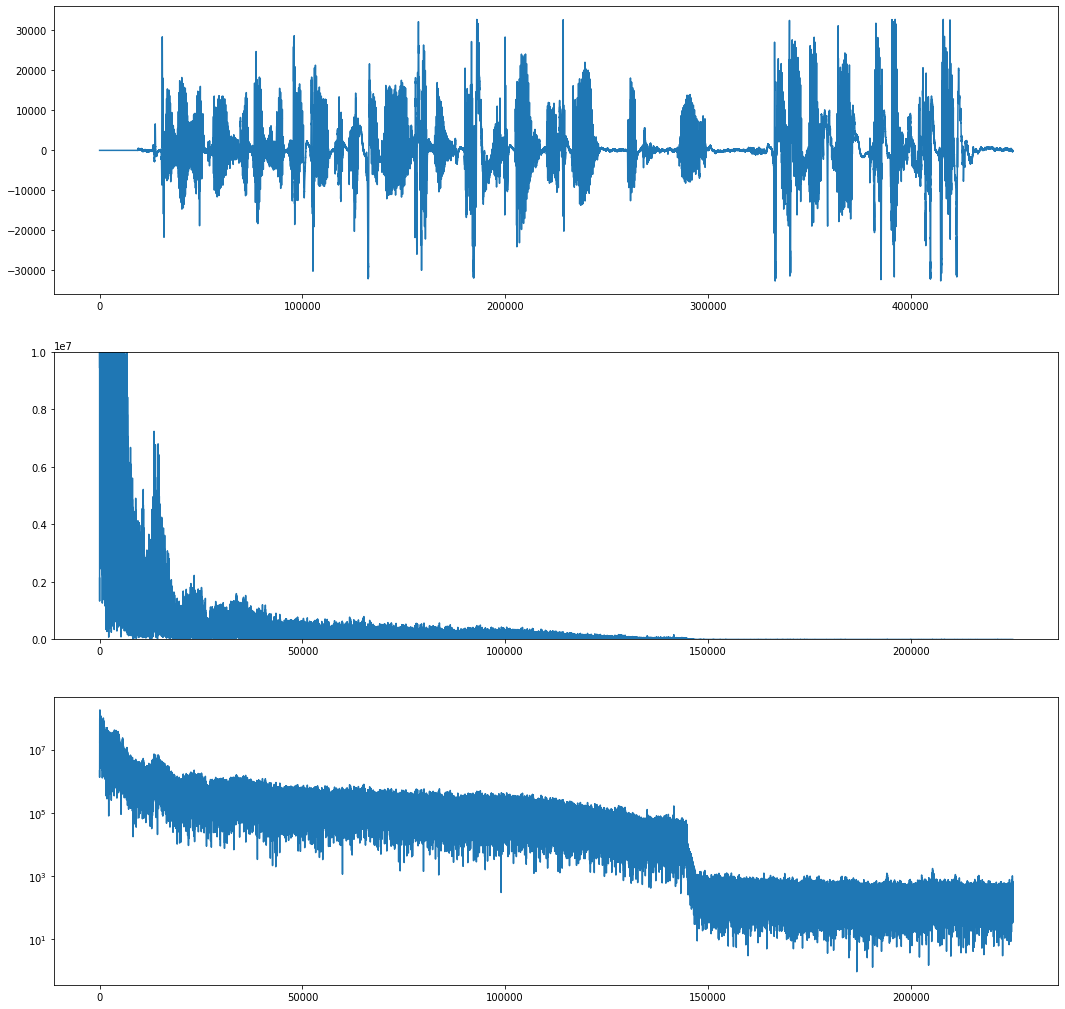


##############################   39   ##############################



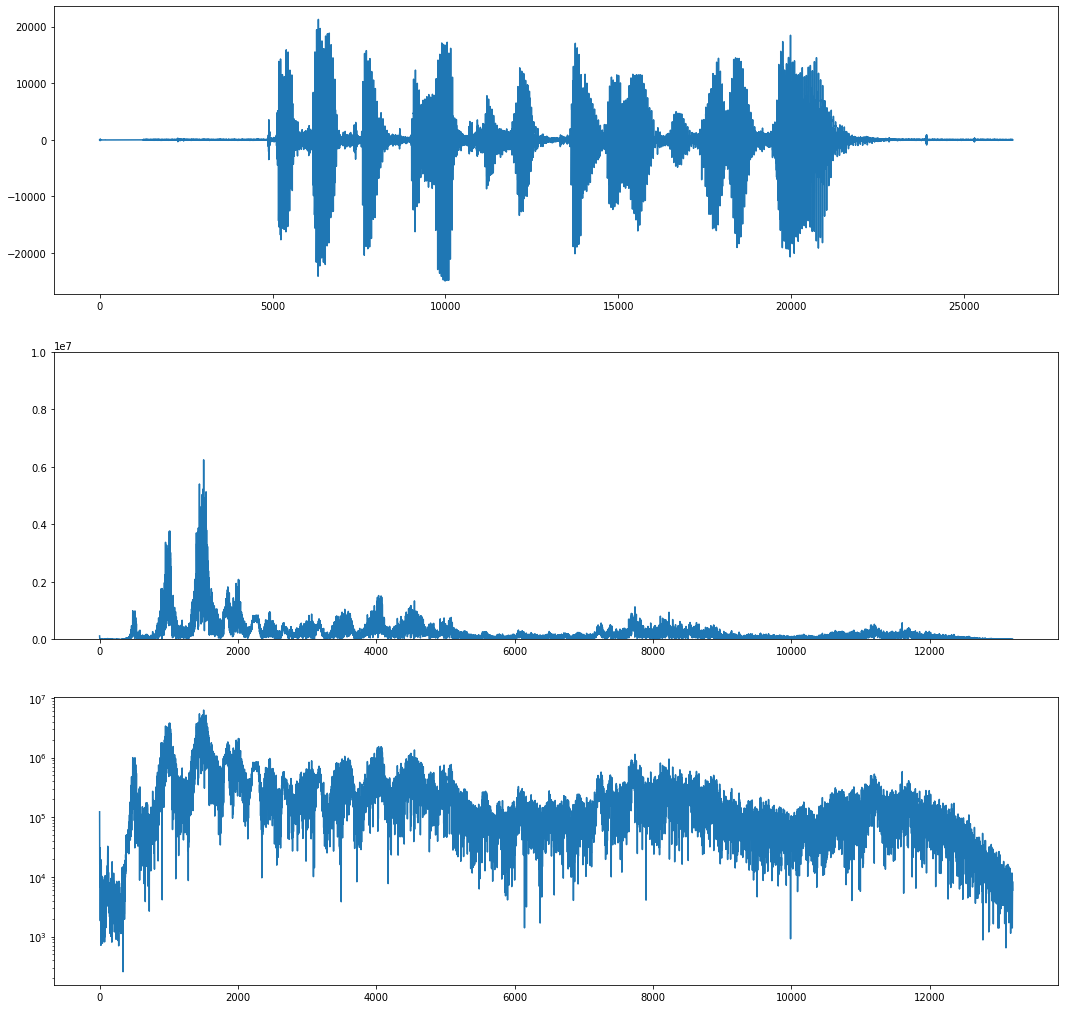


##############################   40   ##############################



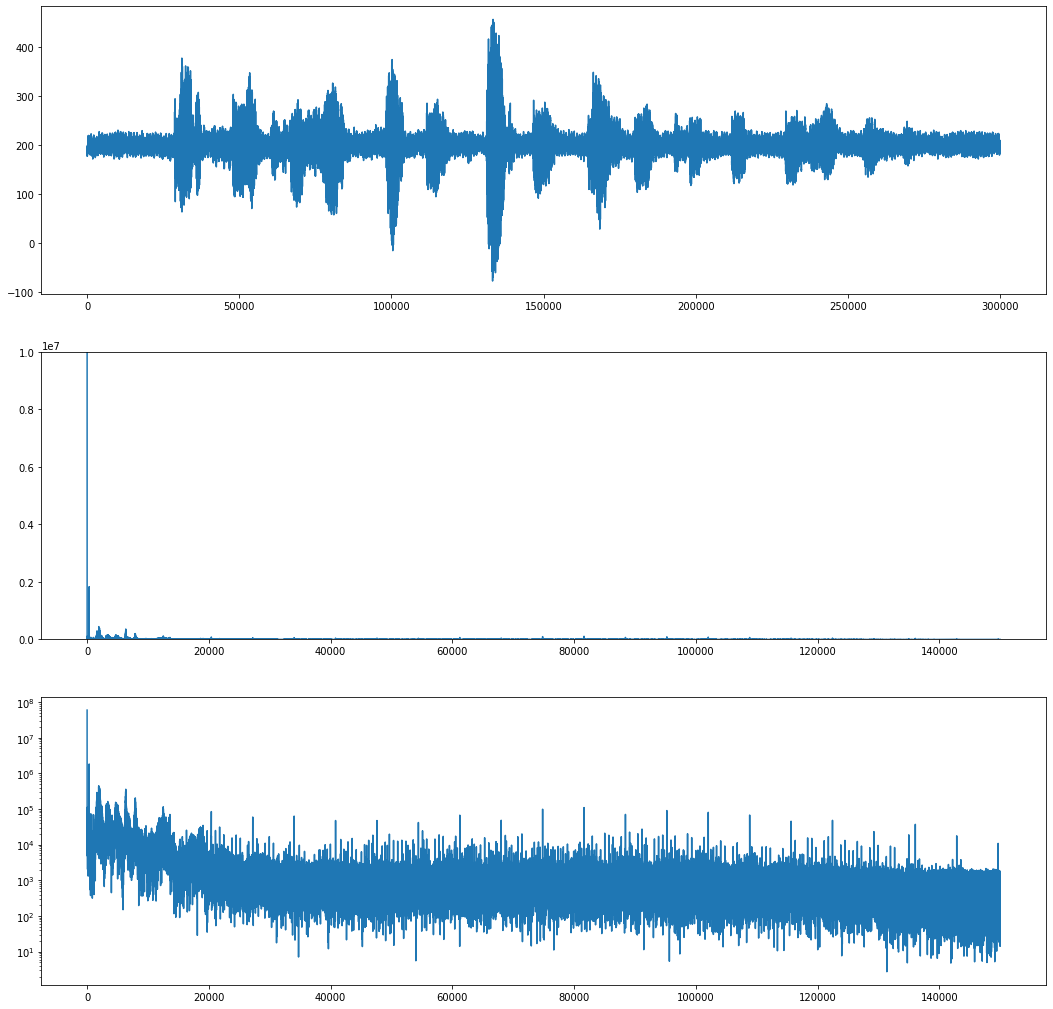


##############################   41   ##############################



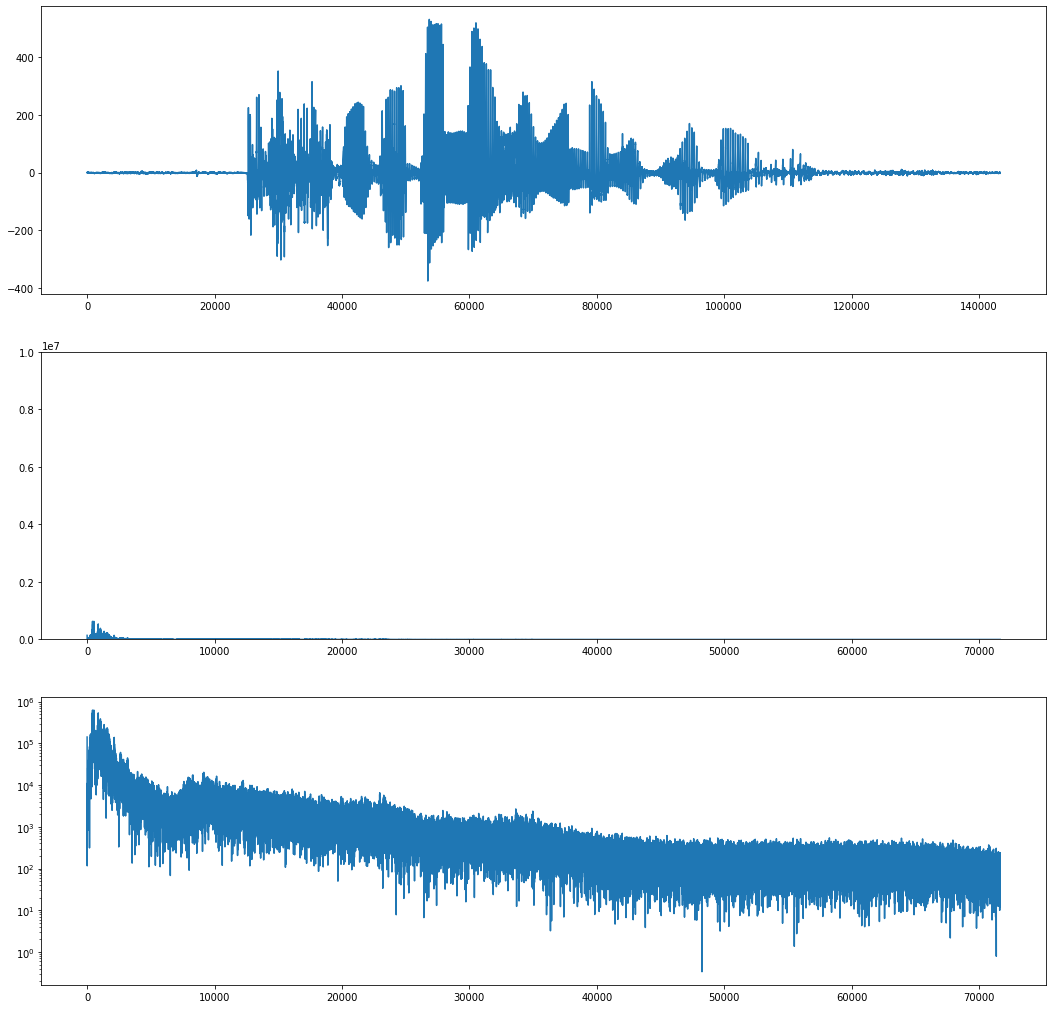


##############################   42   ##############################



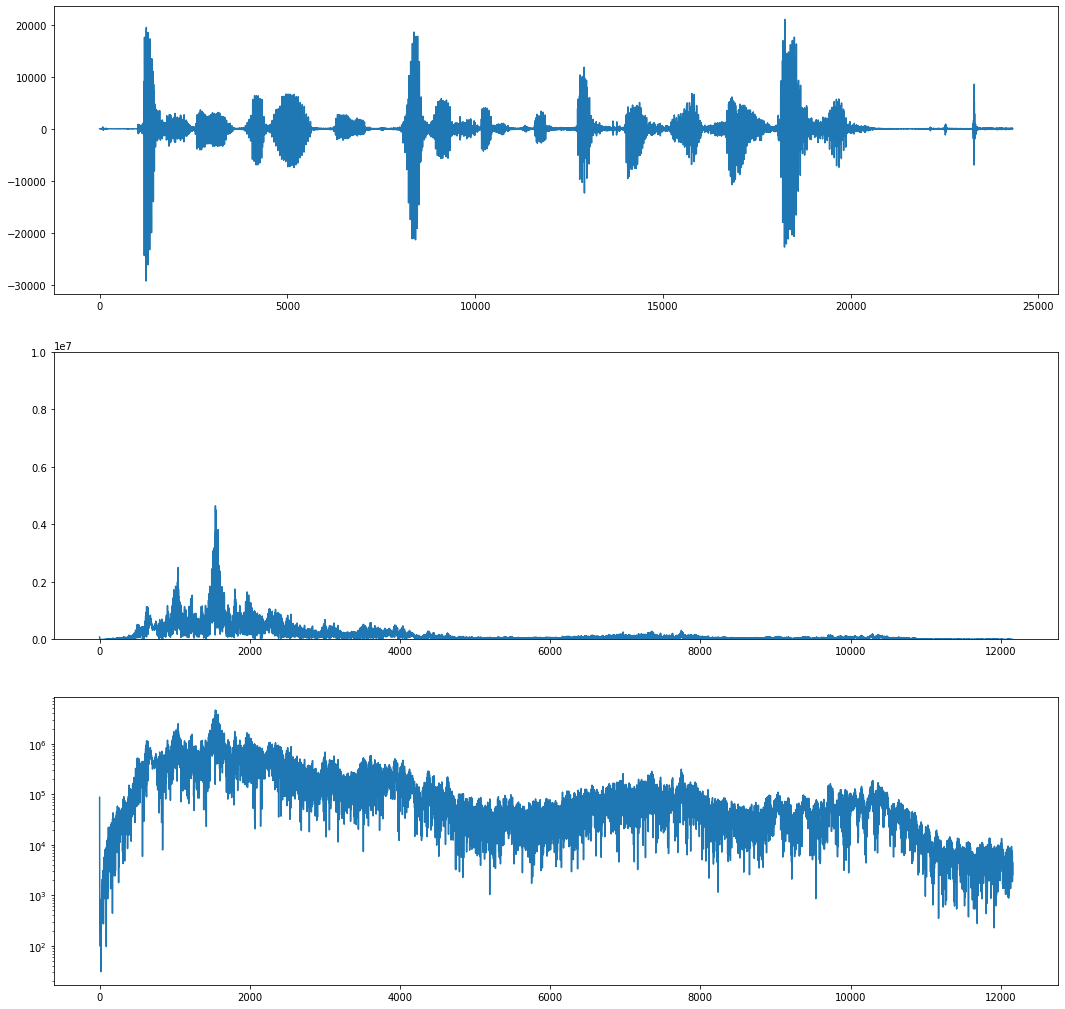


##############################   43   ##############################



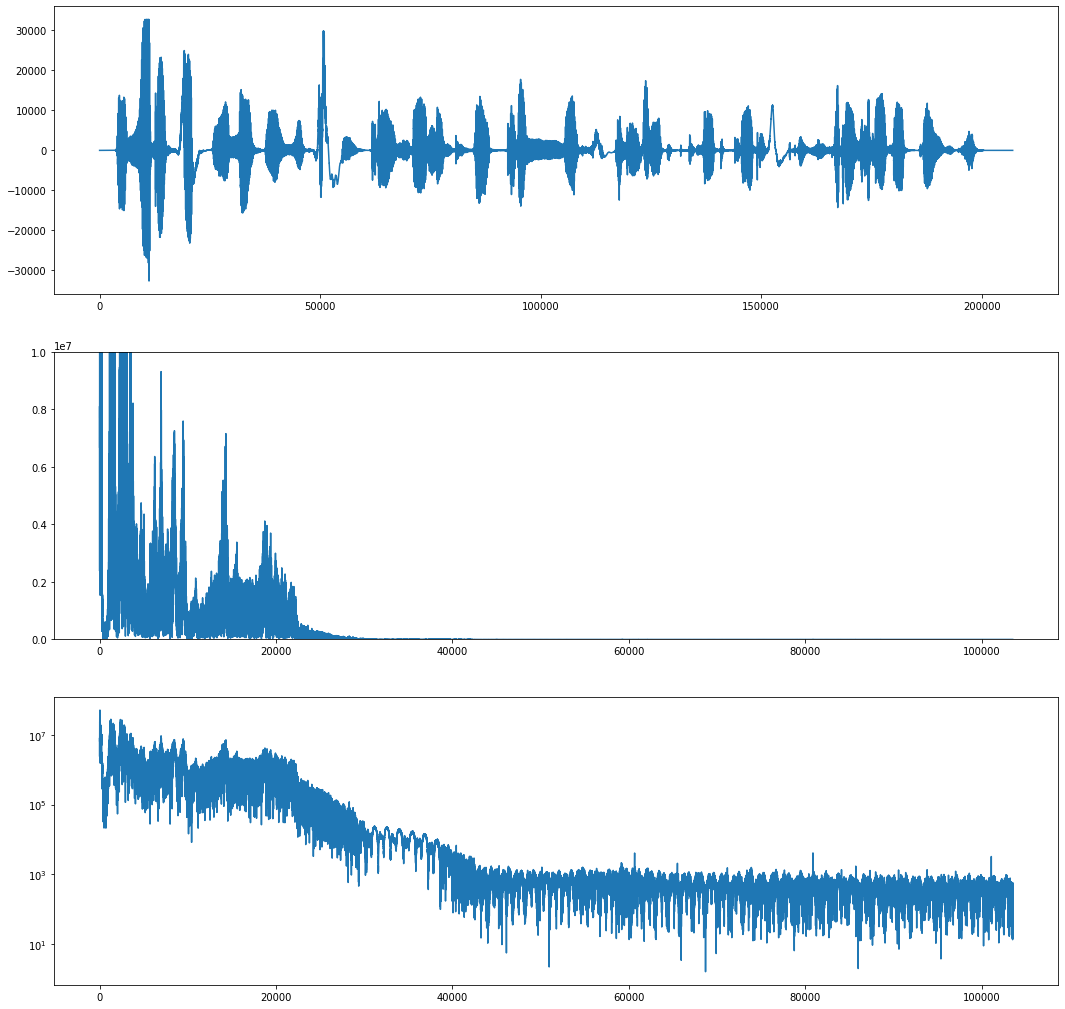


##############################   44   ##############################



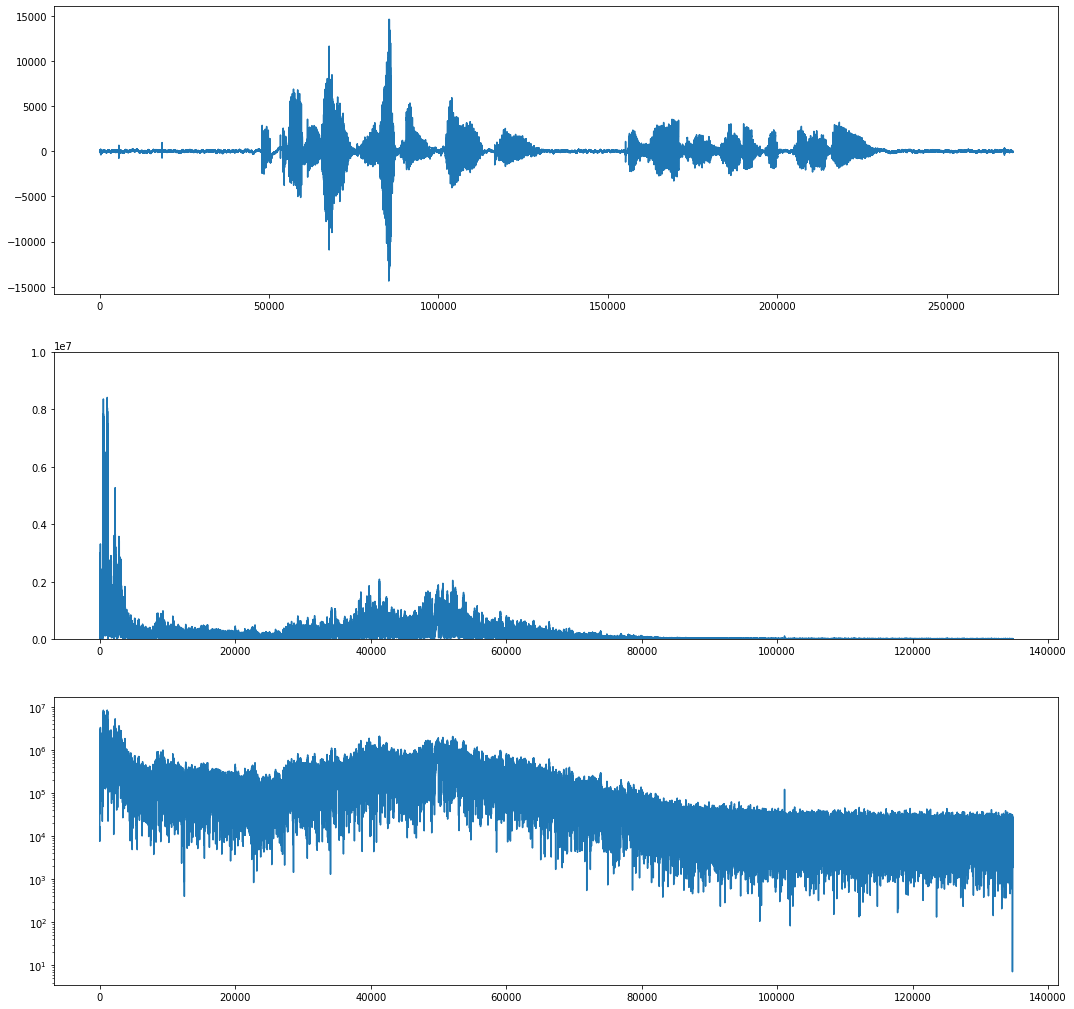


##############################   45   ##############################



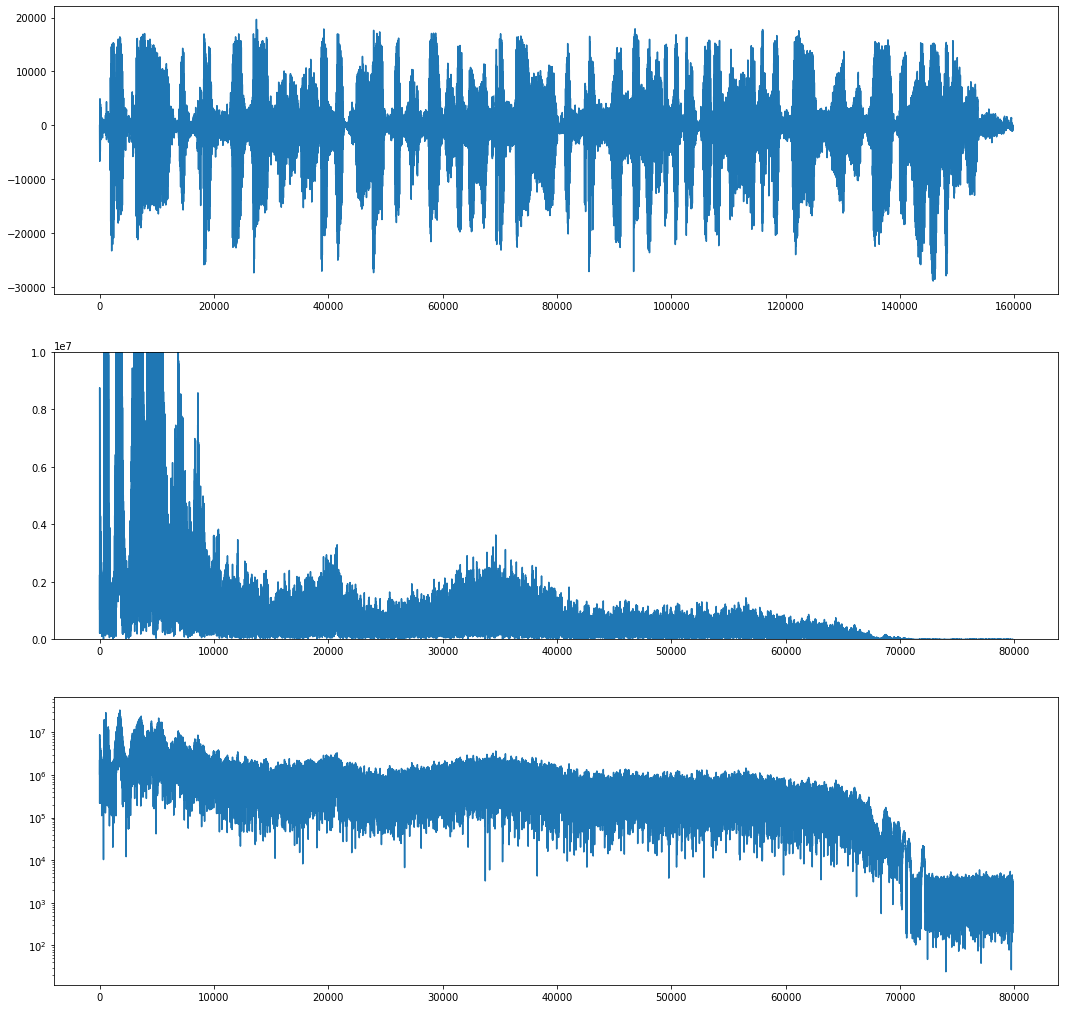


##############################   46   ##############################



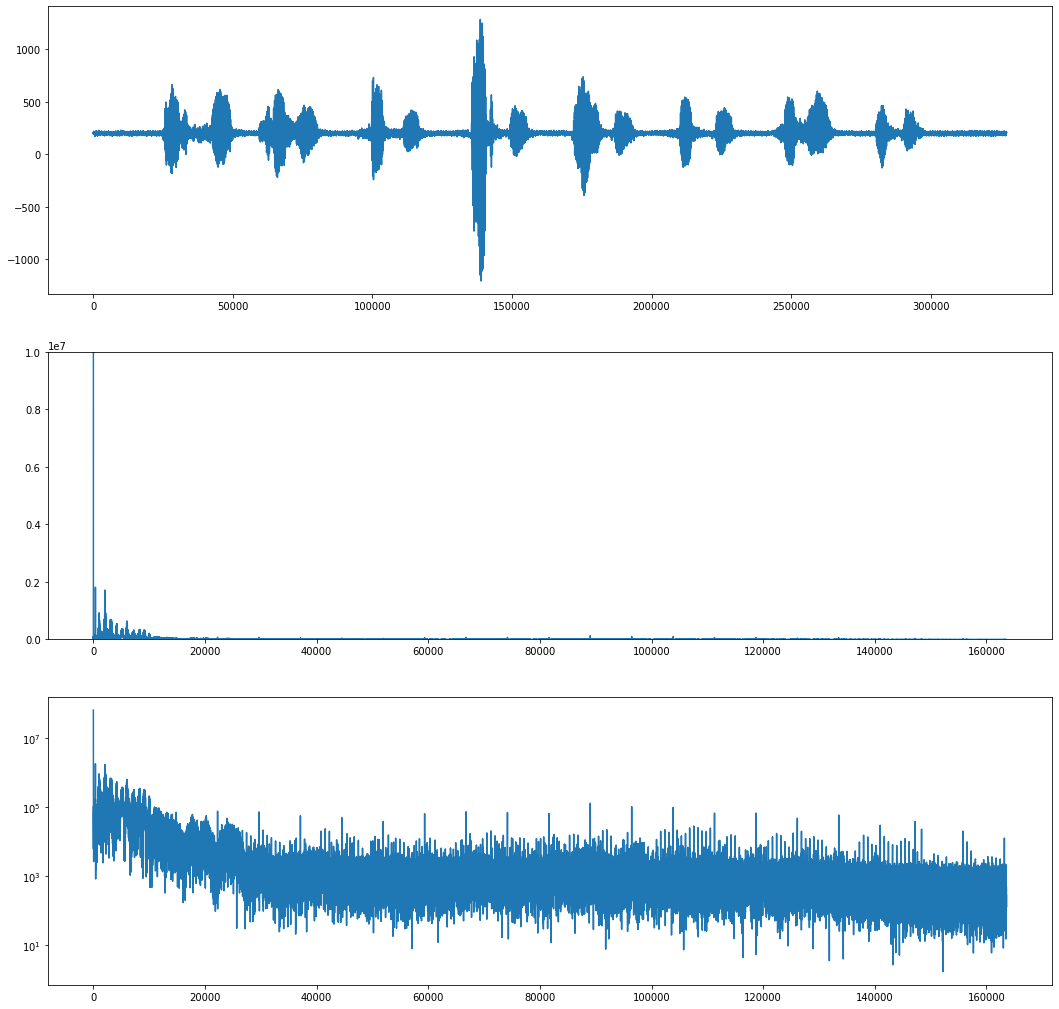


##############################   47   ##############################



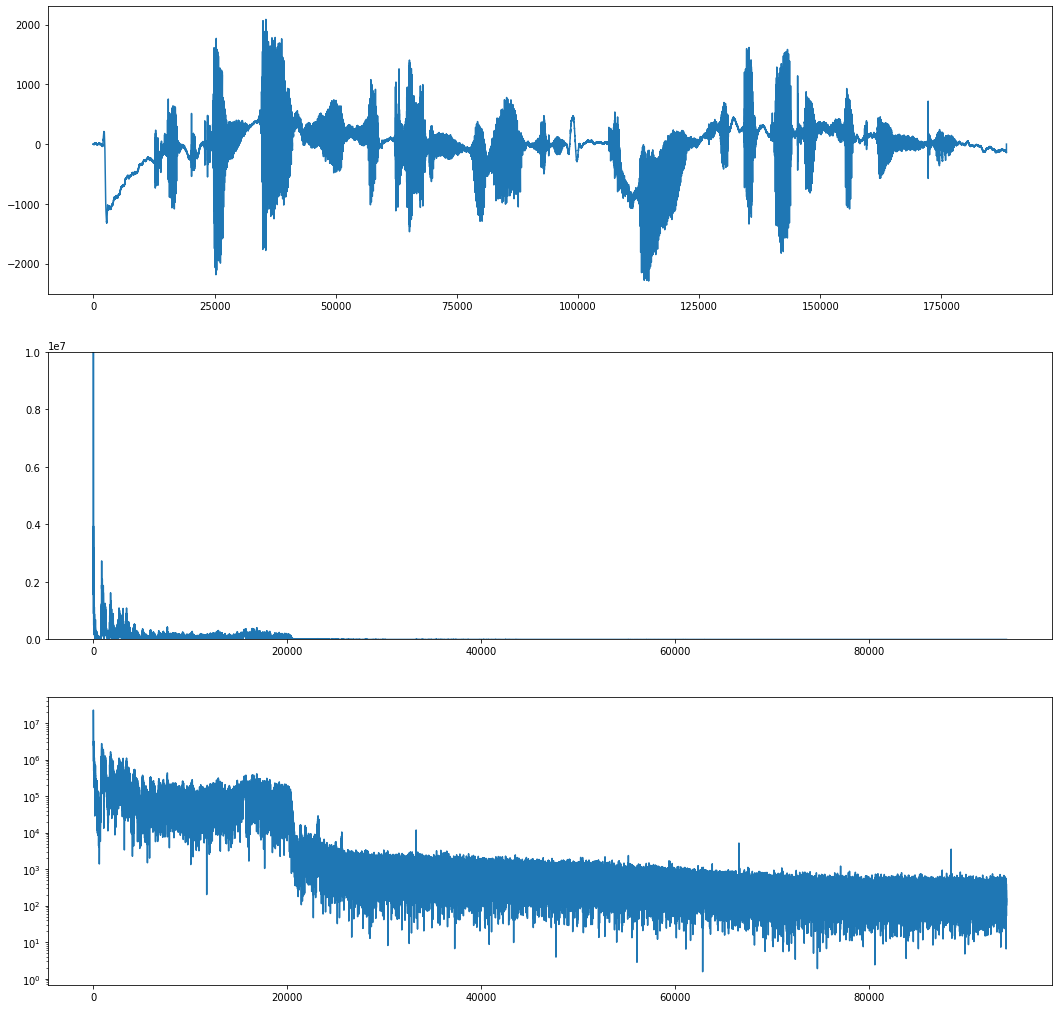


##############################   48   ##############################



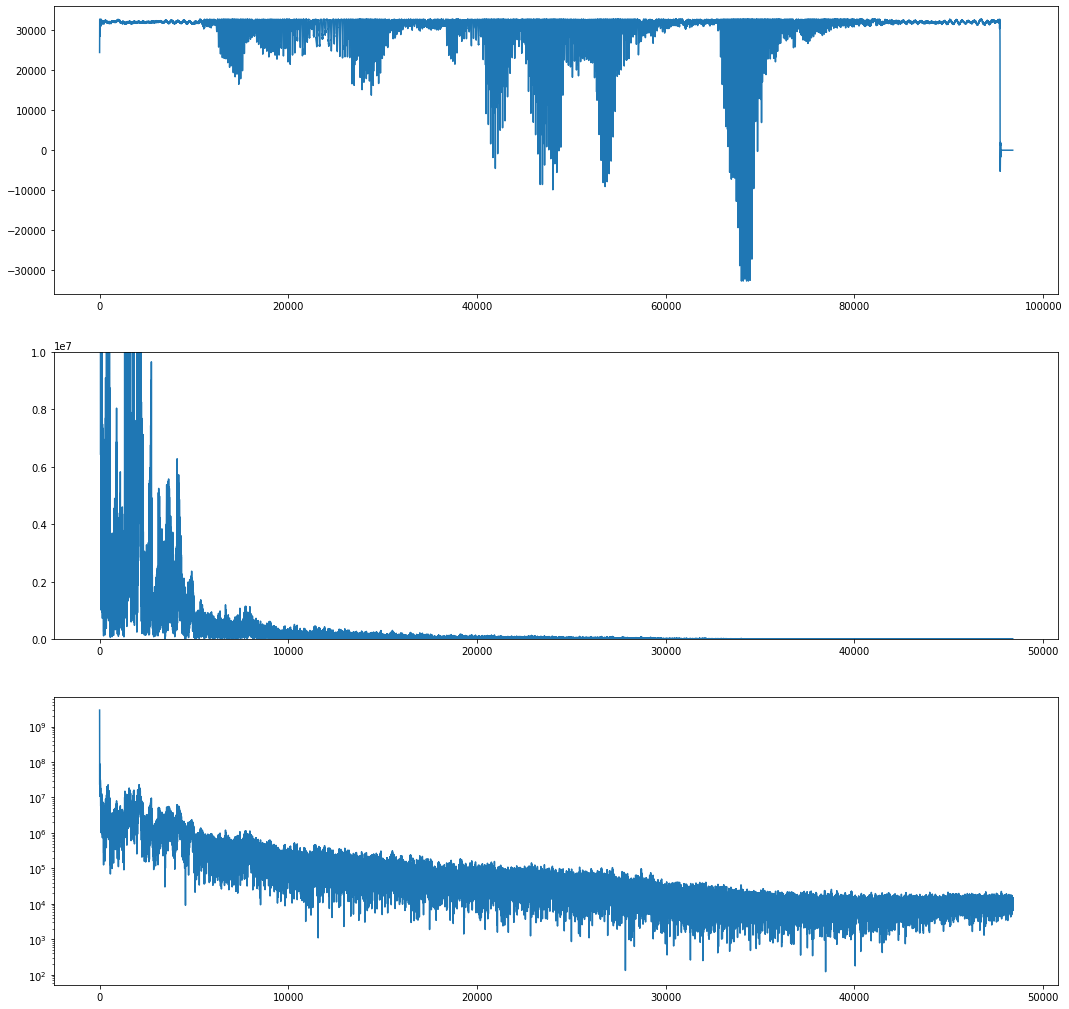


##############################   49   ##############################



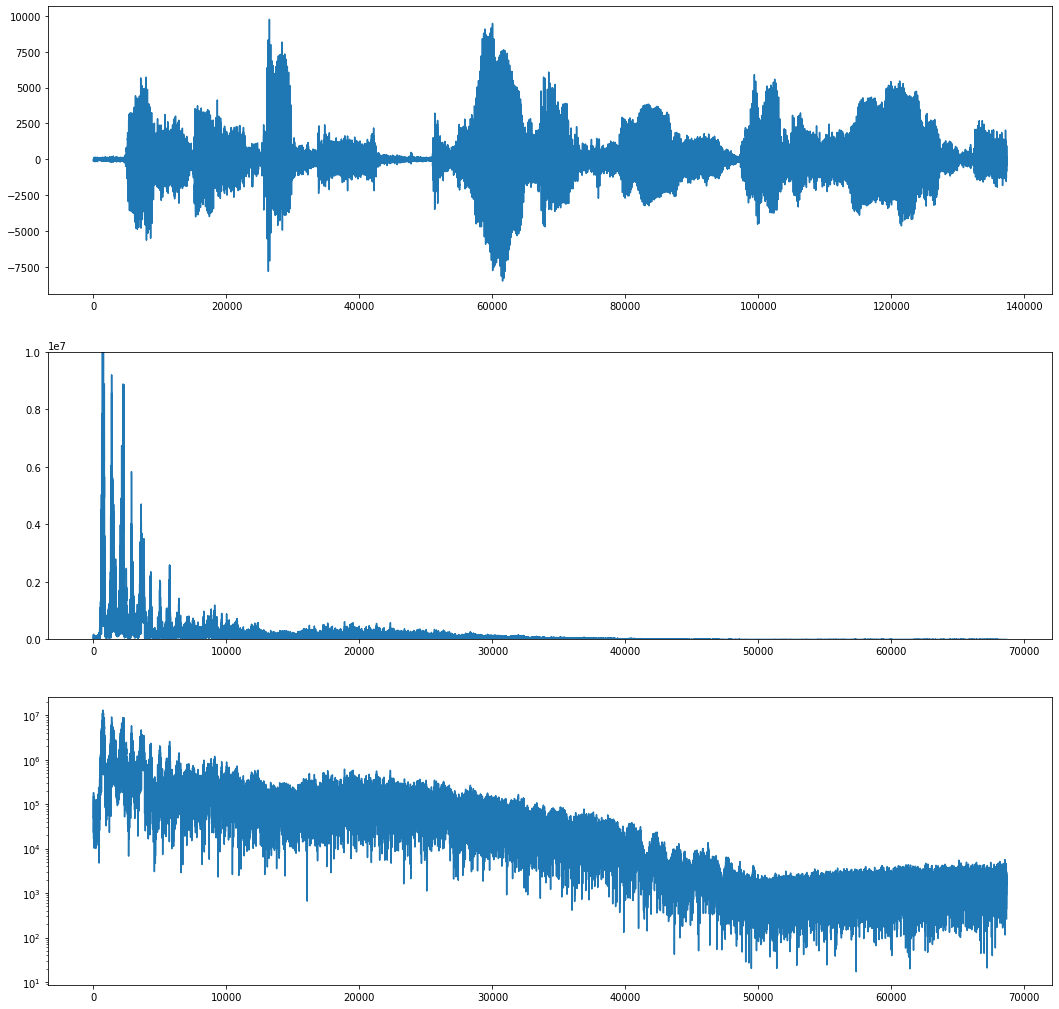


##############################   50   ##############################



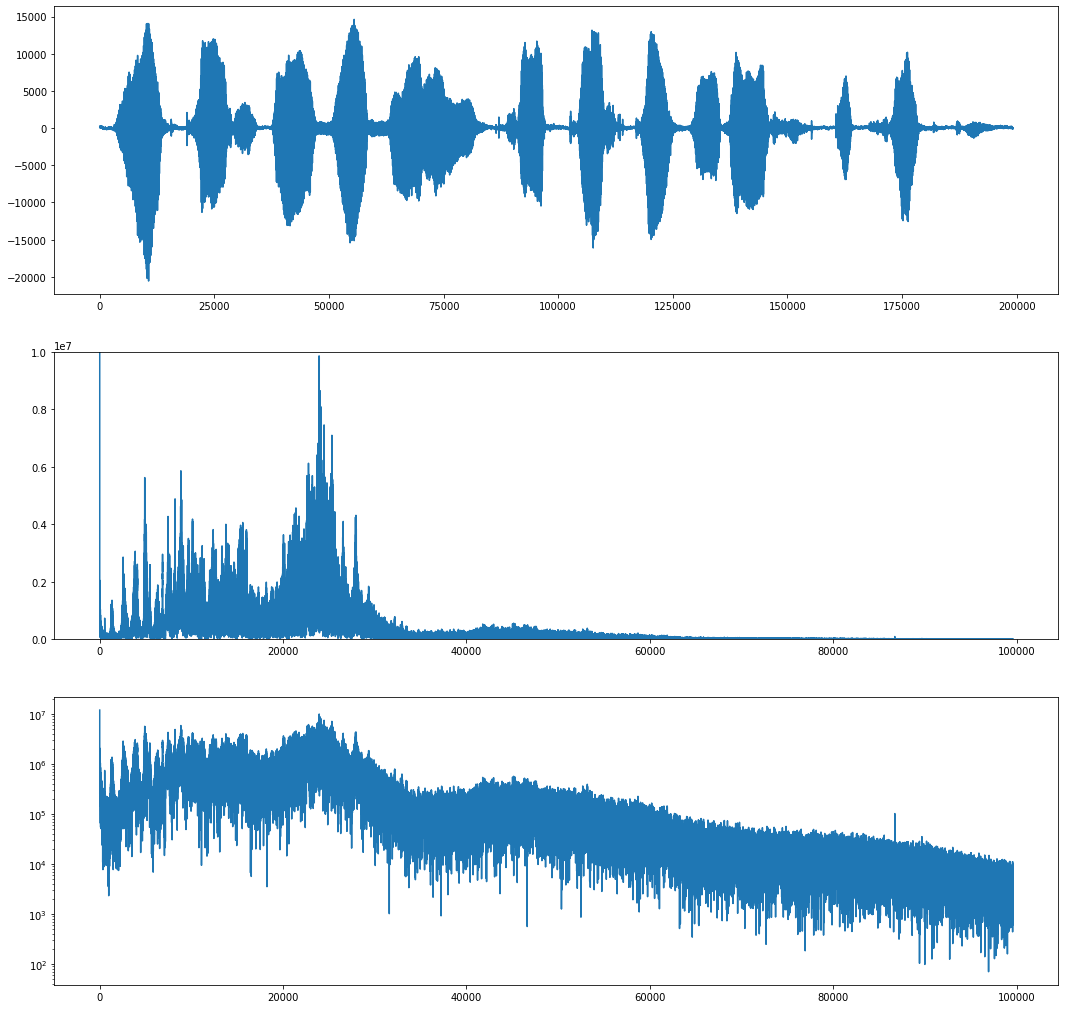


##############################   51   ##############################



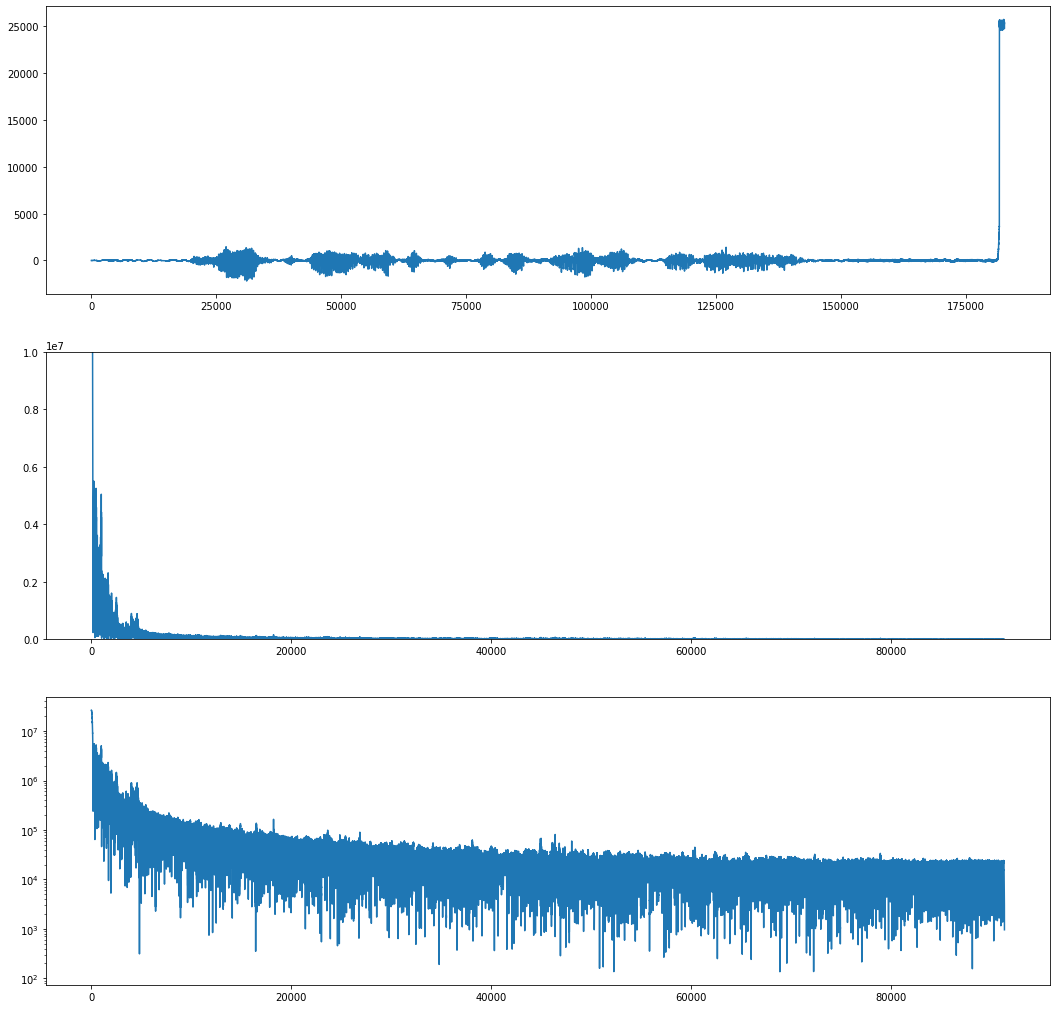


##############################   52   ##############################



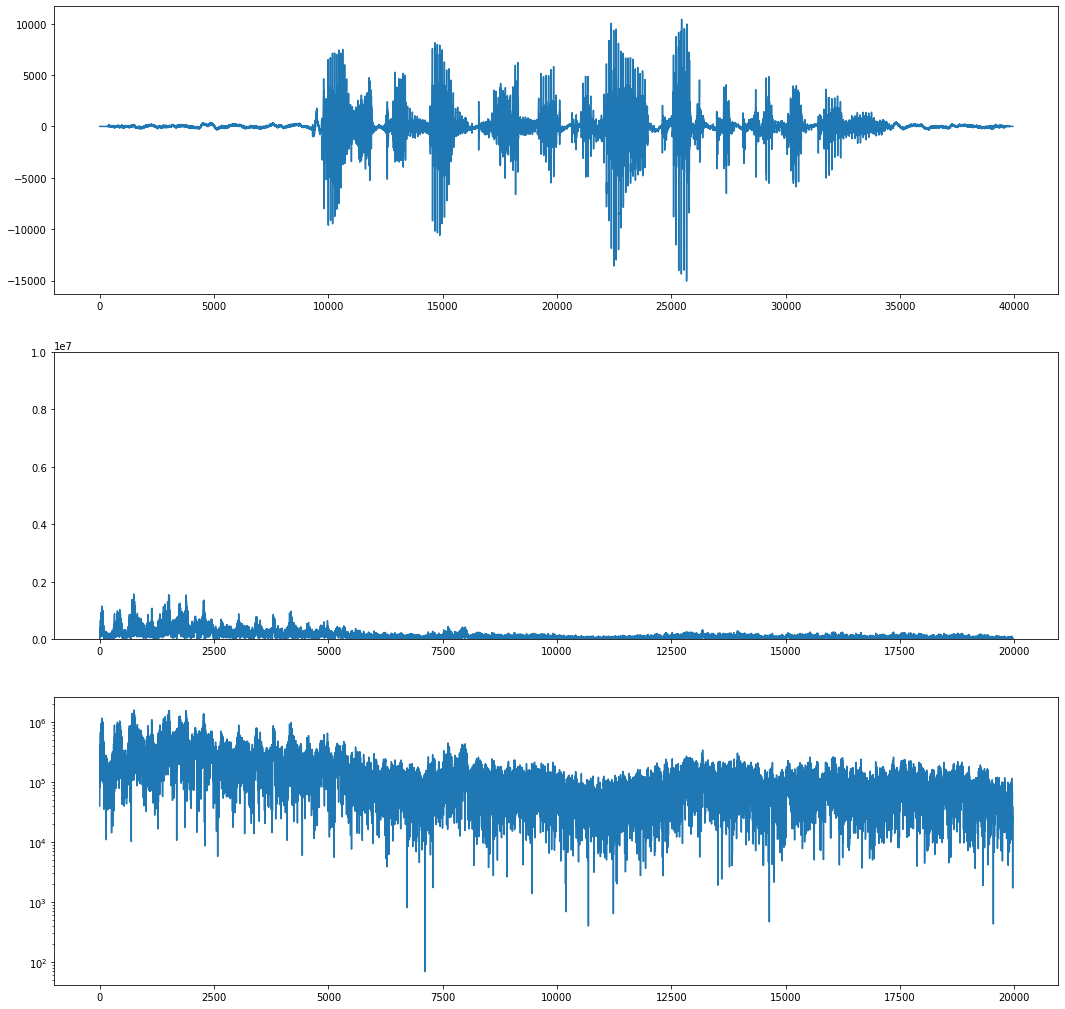


##############################   53   ##############################



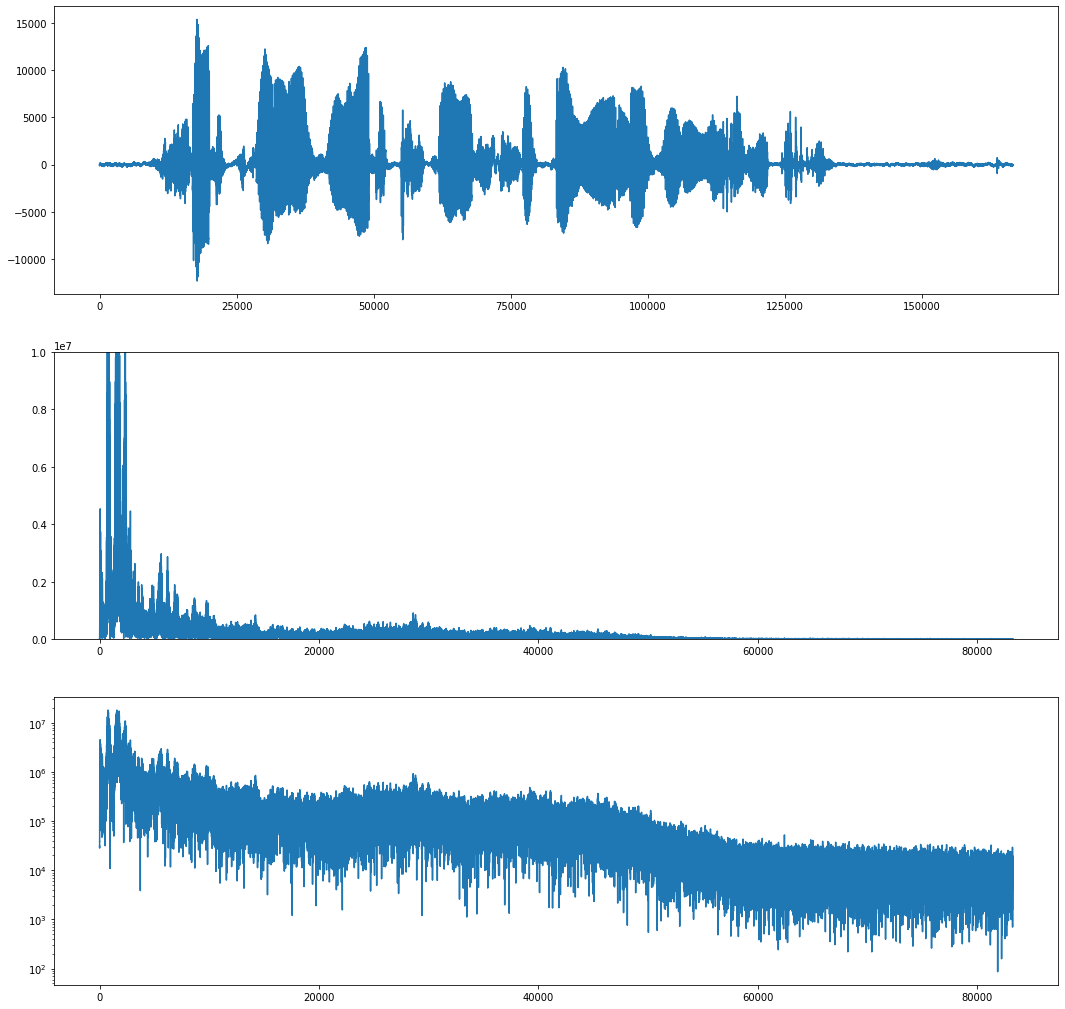


##############################   54   ##############################



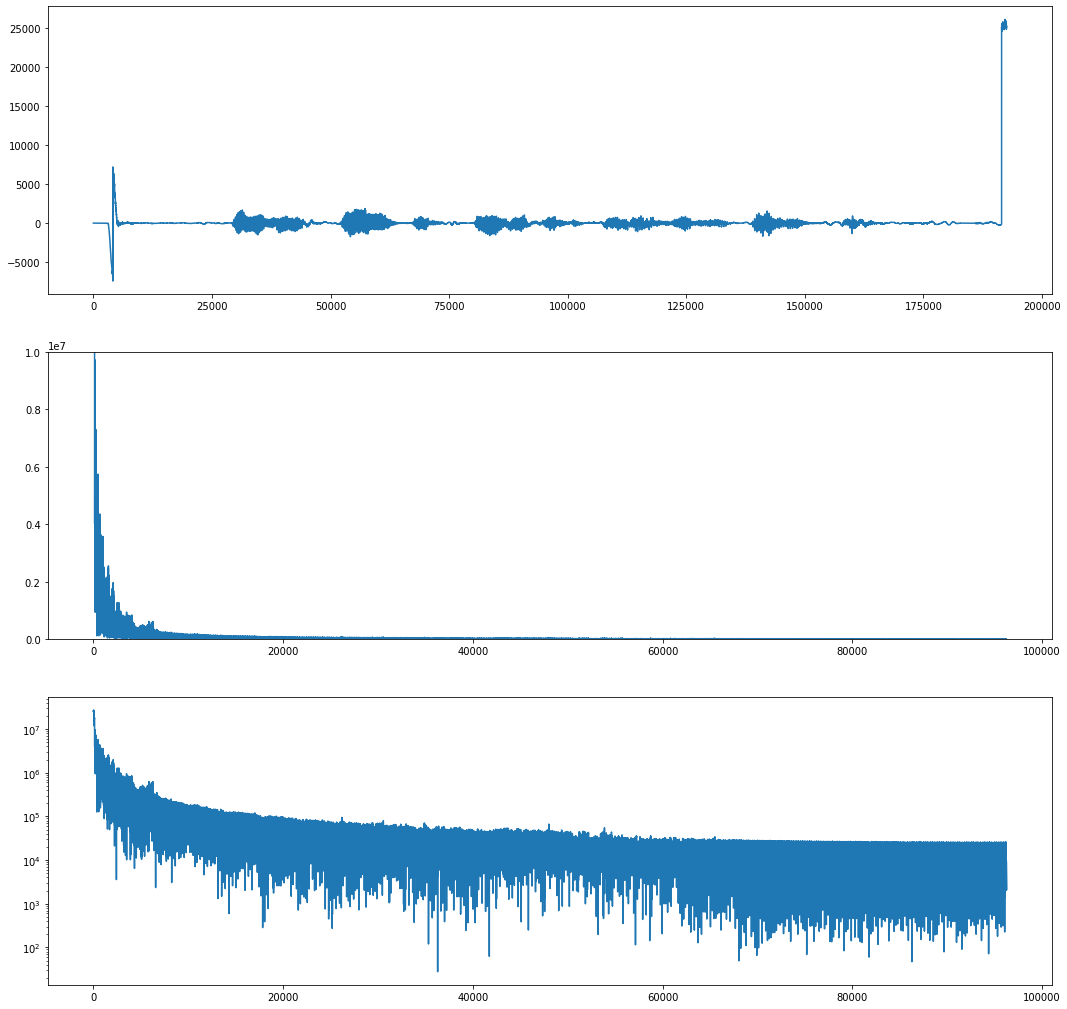


##############################   55   ##############################



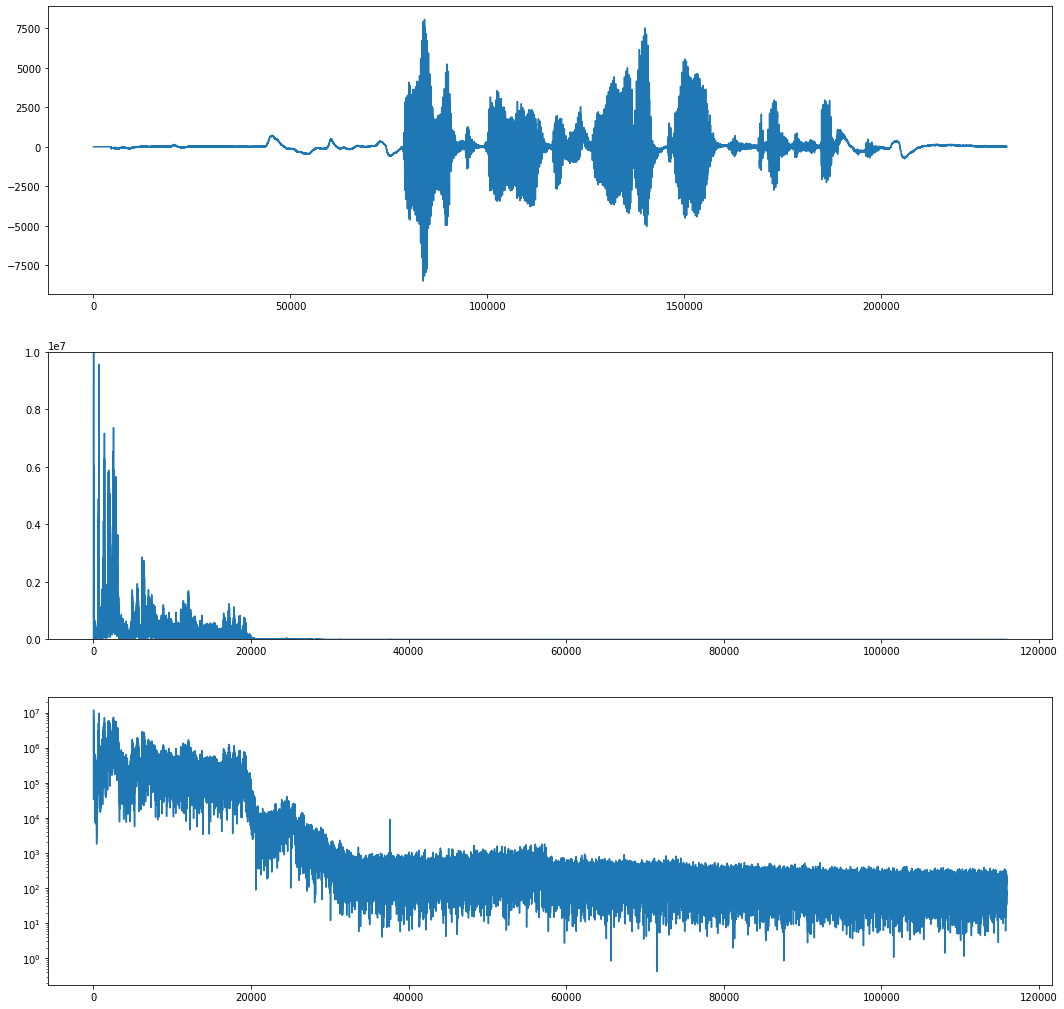


##############################   56   ##############################



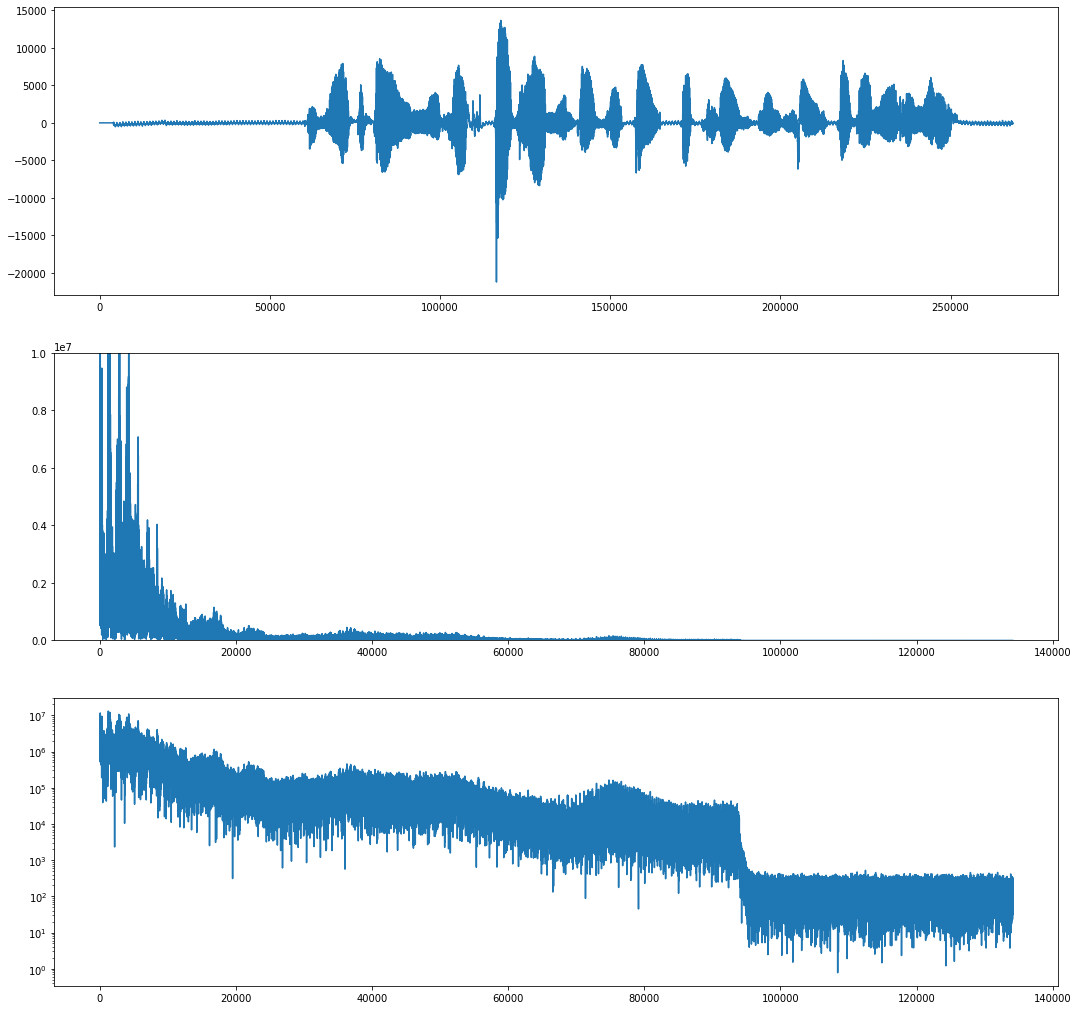


##############################   57   ##############################



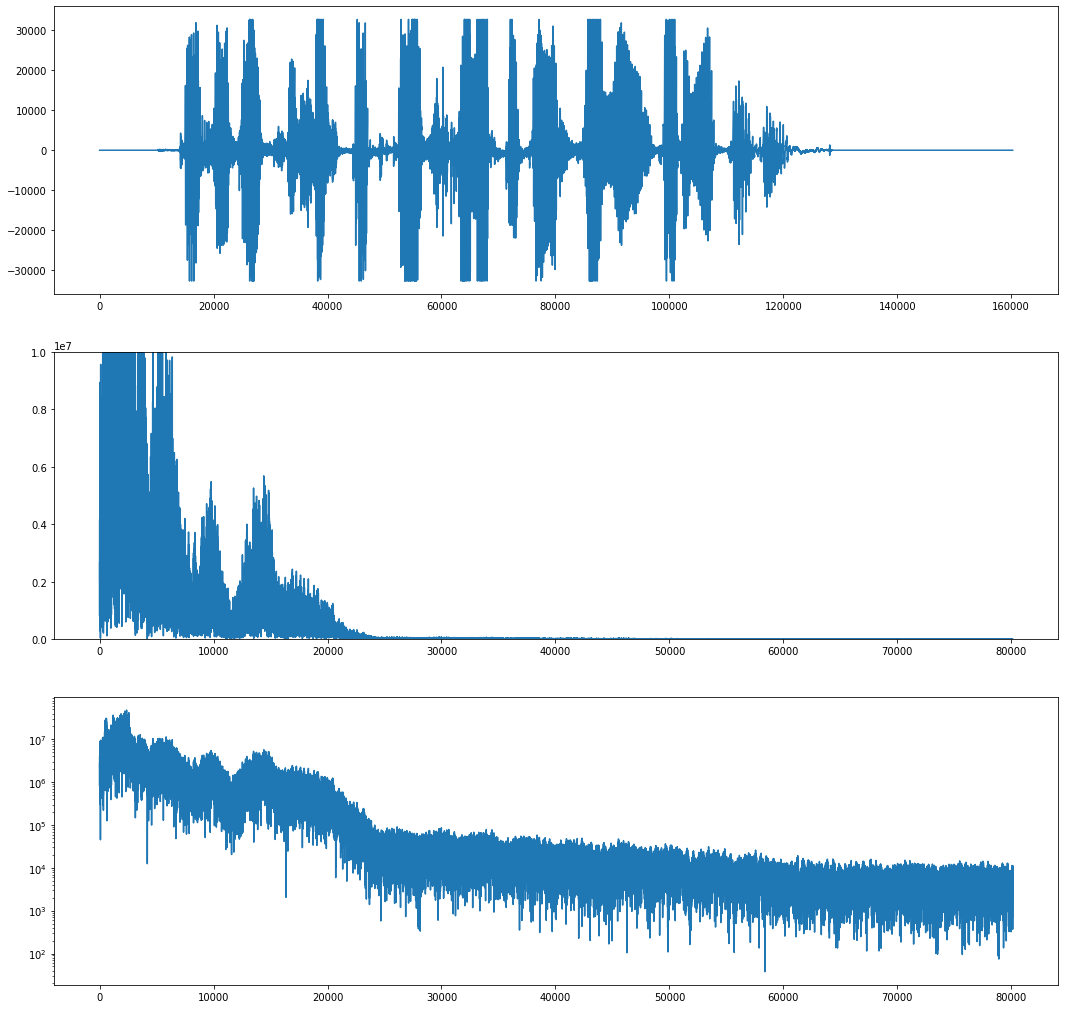


##############################   58   ##############################



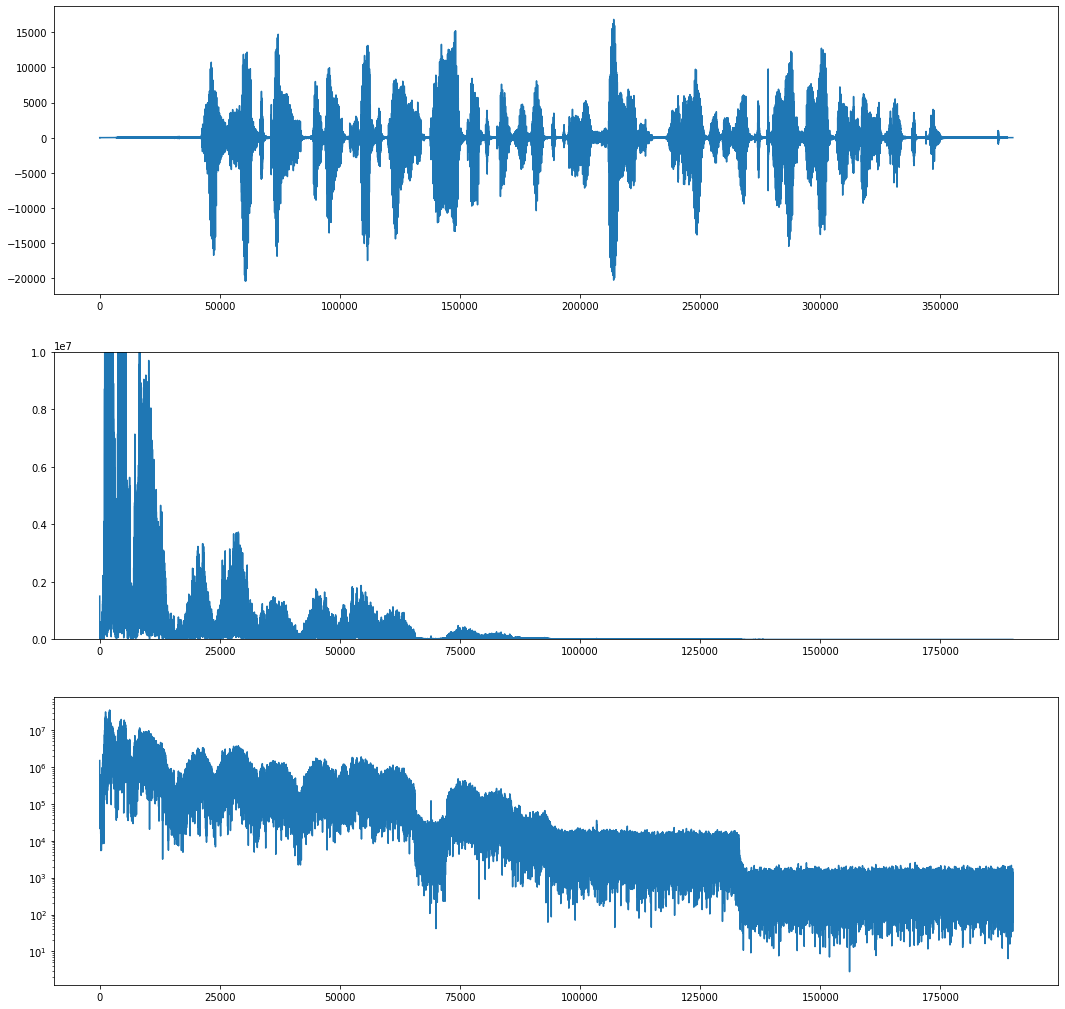


##############################   59   ##############################



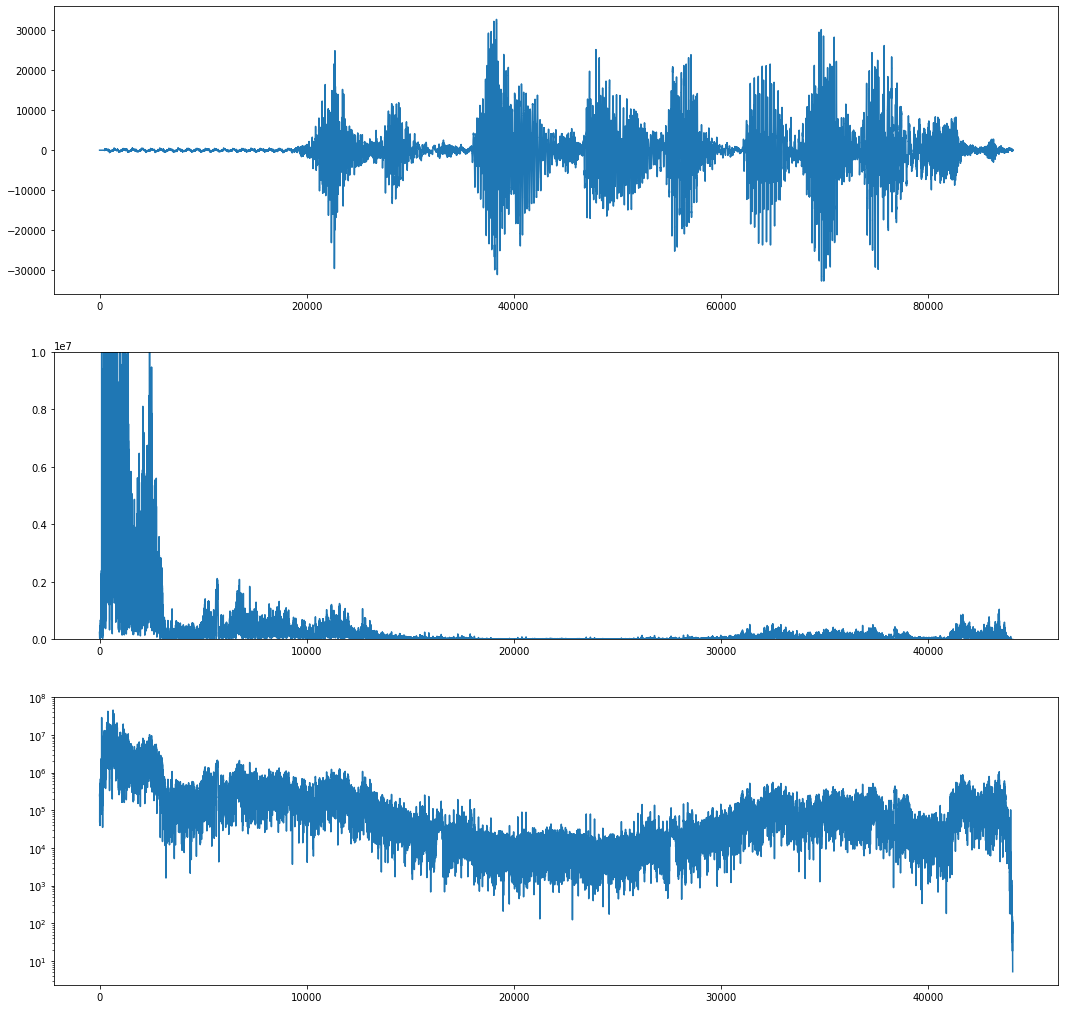


##############################   60   ##############################



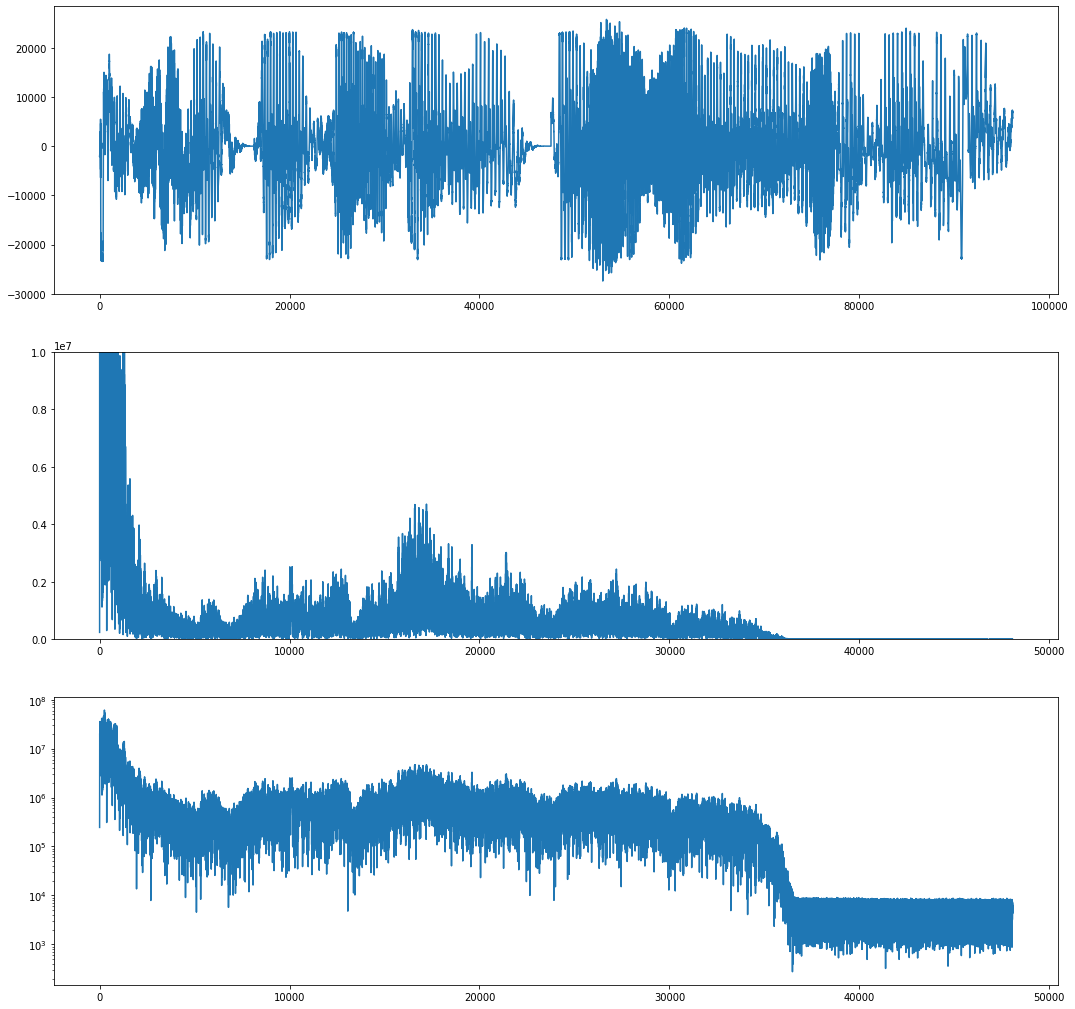


##############################   61   ##############################



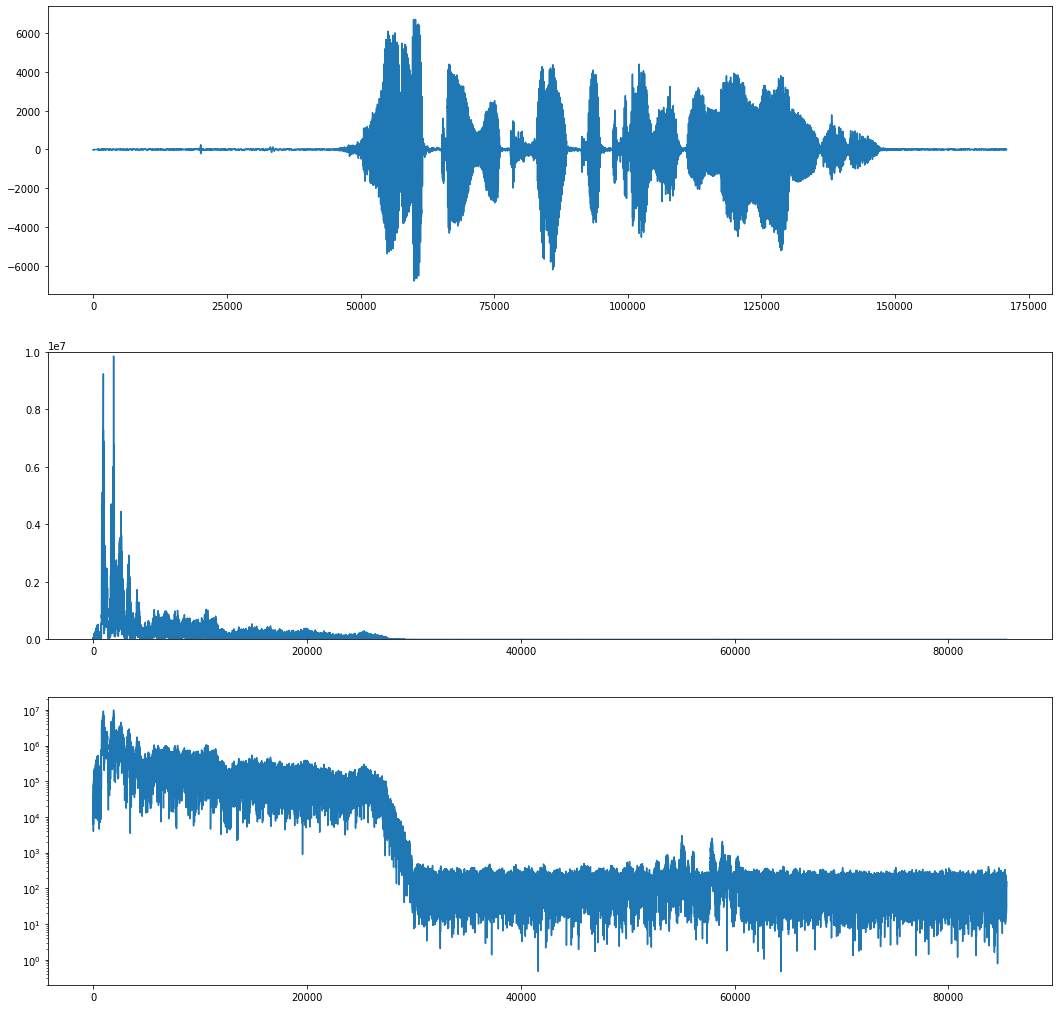


##############################   62   ##############################



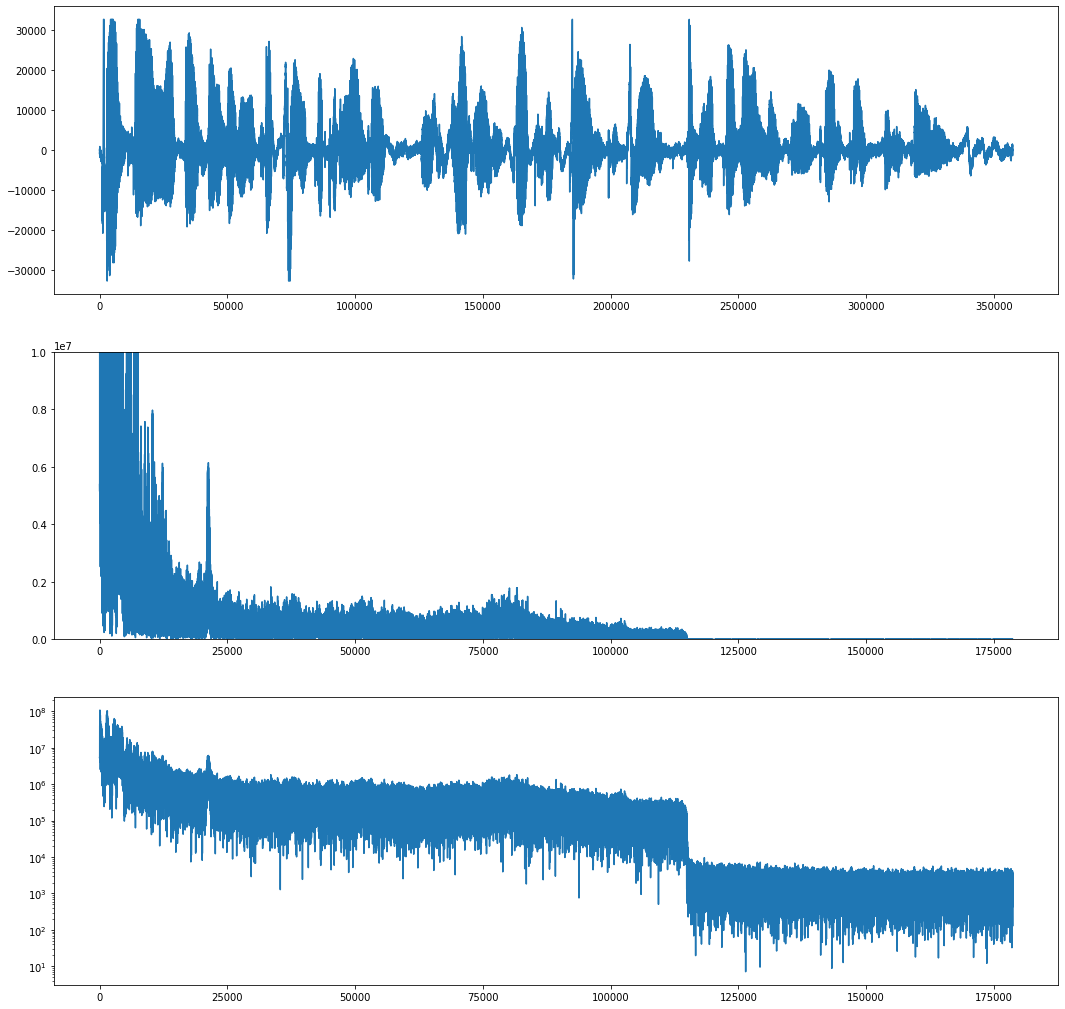


##############################   63   ##############################



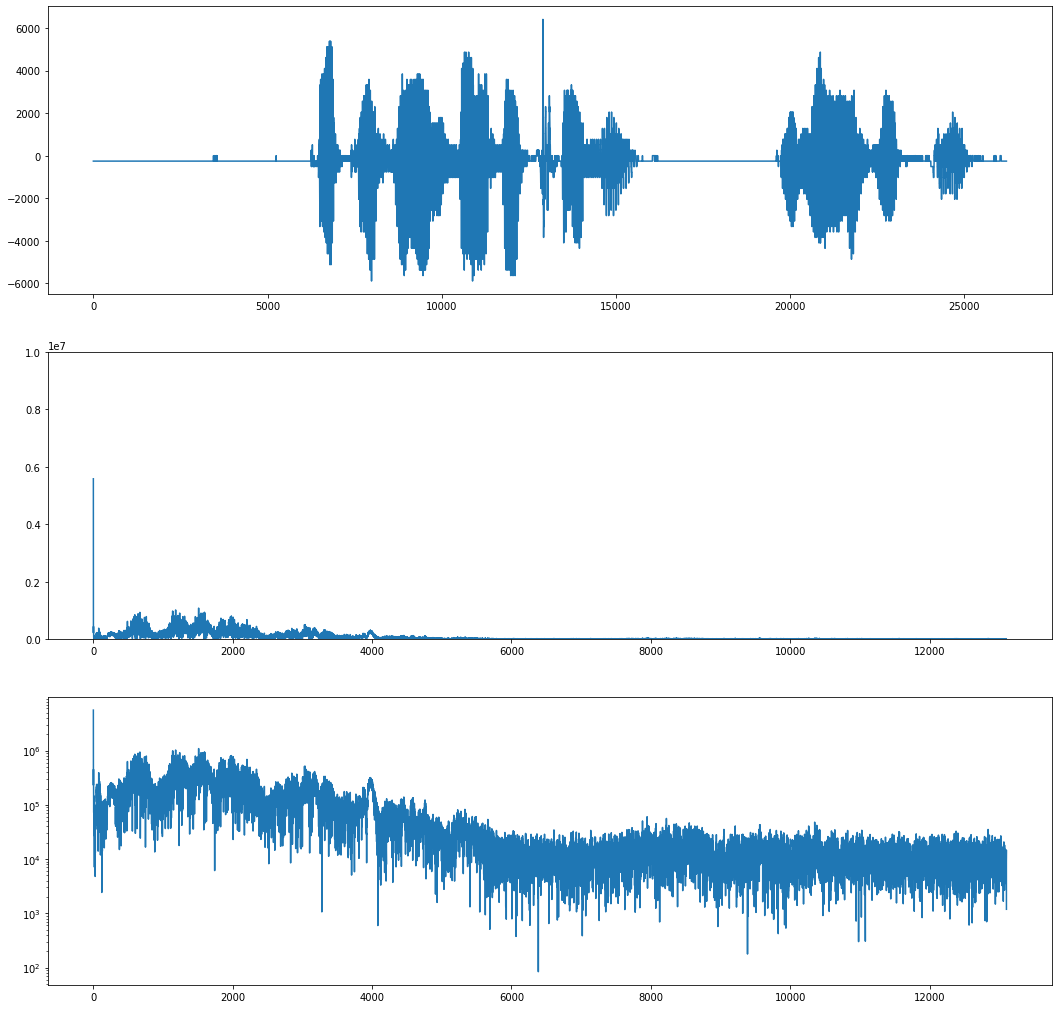


##############################   64   ##############################



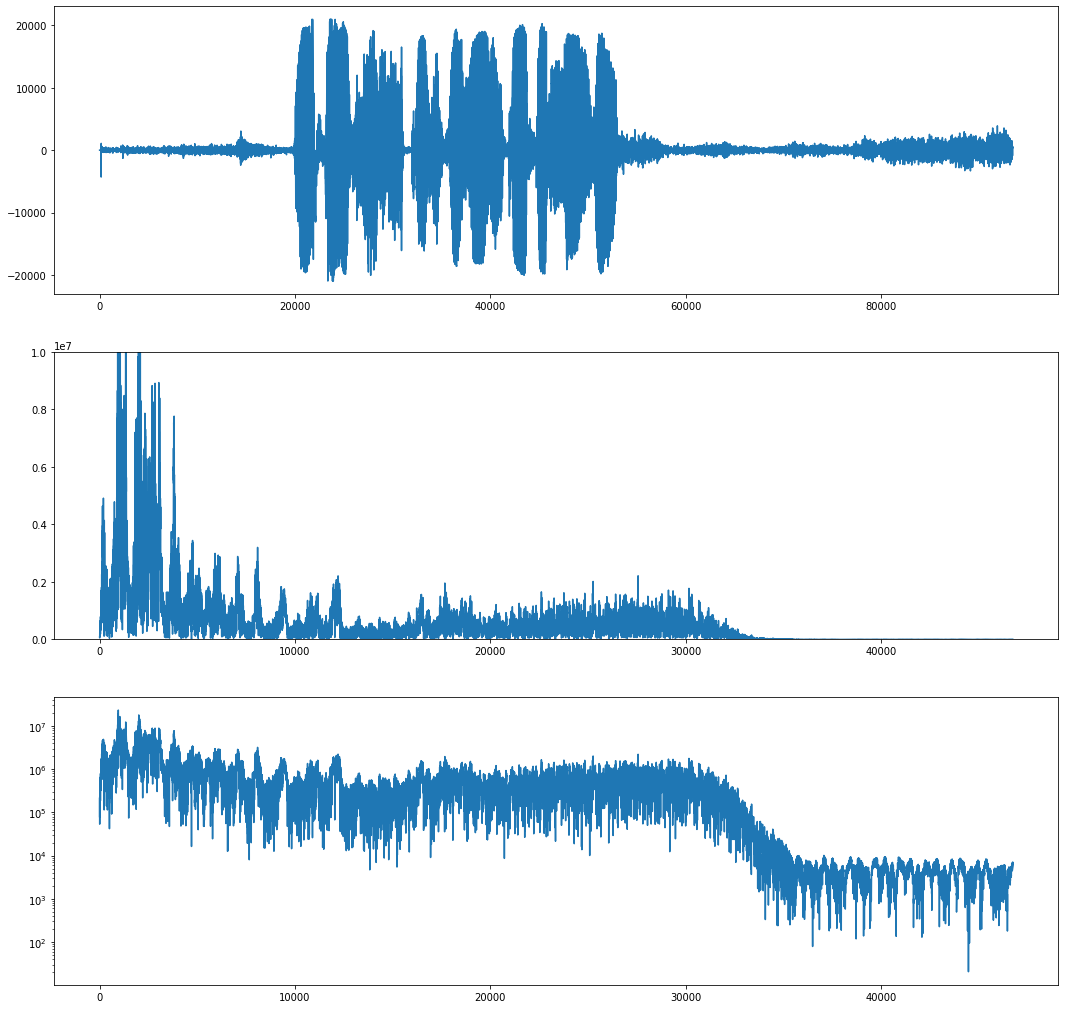


##############################   65   ##############################



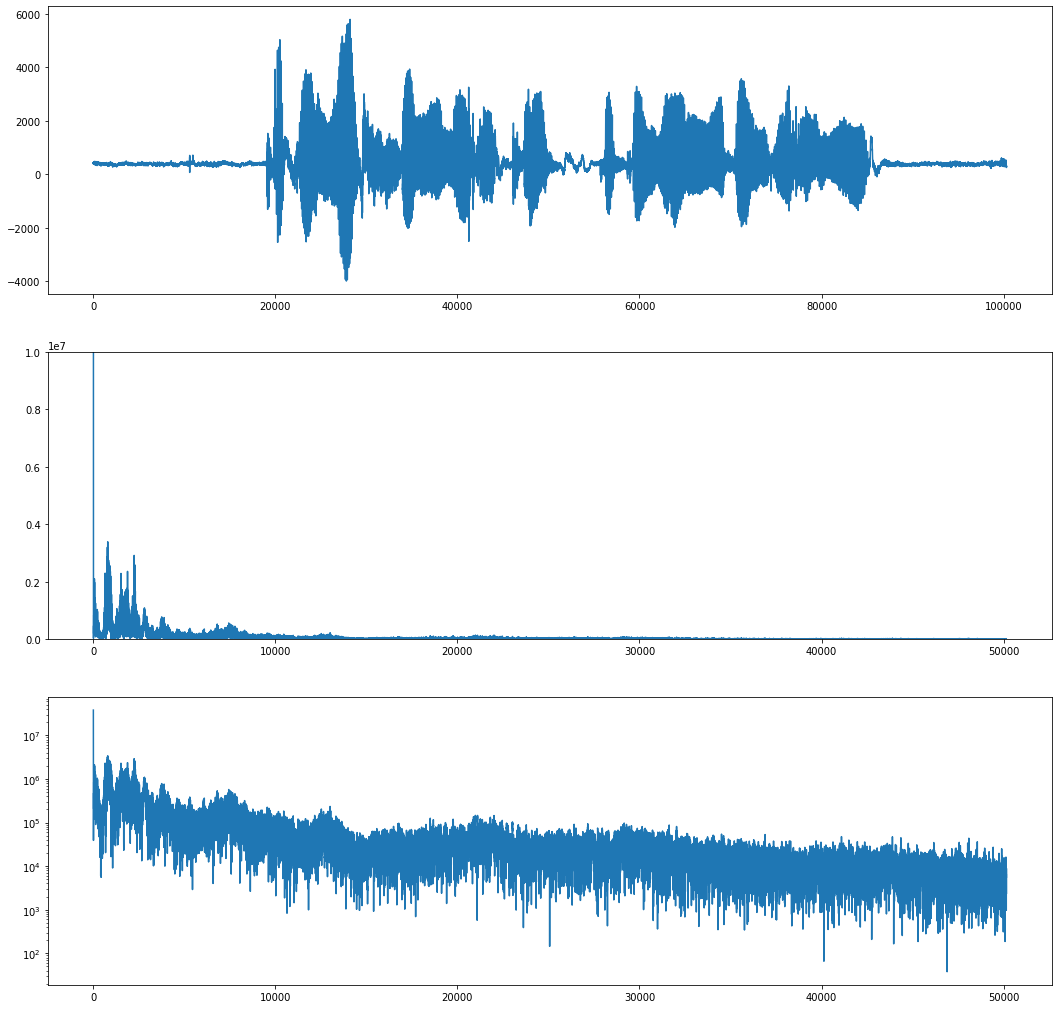


##############################   66   ##############################



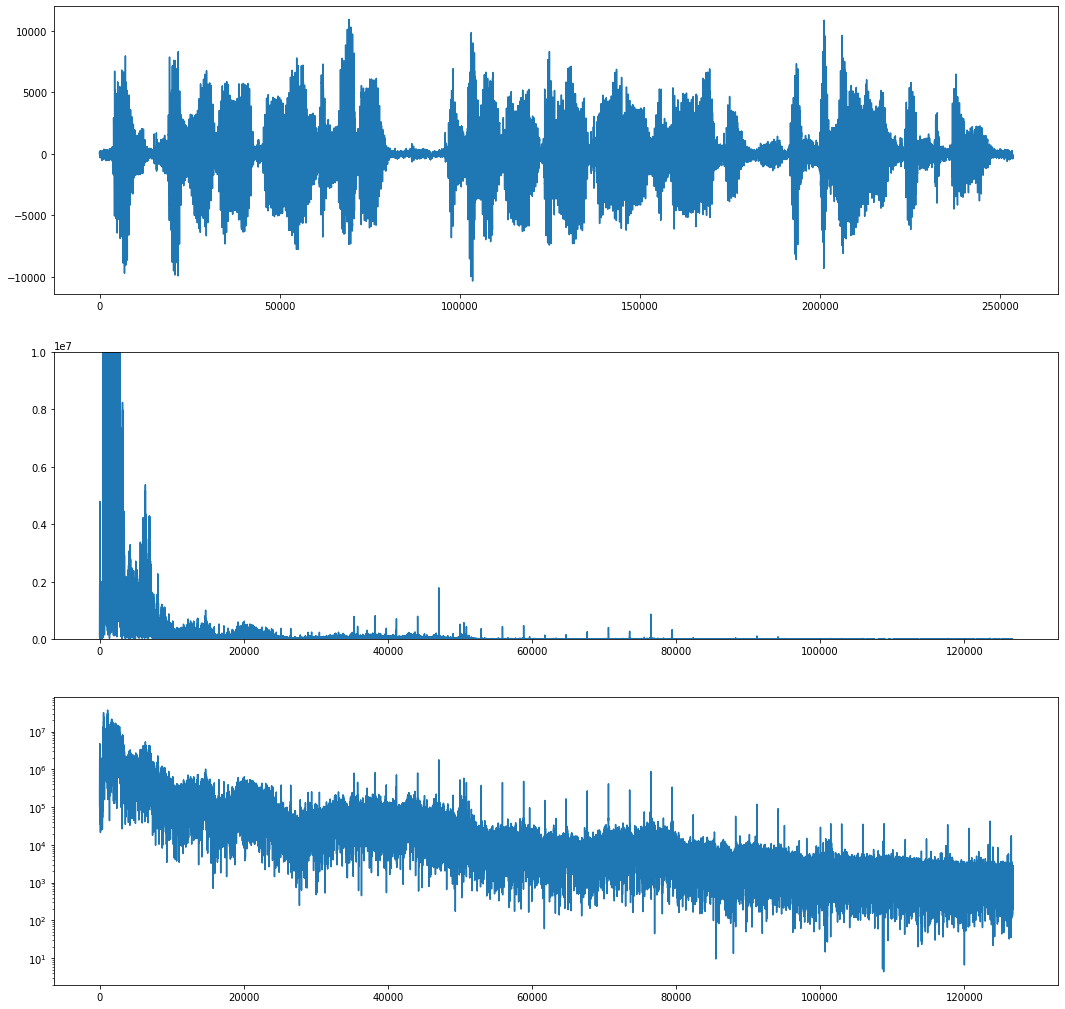


##############################   67   ##############################



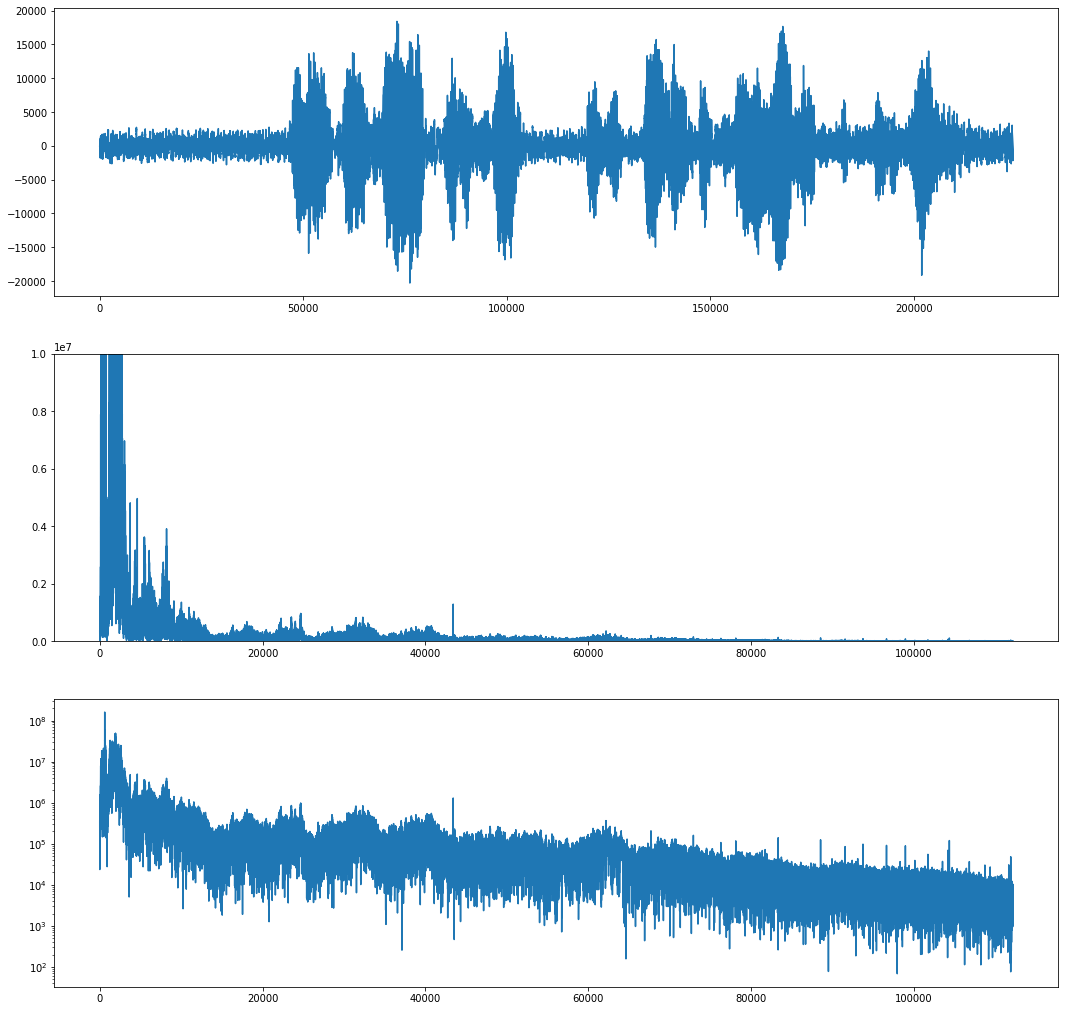


##############################   68   ##############################



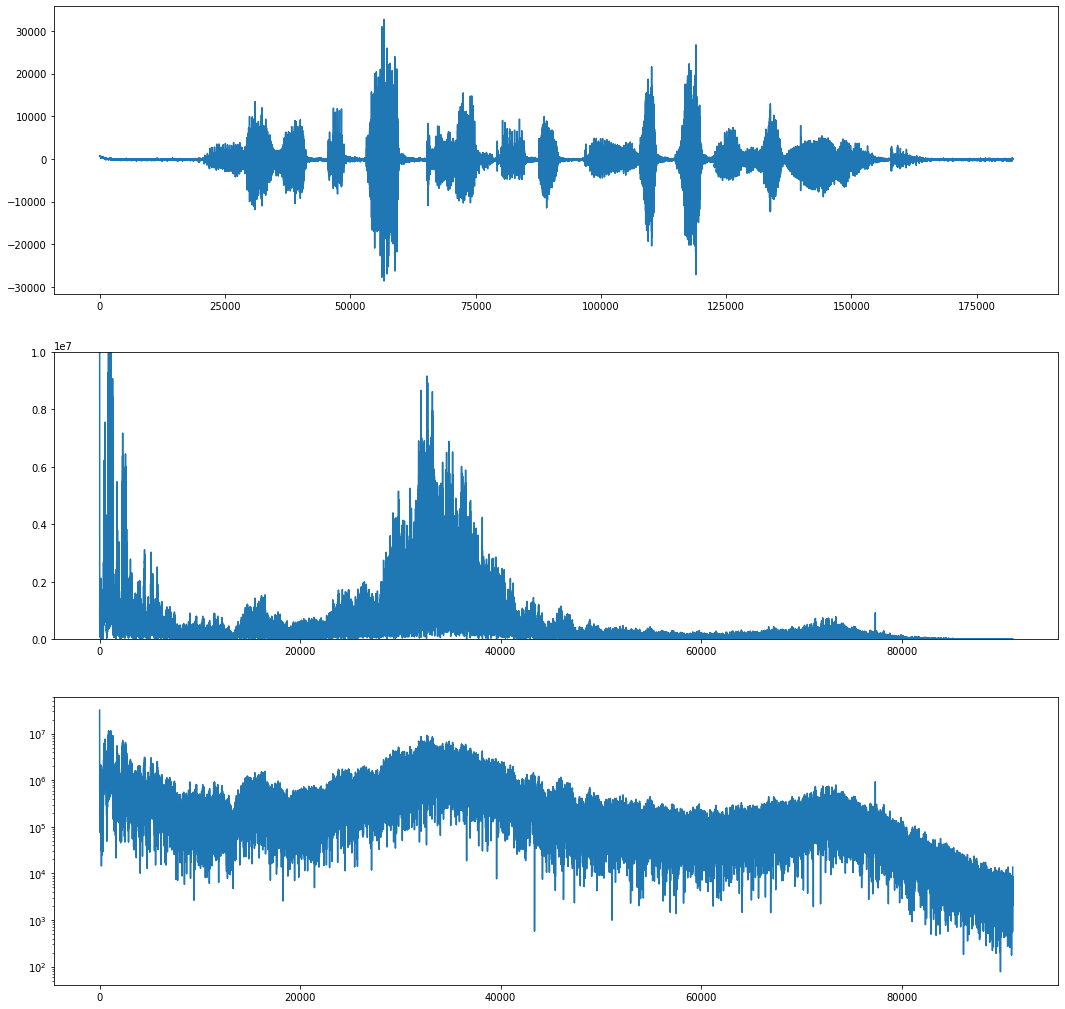


##############################   69   ##############################



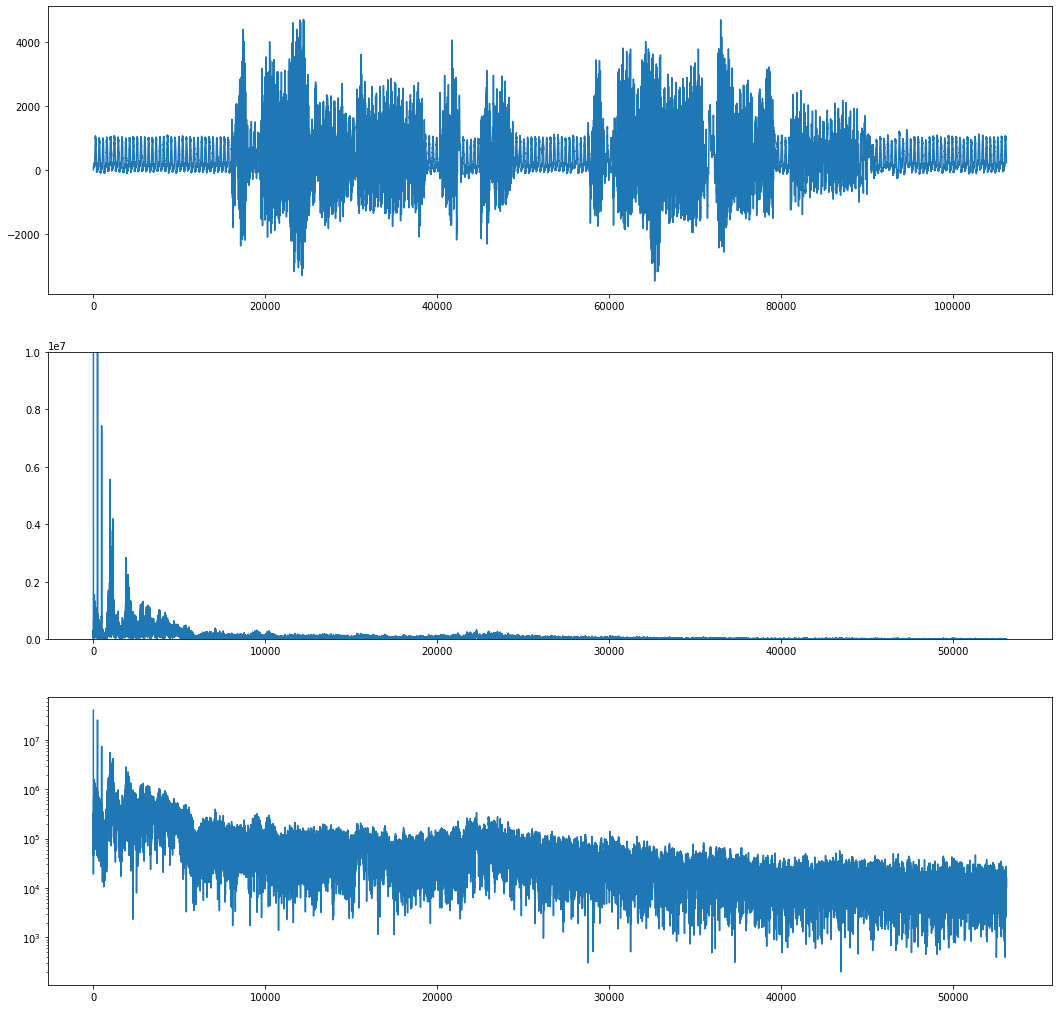


##############################   70   ##############################



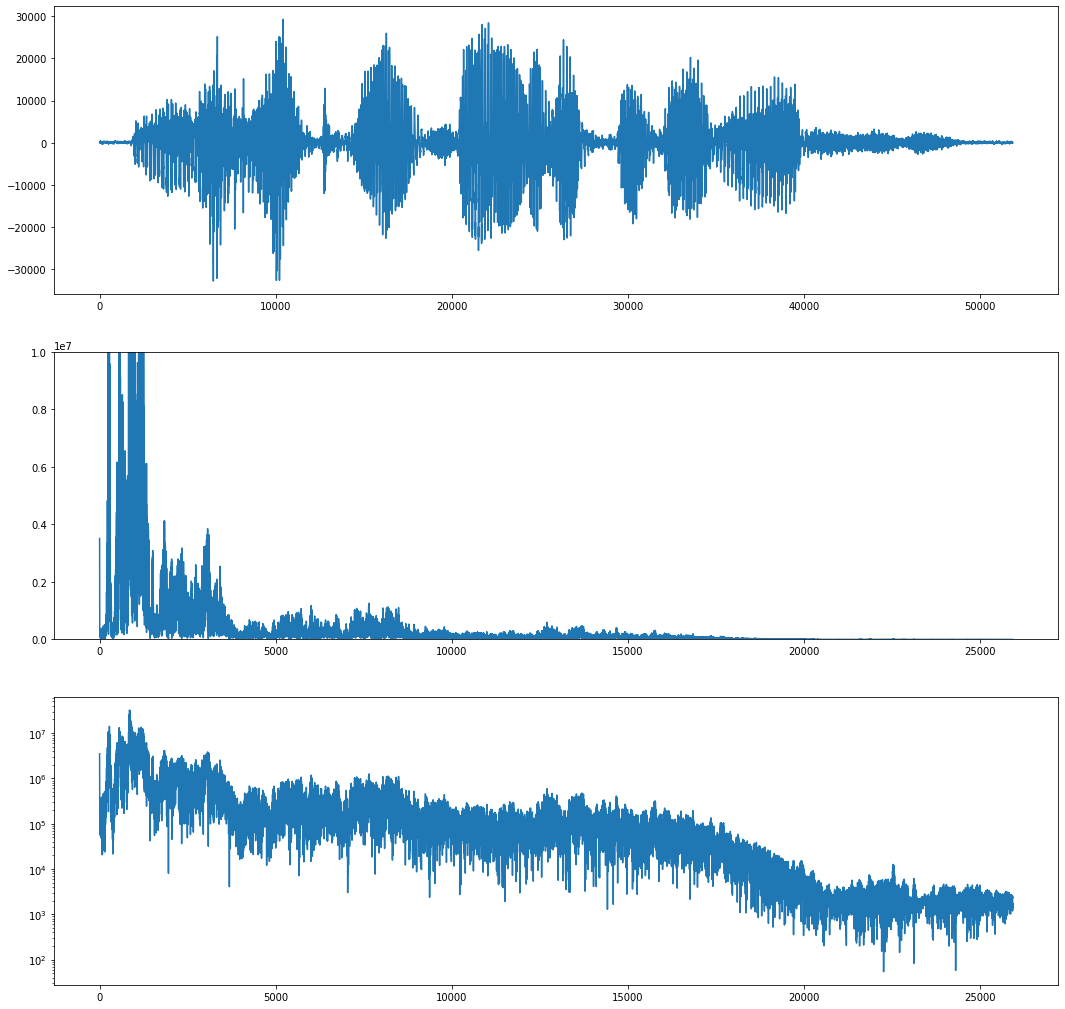


##############################   71   ##############################



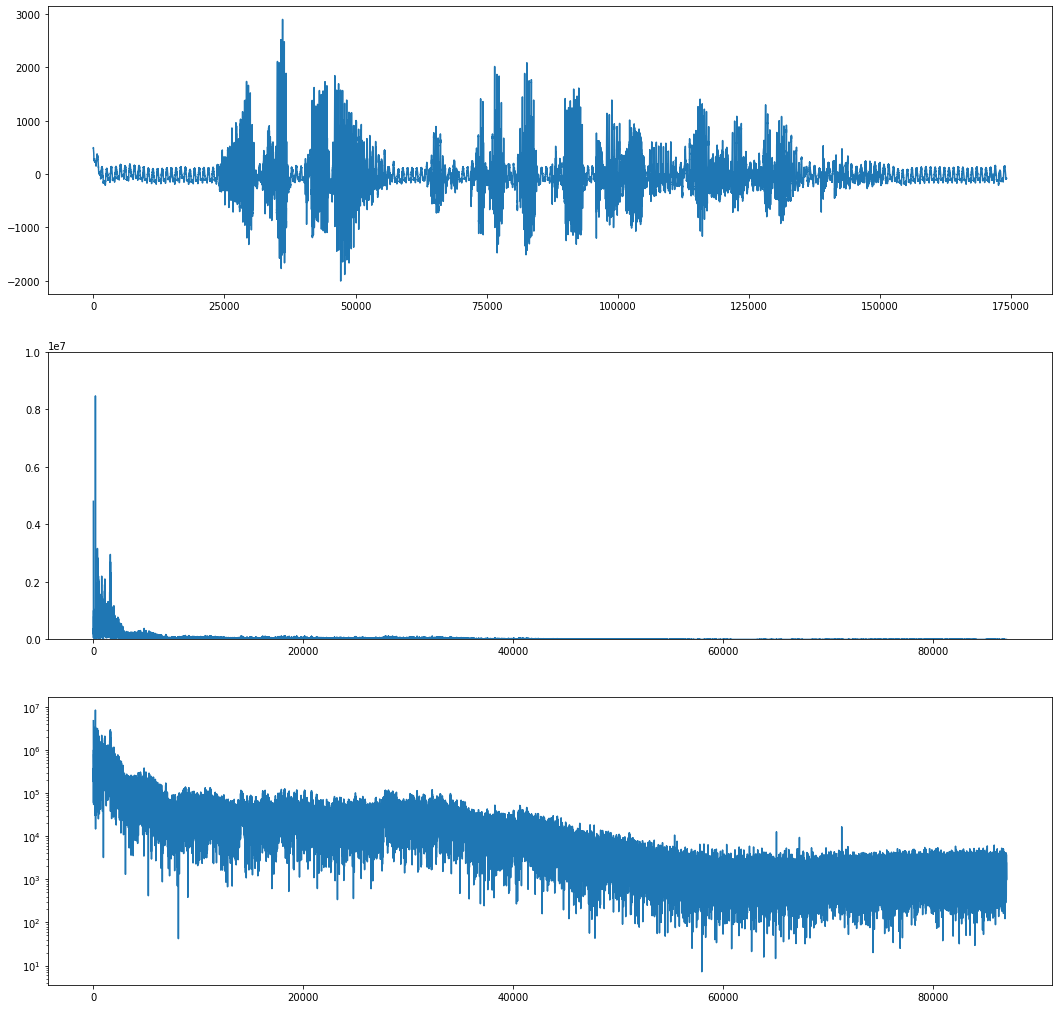


##############################   72   ##############################



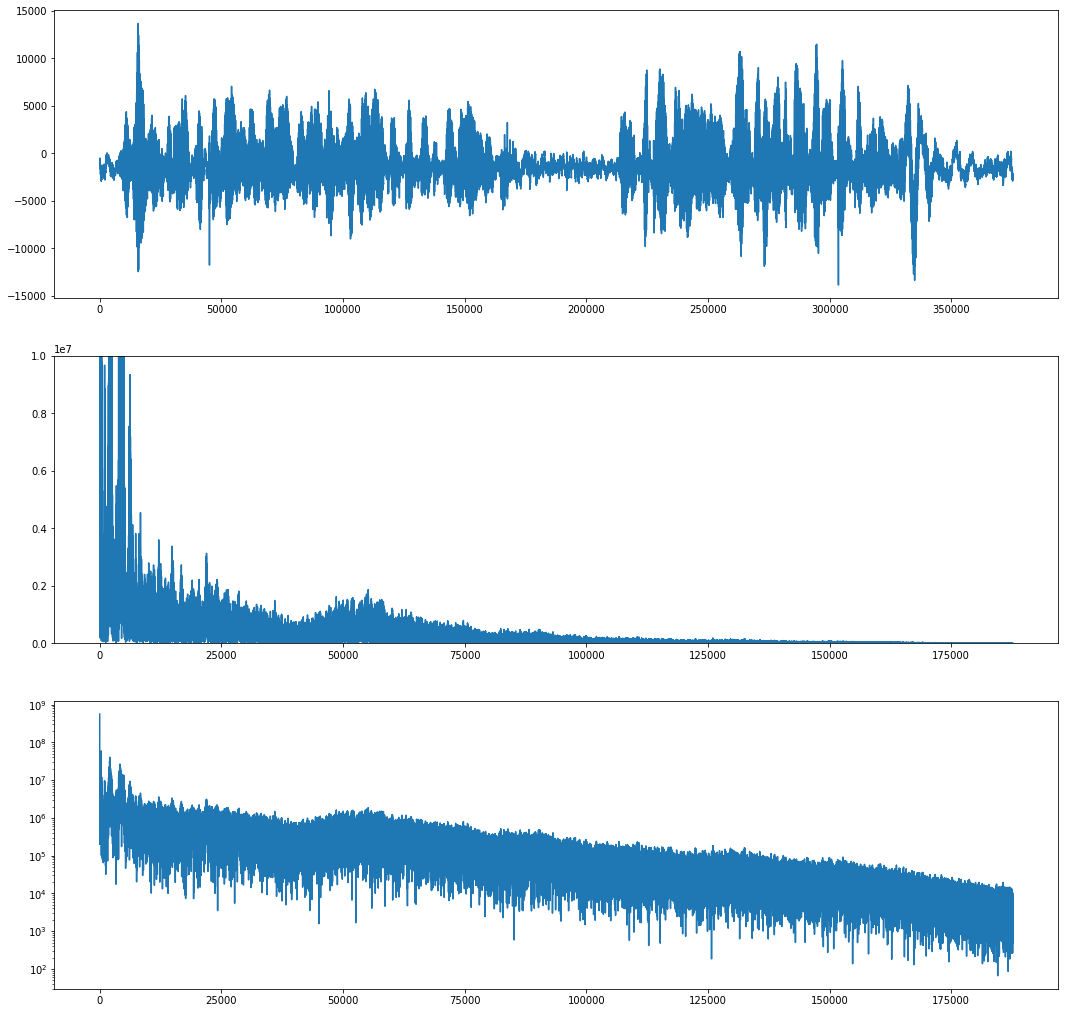


##############################   73   ##############################



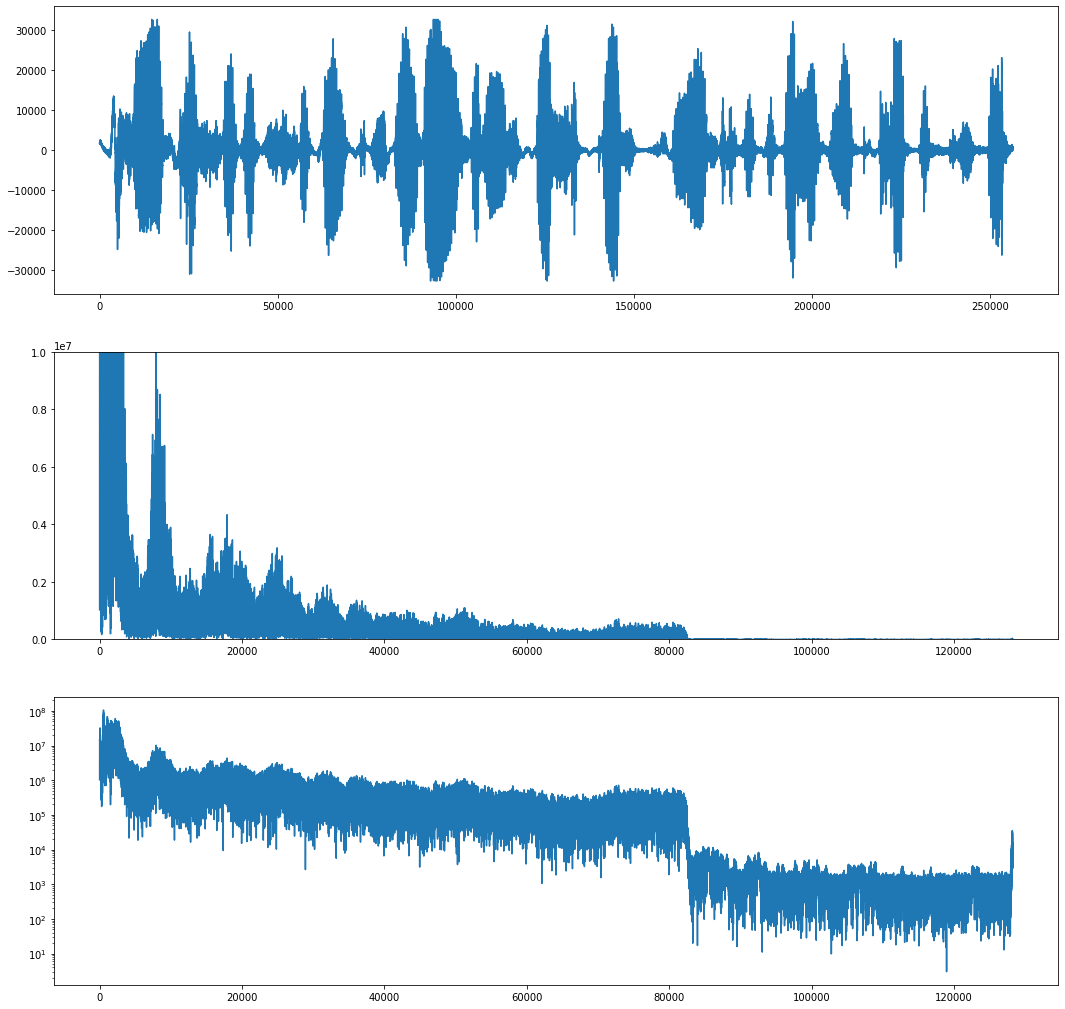


##############################   74   ##############################



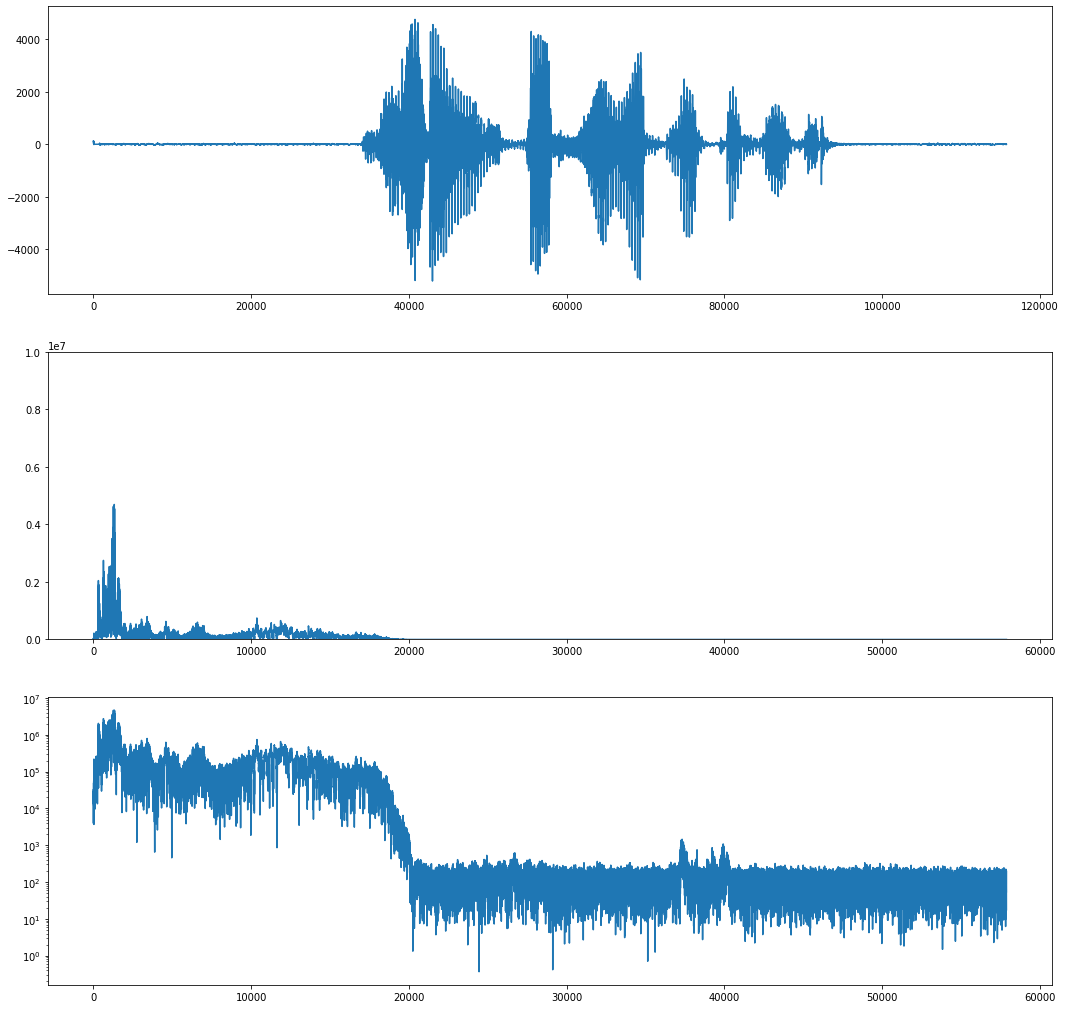


##############################   75   ##############################



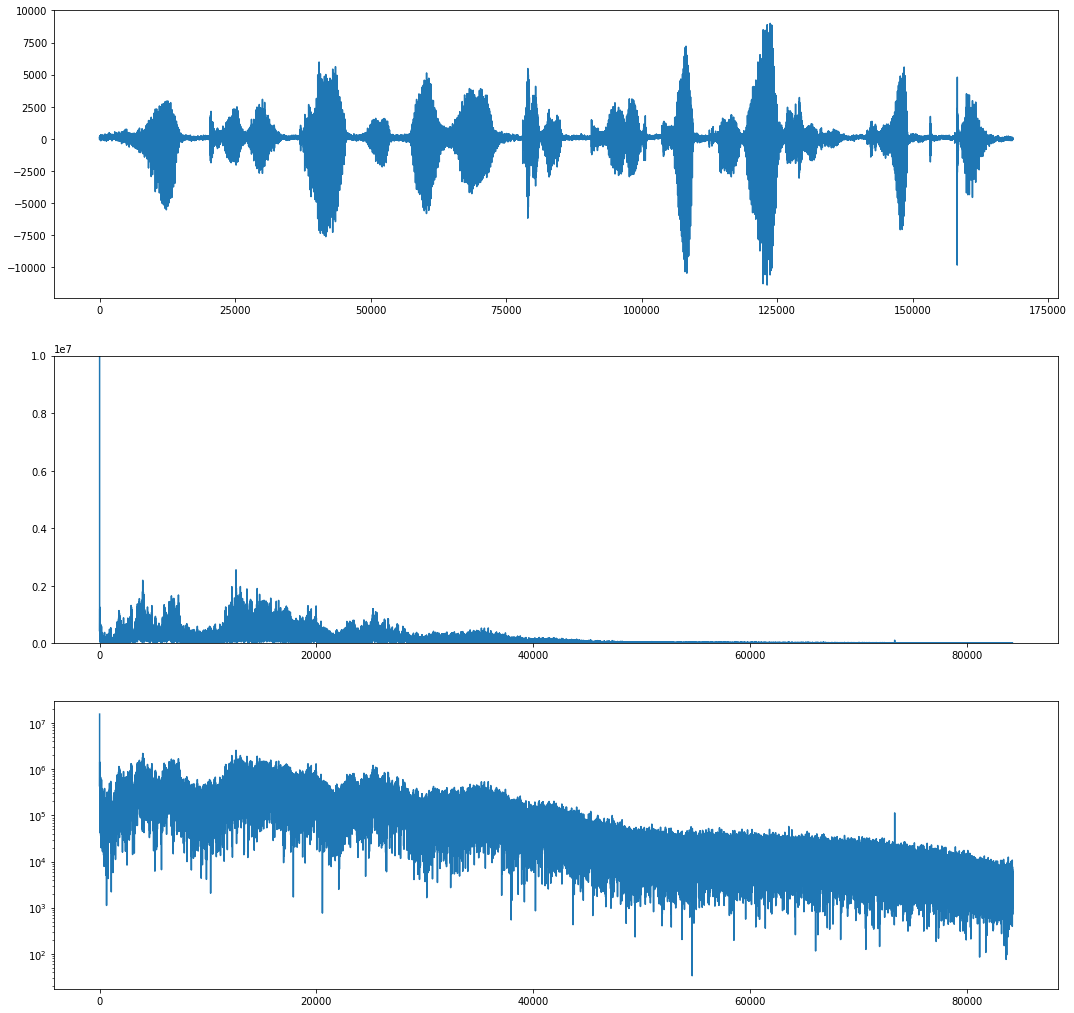


##############################   76   ##############################



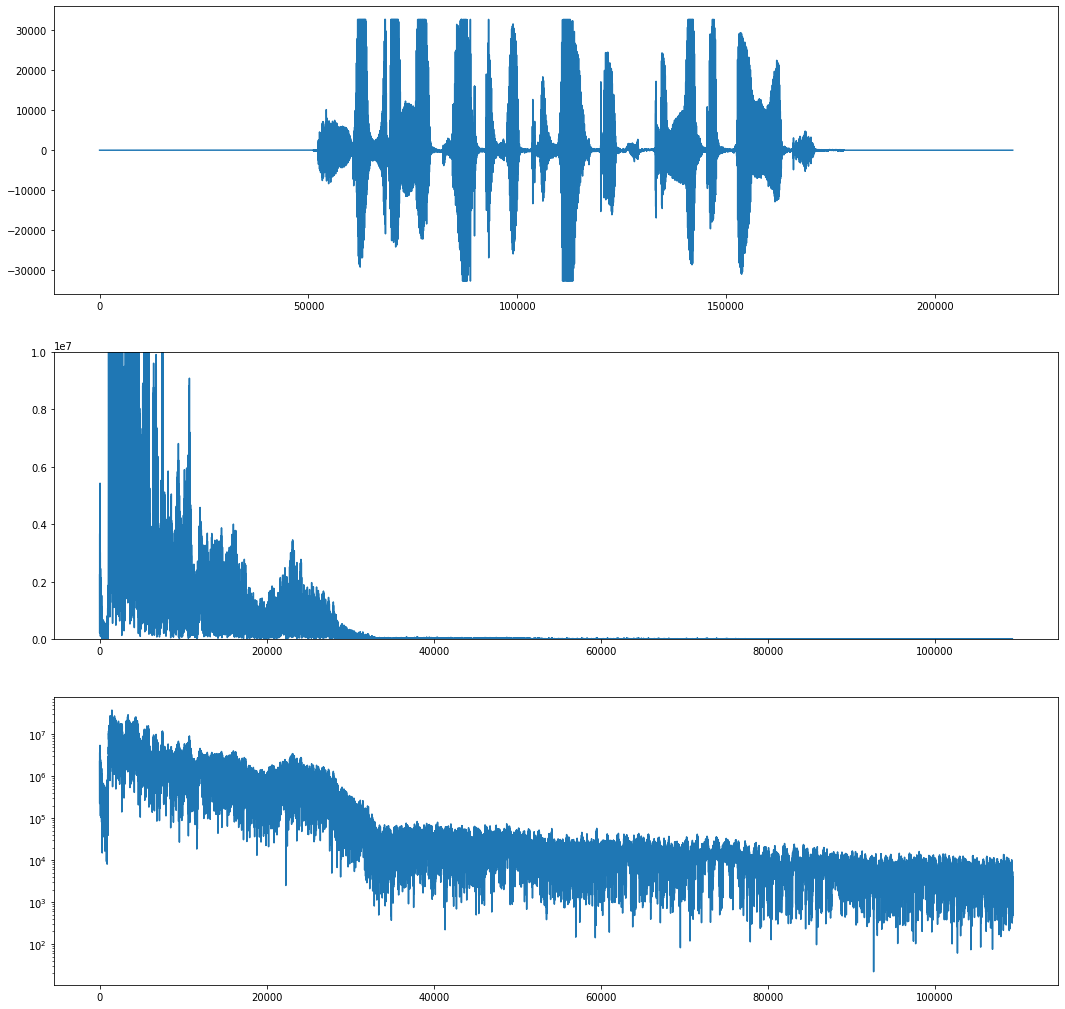


##############################   77   ##############################



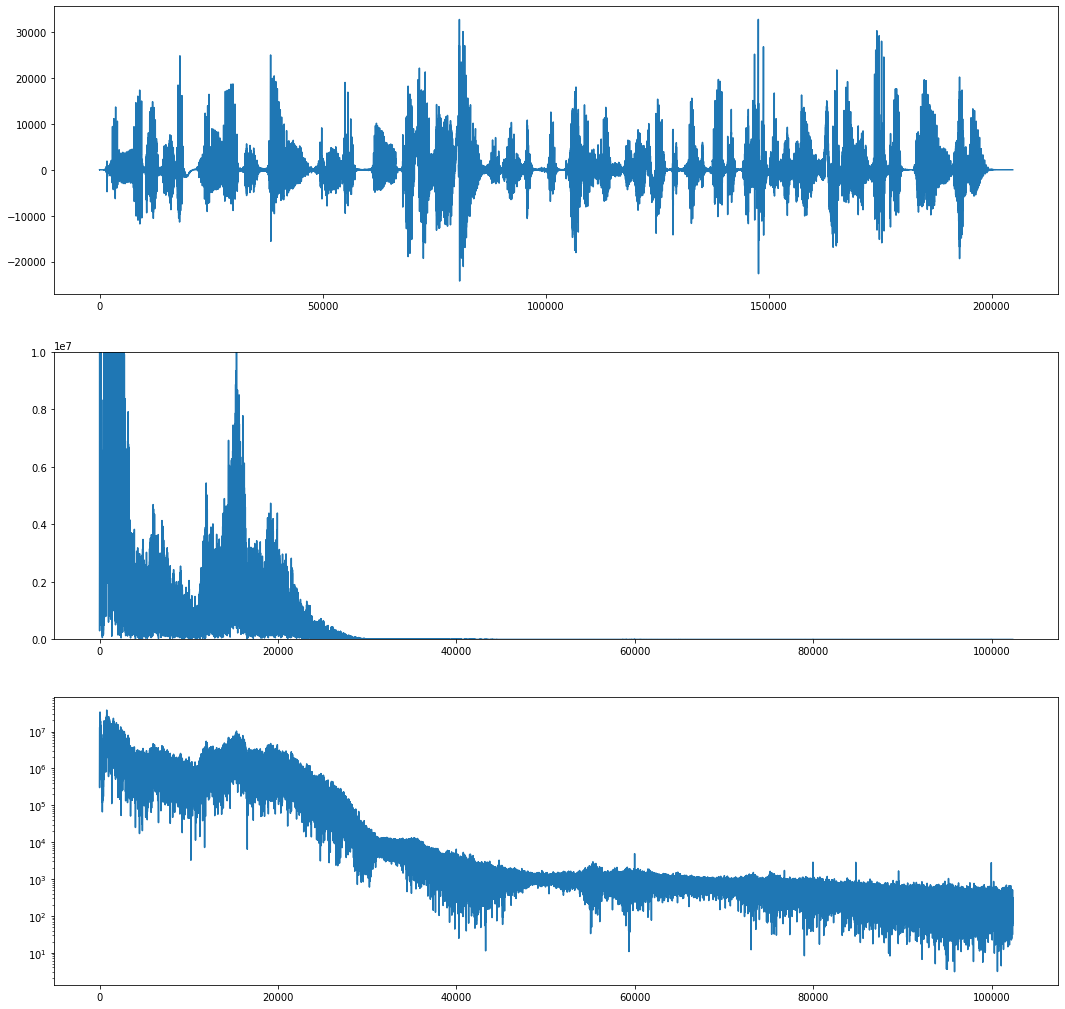


##############################   78   ##############################



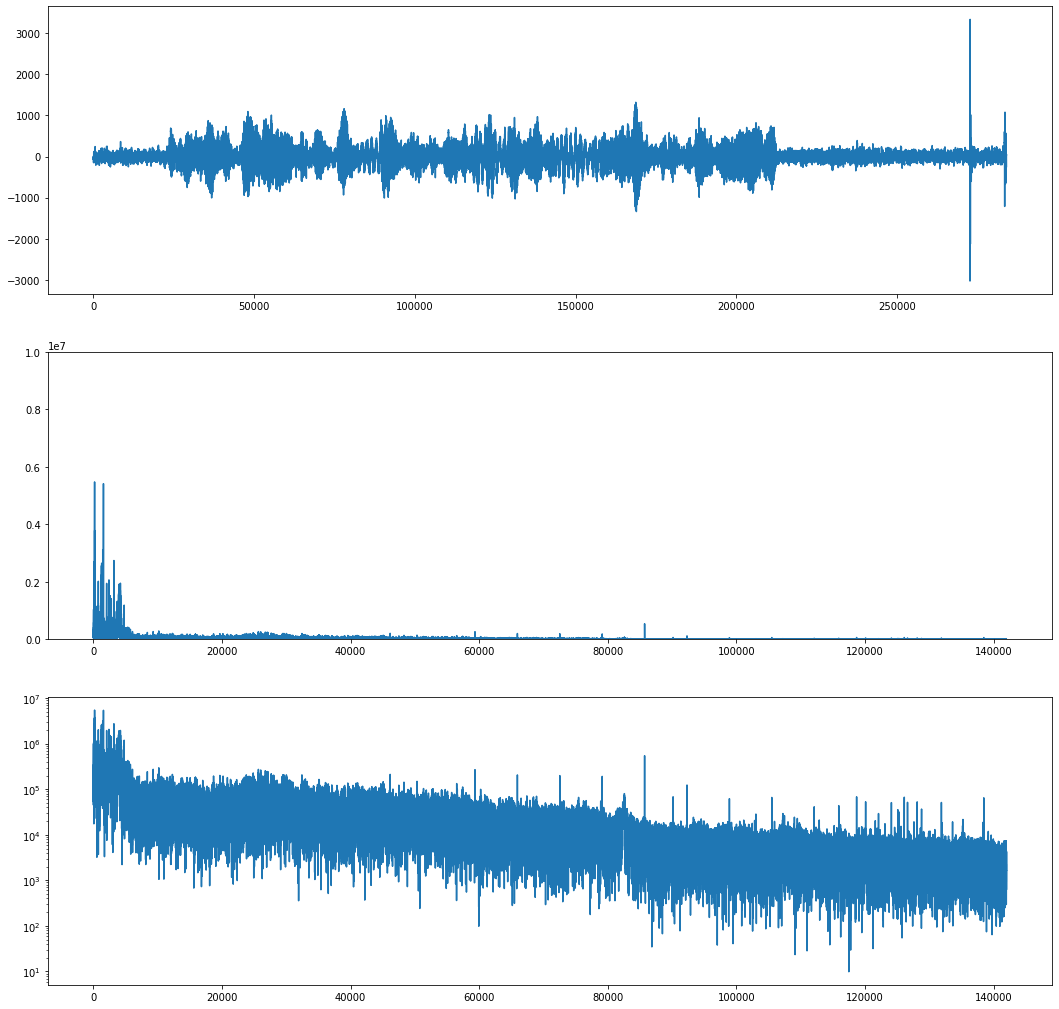


##############################   79   ##############################



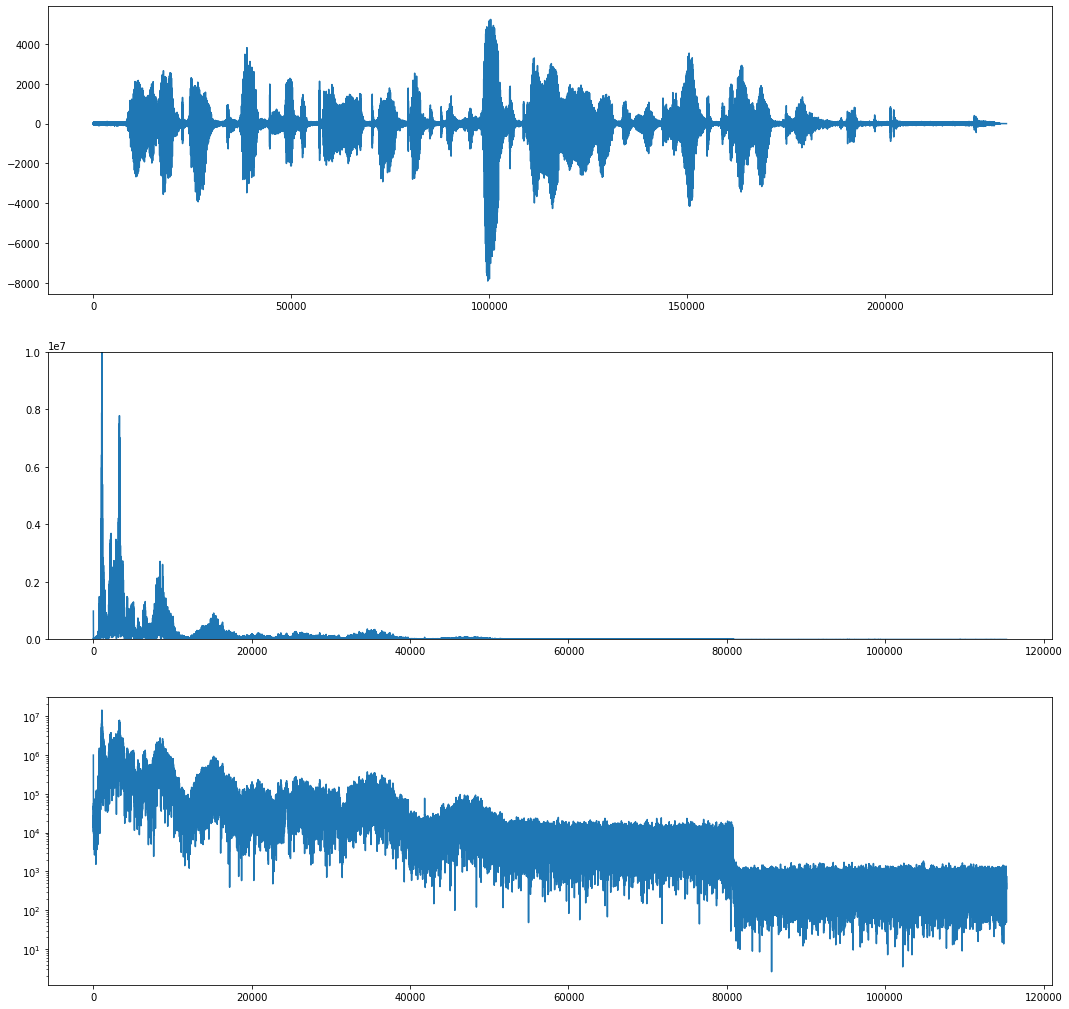


##############################   80   ##############################



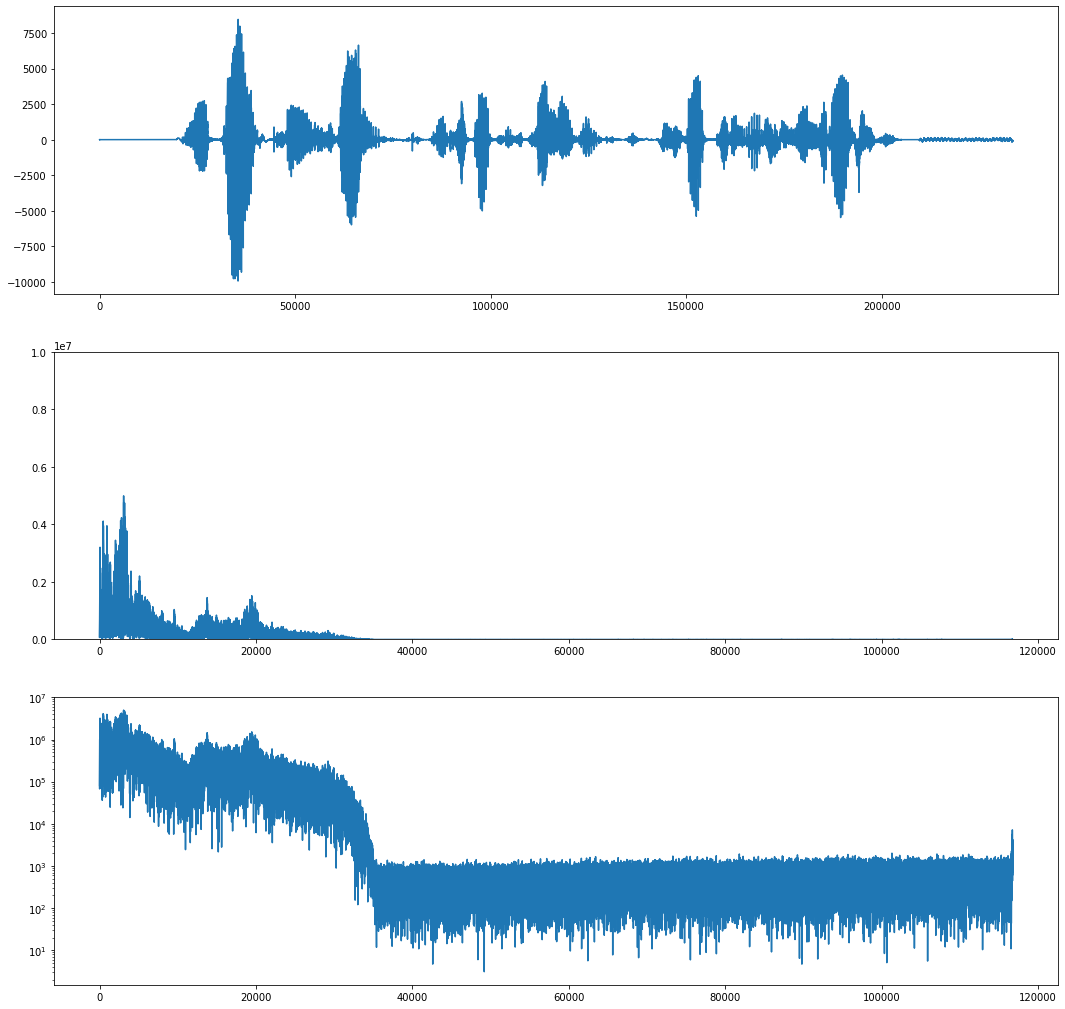


##############################   81   ##############################



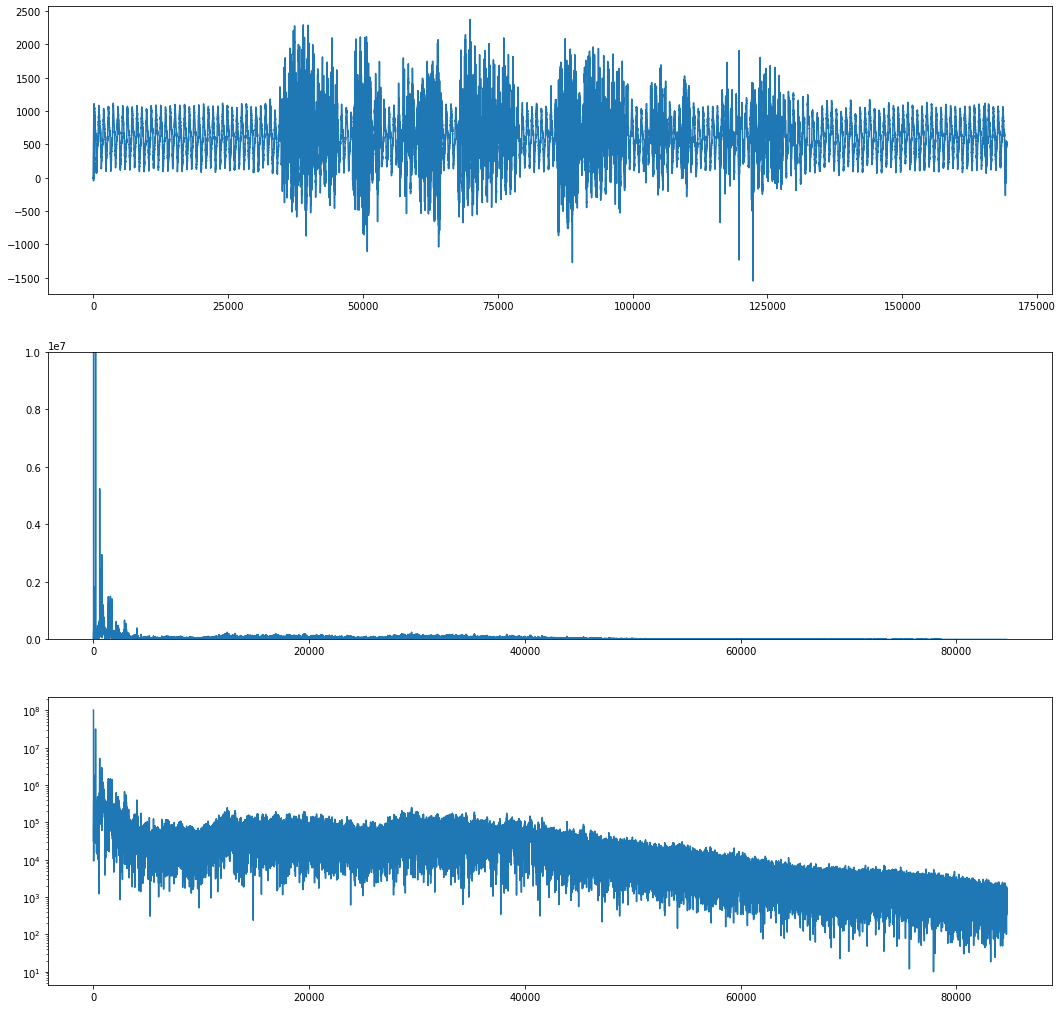


##############################   82   ##############################



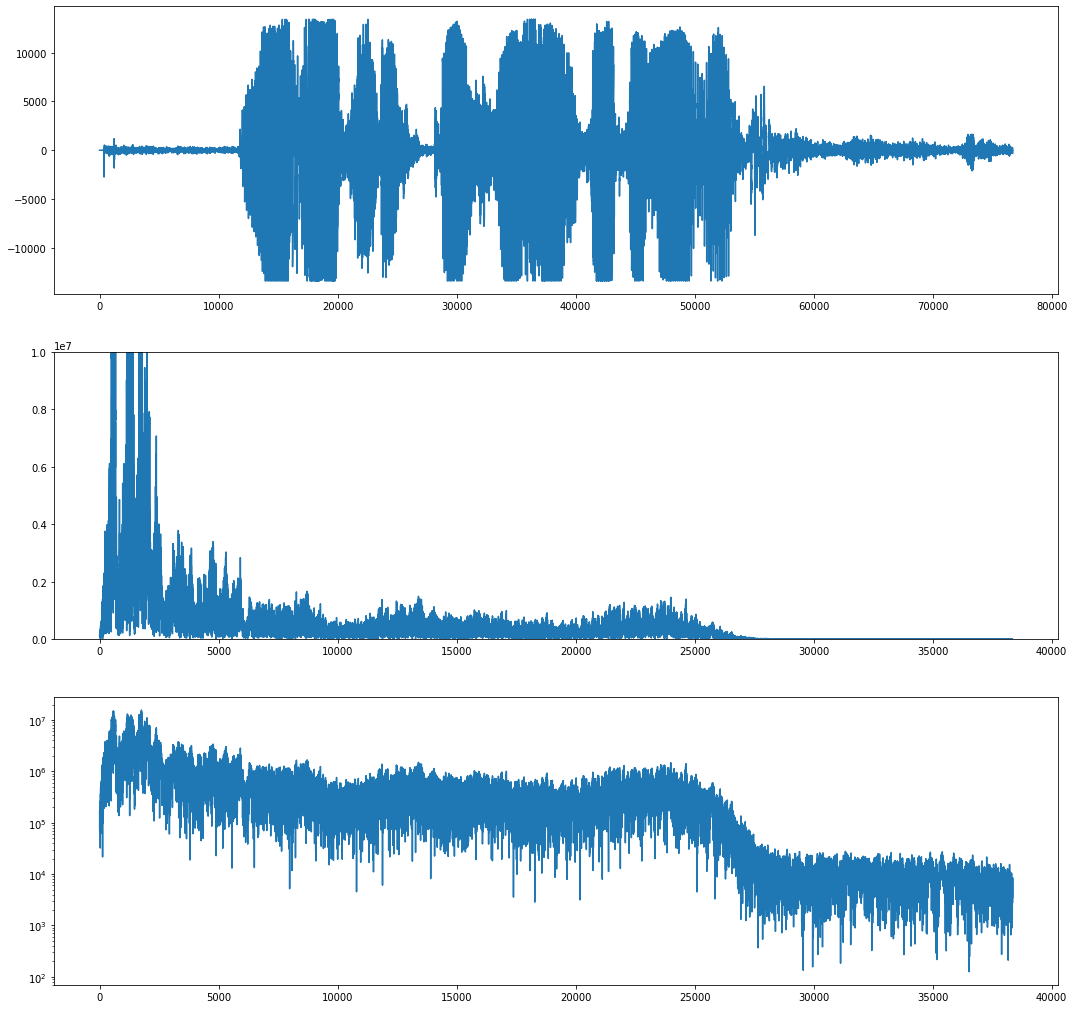


##############################   83   ##############################



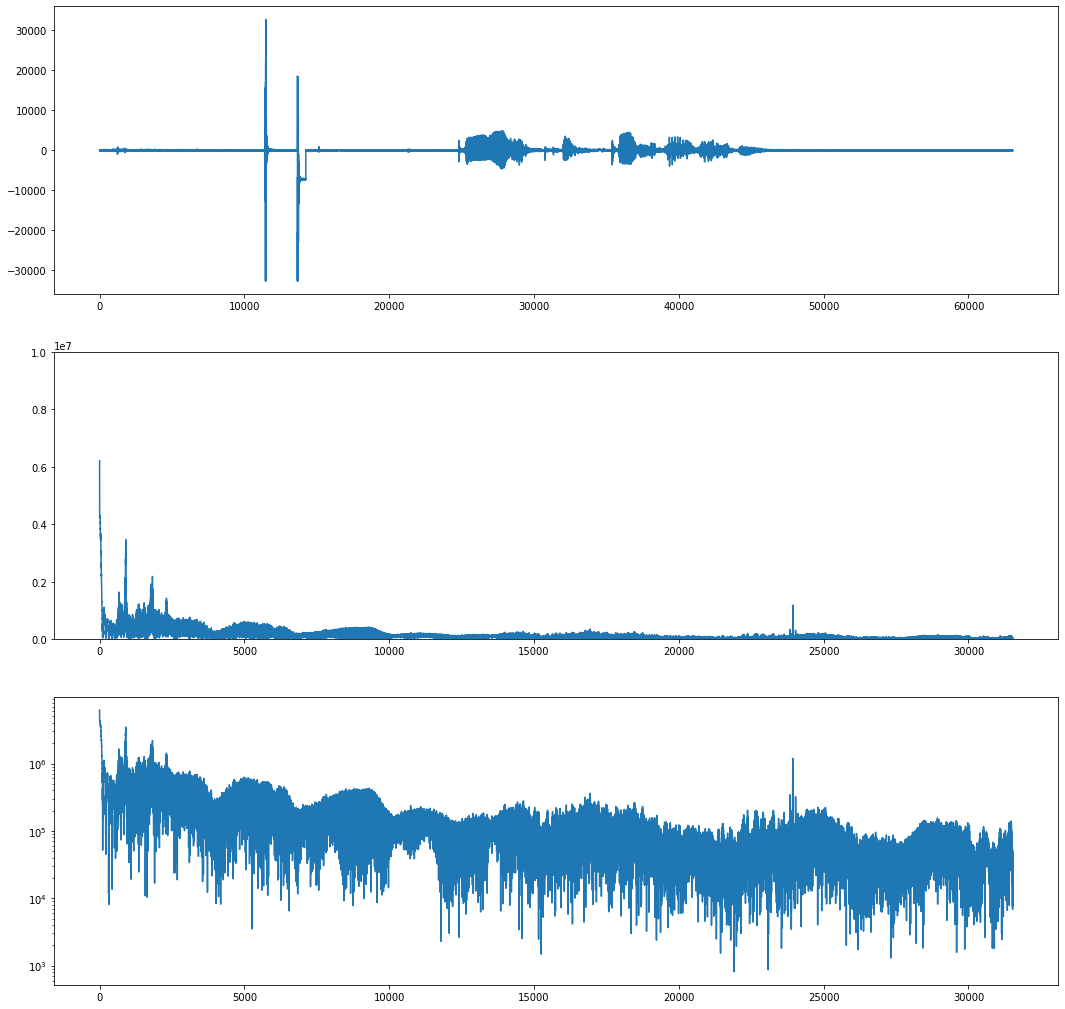


##############################   84   ##############################



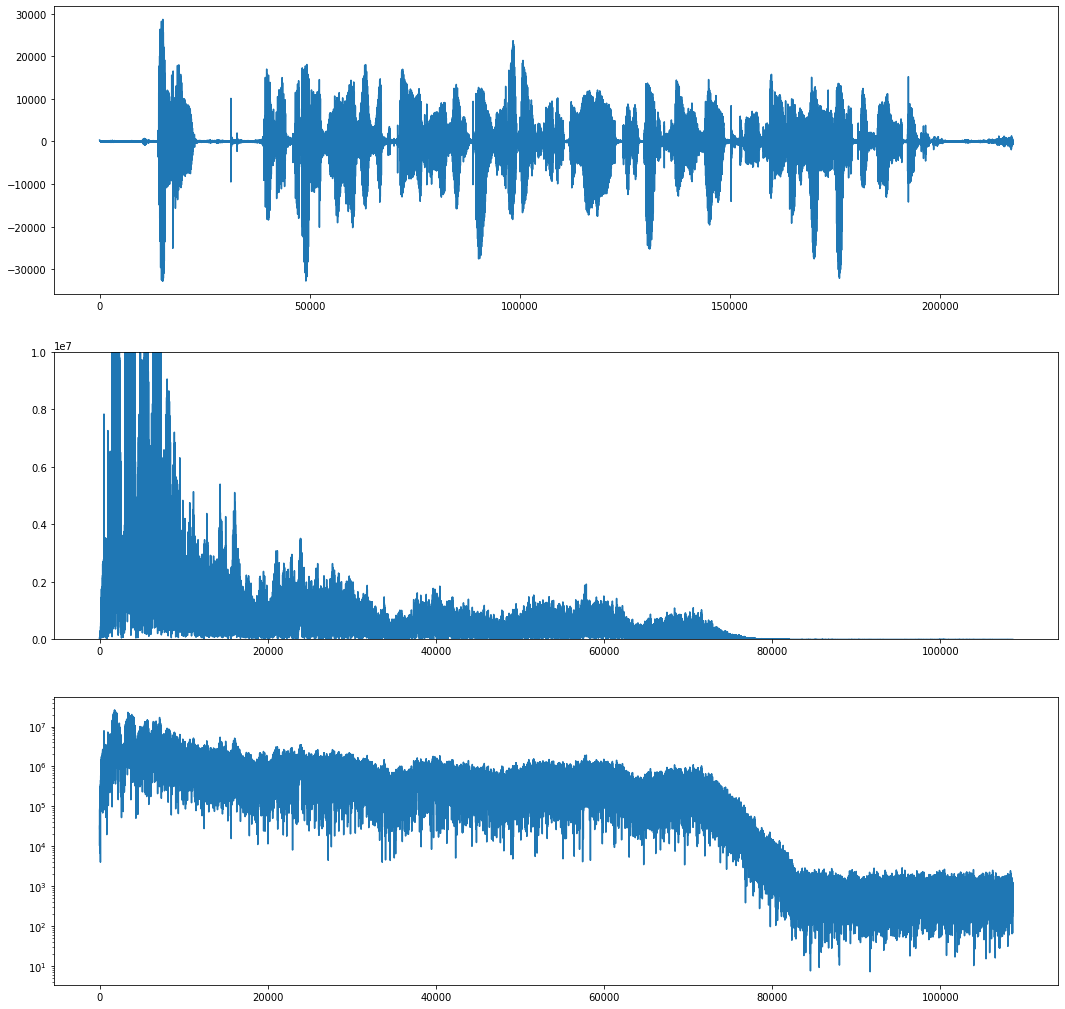


##############################   85   ##############################



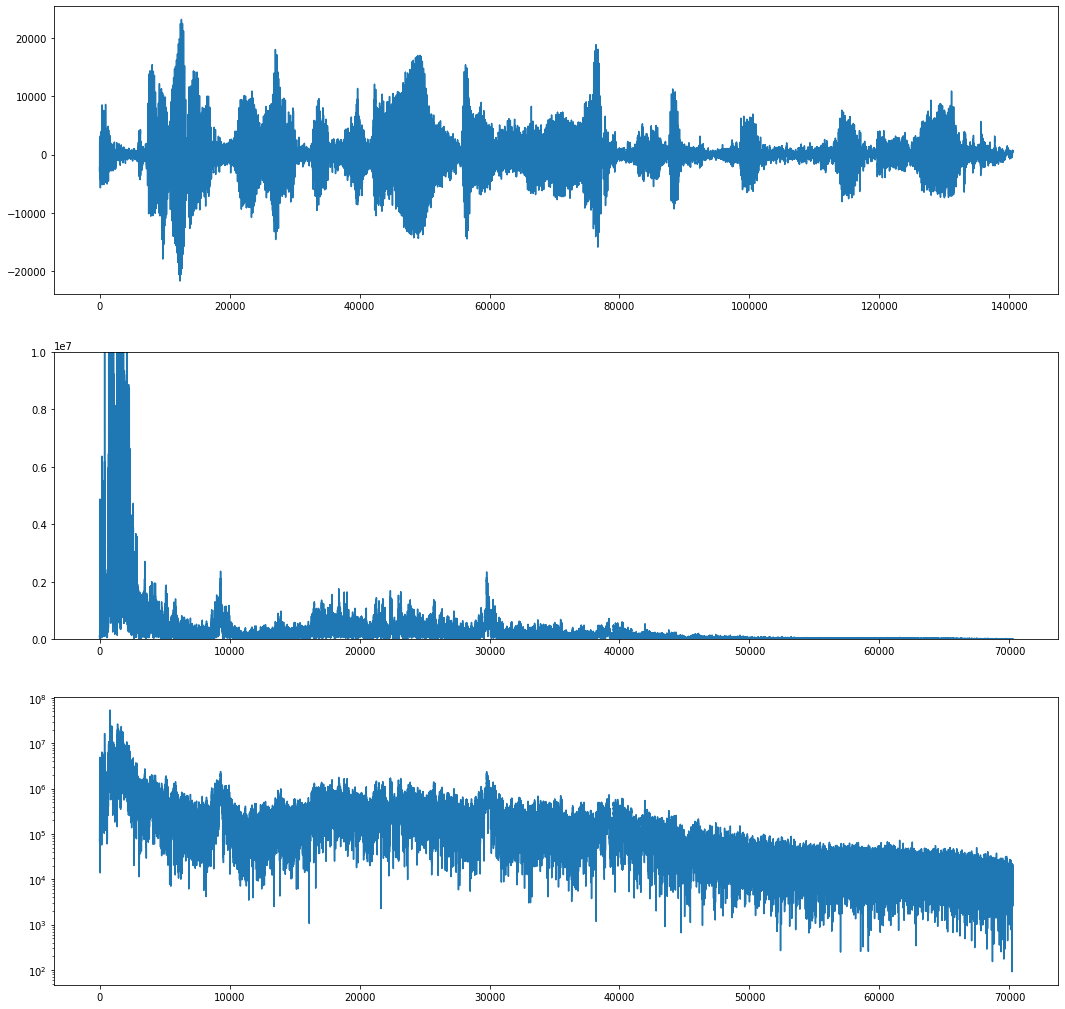


##############################   86   ##############################



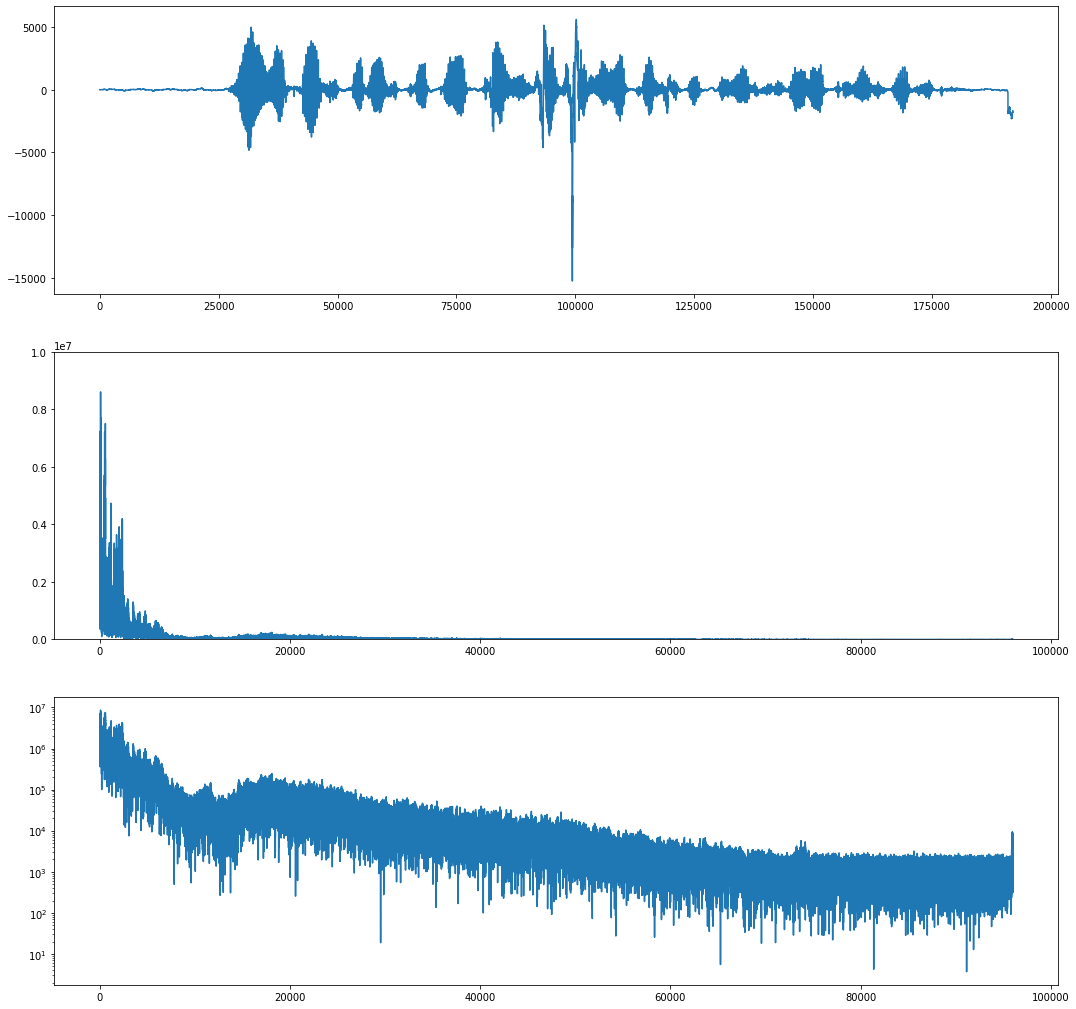


##############################   87   ##############################



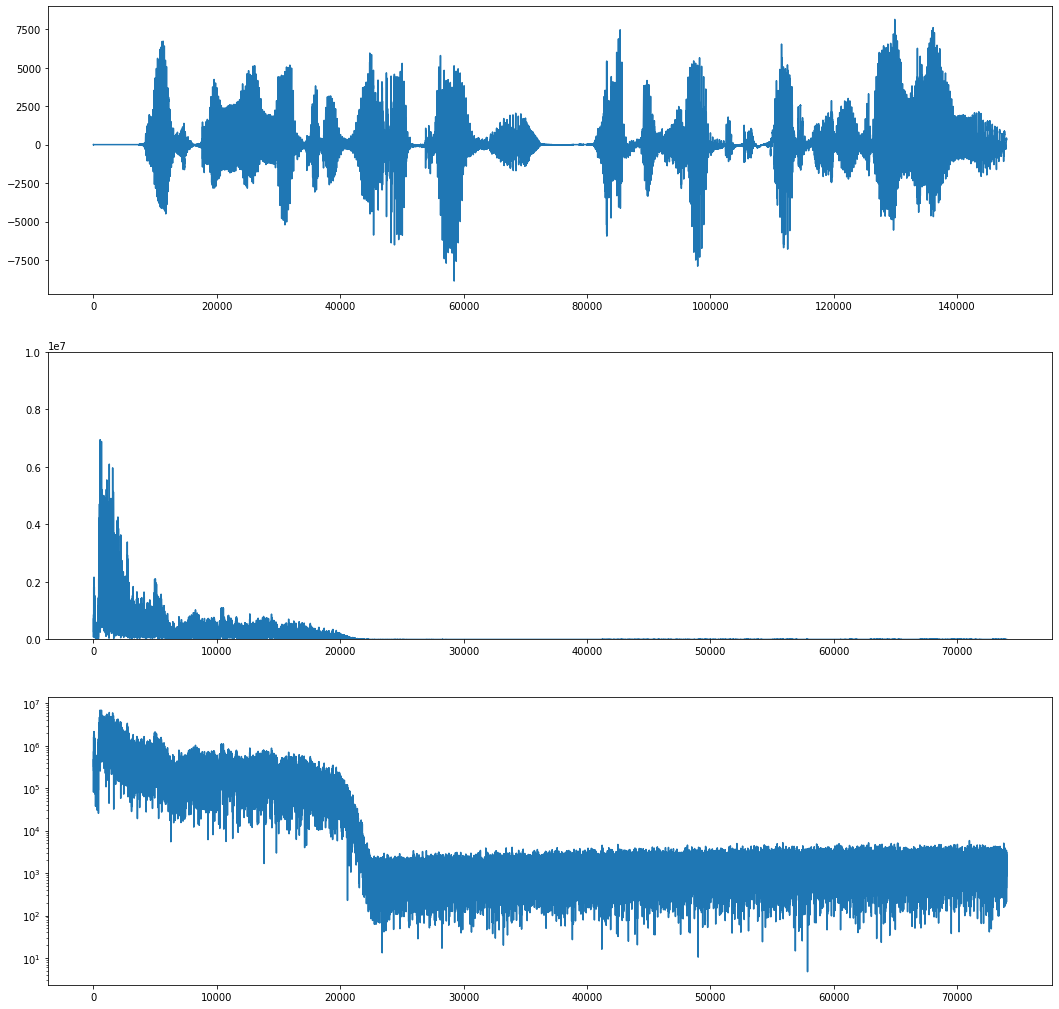


##############################   88   ##############################



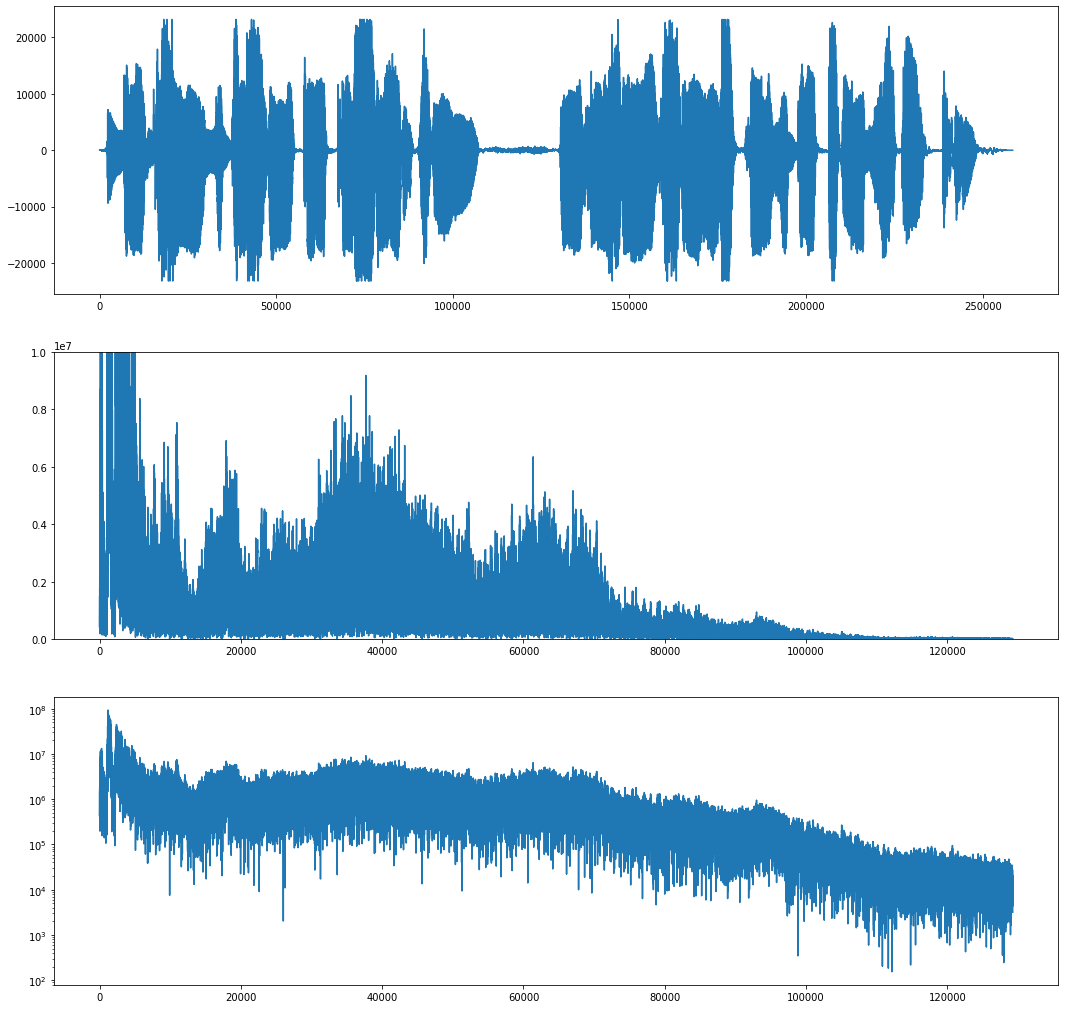


##############################   89   ##############################



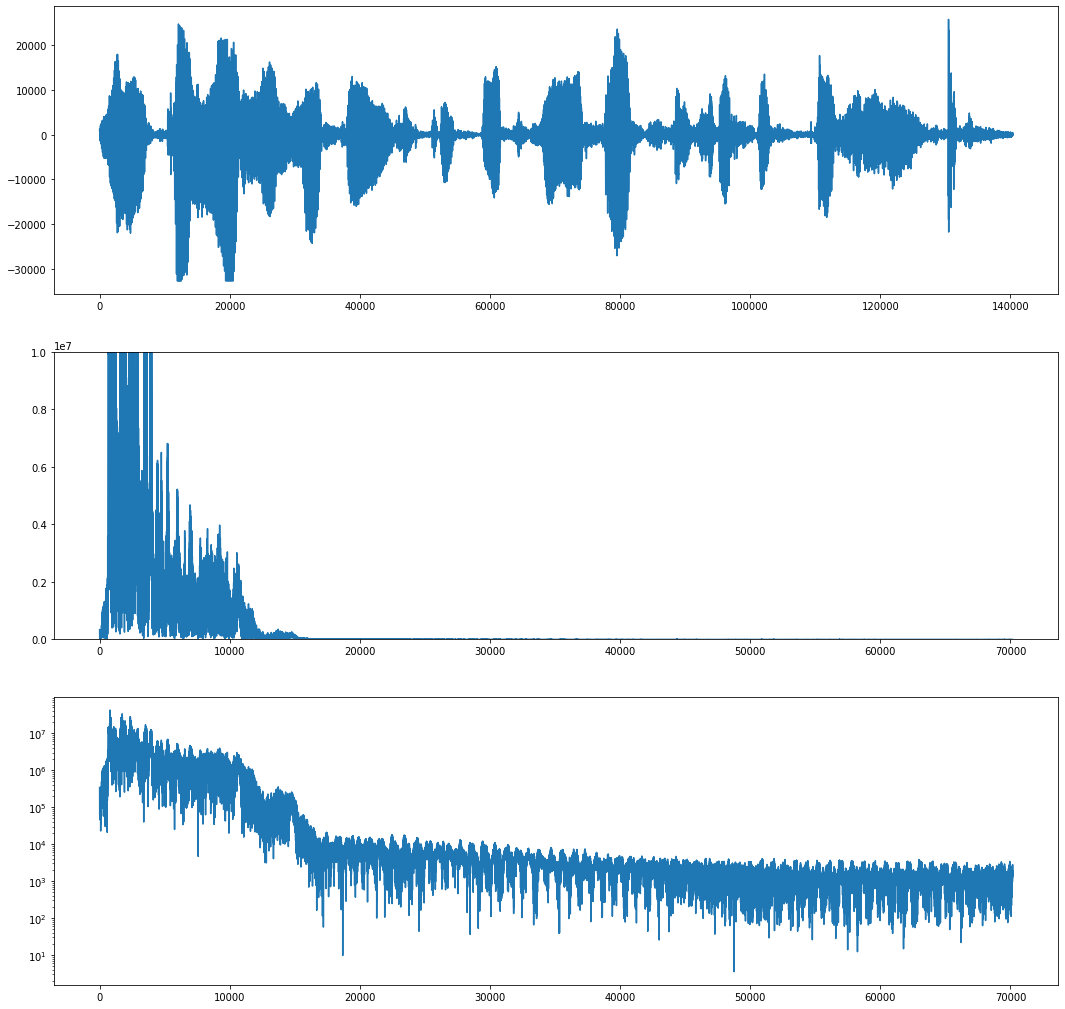


##############################   90   ##############################



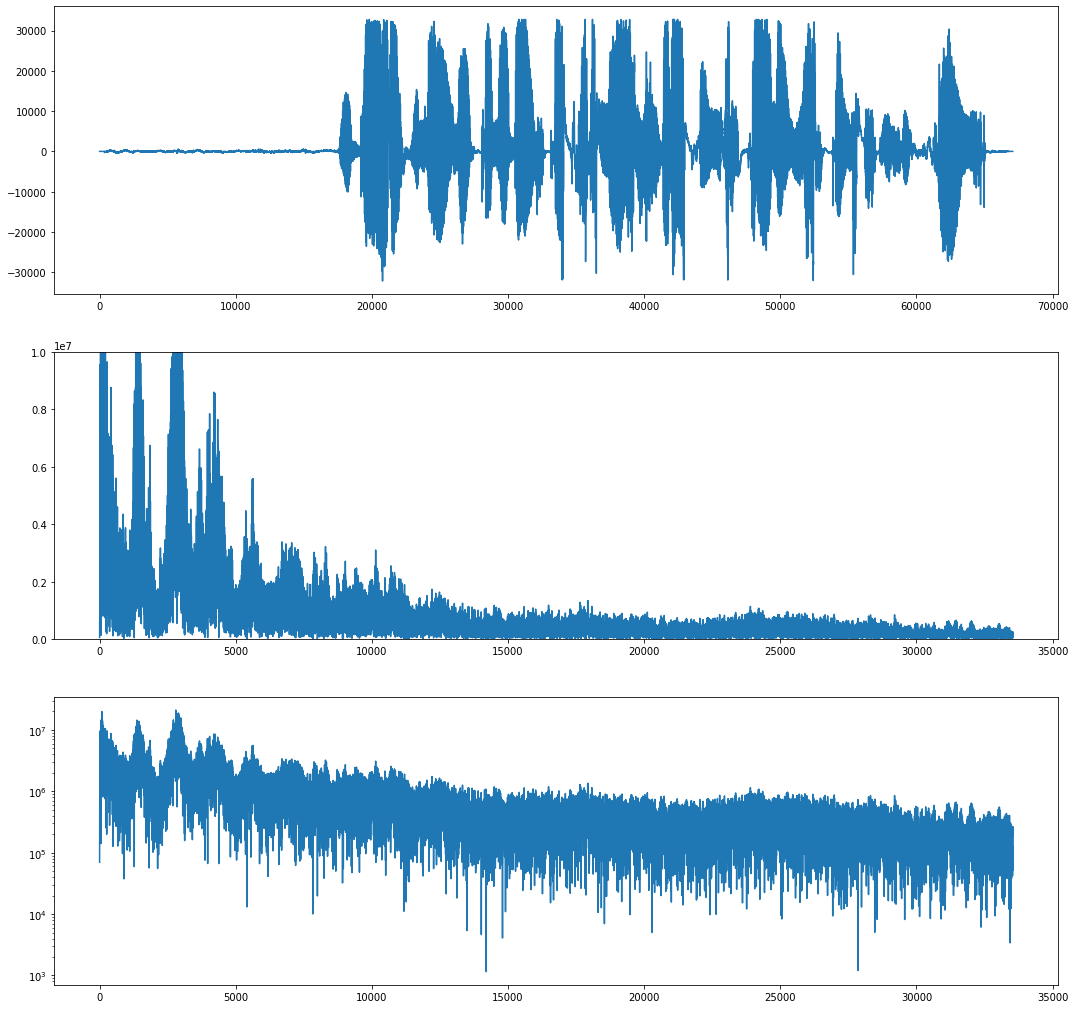

In [103]:
freq=[0]*200
signum=[0]*200
for i in range(j):
    if (dead[i]==1):
        continue
    decorate(i)
    w, signal=f[i], g[i].copy()
    if(len(signal.shape)==2 and signal.shape[1]==2):
        signal = [s[0] for s in signal]
    fig, ax=plt.subplots(3,1,figsize=(18,18))
    ax[0].plot(signal)
    sgn=abs(np.fft.fft(signal))[:len(signal)//2]
    signum[i]=sgn

    ax[1].set_ylim(bottom=0, top=10000000)
    ax[1].plot(sgn)
    ax[2].plot(sgn)
    ax[2].set_yscale('log')
    plt.show()

In [175]:
mode=[0]*200
meanf=[0]*200
p3=[0]*200
iqr=[0]*200

for i in range(j):
    if (dead[i]==1):
        continue
    conn=(f[i]/(len(signum[i])*2))
    d1=int(60//conn)
    d2=int(290//conn+1)
    
    dp=signum[i][d1:d2]*conn
    kv=sum(dp)
    asum=0
    
    p3[i]=[0]*3
    for jj in range(len(dp)):
        asum+=dp[jj]
        for ij in range(1,4):
            if (asum>kv*ij*0.25 and p3[i][ij-1]==0):
                p3[i][ij-1]=jj*conn
    
    dt=[i*x*conn for i,x in enumerate(dp)]
    dt=sum(dt)/sum(dp)
    
    
    mode[i]=(np.argmax(dp)+d1)*conn
    meanf[i]=dt
    iqr[i]=p3[i][2]-p3[i][0]
    print(gnd[i], mode[i], meanf[i], p3[i], iqr[i])

K 264.24896816037733 109.18095317517718 [36.07827240566038, 100.10908018867924, 179.41627358490567] 143.33800117924528
K 199.1819336114638 153.06970174300685 [129.98820968619626, 155.9858516234355, 186.78305822601124] 56.79484853981498
M 162.67164179104478 133.48429184706453 [90.50373134328359, 111.66044776119404, 192.99626865671644] 102.49253731343285
M 121.9504176980198 125.02168783895017 [62.68080909653465, 130.47841893564356, 182.28602645420793] 119.60521735767327
M 114.09981218137912 125.37876059893945 [55.35953850281728, 132.69385564797423, 183.40488328414273] 128.04534478132544
K 270.33262531860663 165.71747510003394 [140.50552251486832, 172.91546304163128, 204.76338147833476] 64.25785896346645
K 228.98579040852576 168.73593623215618 [155.87744227353463, 172.06571936056838, 190.08170515097692] 34.20426287744229
M 119.57605985037407 125.1850997391878 [63.715710723192025, 134.28927680798006, 182.04488778054863] 118.32917705735662
M 123.49097697573117 88.88994113434627 [54.37668533

K 225.3589426288168 128.94869319002765 [68.54462368797711, 153.5268070133588, 180.8131560114504] 112.26853232347328


In [176]:
#fr=freq[:j]
#gnd=gender[:j]
#print(list(zip(fr, gnd)))

summa=0
for i in range(j):
    if (meanf[i]>=140):
        if (gnd[i]=='K'):
            summa+=1
    elif (iqr[i]<=70):
        if (gnd[i]=='K'):
            summa+=1
    elif (gnd[i]=='M'):
        summa+=1
    print(i, summa)
print("{}/{}".format(summa, j))


0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 7
9 8
10 9
11 10
12 10
13 10
14 10
15 11
16 12
17 13
18 14
19 15
20 16
21 17
22 18
23 18
24 18
25 19
26 20
27 21
28 22
29 22
30 23
31 24
32 25
33 26
34 27
35 28
36 29
37 30
38 31
39 31
40 32
41 33
42 33
43 34
44 35
45 36
46 36
47 37
48 37
49 38
50 39
51 40
52 41
53 42
54 43
55 43
56 43
57 44
58 44
59 45
60 46
61 47
62 48
63 49
64 50
65 51
66 52
67 53
68 53
69 54
70 55
71 56
72 57
73 58
74 58
75 58
76 59
77 60
78 61
79 62
80 63
81 64
82 64
83 64
84 65
85 66
86 67
87 67
88 68
89 69
90 69
69/91
